# Capacity and Generation Bar Chart
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from postreise.process import transferdata as td
from postreise.plot.analyze_pg import AnalyzePG as apg
from westernintnet.westernintnet import win_data

c:\program files\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


In [2]:
od = td.OutputData()

Use  C:\Users\brdo\scenario_data\  to save/load local scenario data.


In [3]:
def get_plant_id(zone, resource):
    plant_id = []
    if zone == 'Western':
        try:
            plant_id = win_data.genbus.groupby('type').get_group(resource).index.values.tolist()
        except KeyError:
            pass
    elif zone == 'California':
        CA = ['Bay Area', 'Central California', 'Northern California',
              'Southeast California', 'Southwest California']
        for load_zone in CA:
            try:
                plant_id += win_data.genbus.groupby(['ZoneName', 'type']).get_group(
                    (load_zone, resource)).index.values.tolist()
            except KeyError:
                pass
    else:
        try:
            plant_id = win_data.genbus.groupby(['ZoneName', 'type']).get_group(
                (zone, resource)).index.values.tolist()
        except KeyError:
            pass
    
    return plant_id

In [4]:
demand = {'western_scenario_Update01': 'v3',
          'california2020Test01': 'cal2020',
          'california2020_fixCalCong': 'cal2020',
          'california2030Test01': 'cal2030',
          'california2030_fixCalCong': 'cal2030',
          'california2020_westTarget': 'cal2020',
          'california2030_westTarget': 'cal2030'}

factor = {'western_scenario_Update01': {'zone': 'Western', 'solar': 1, 'wind': 1},
          'california2020Test01': {'zone': 'California', 'solar': 1.52, 'wind': 1.48},
          'california2020_fixCalCong': {'zone': 'California', 'solar': 1.52, 'wind': 1.48},
          'california2030Test01': {'zone': 'Western', 'solar': 2.3, 'wind': 2.3},
          'california2030_fixCalCong': {'zone': 'Western', 'solar': 2.3, 'wind': 2.3},
          'california2020_westTarget': {'zone': 'Western', 'solar': 2.25, 'wind': 2.25},
          'california2030_westTarget': {'zone': 'Western', 'solar': 5, 'wind': 5}}

def prepare_data(scenario):
    # renewable profiles
    win_data.read_solar_data('sam')
    win_data.read_wind_data()
    
    # demand
    win_data.read_demand_data(demand[scenario])

    # generation
    pg = od.get_data(scenario, 'PG')
        
    # multipliers
    multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
    for resource in ['solar', 'wind']:
        plant_id = get_plant_id(factor[scenario]['zone'], resource)
        multiplier.loc[plant_id] = factor[scenario][resource]

    return (pg, win_data, multiplier)

In [5]:
def do_chart_analysis(data, time, zones):
    chart = apg(data, time, zones,
                ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
                'chart', normalize=False)
    chart.get_plot(save=False)
    data_chart = chart.get_data()
    print('----------------------------------------')
    for z in zones:
        print("Total Generation in %s: %d MWh" % (z, round(data_chart[z]['Generation'].sum().sum())))
        print("Total Capacity in %s: %d MW" % (z, round(data_chart[z]['Capacity'].sum())))
        print('----------------------------------------')

## Scenario

In [6]:
scenario = "california2020_westTarget"

## Annual

Load solar data
Load wind data
Load demand data
Set UTC for all zones


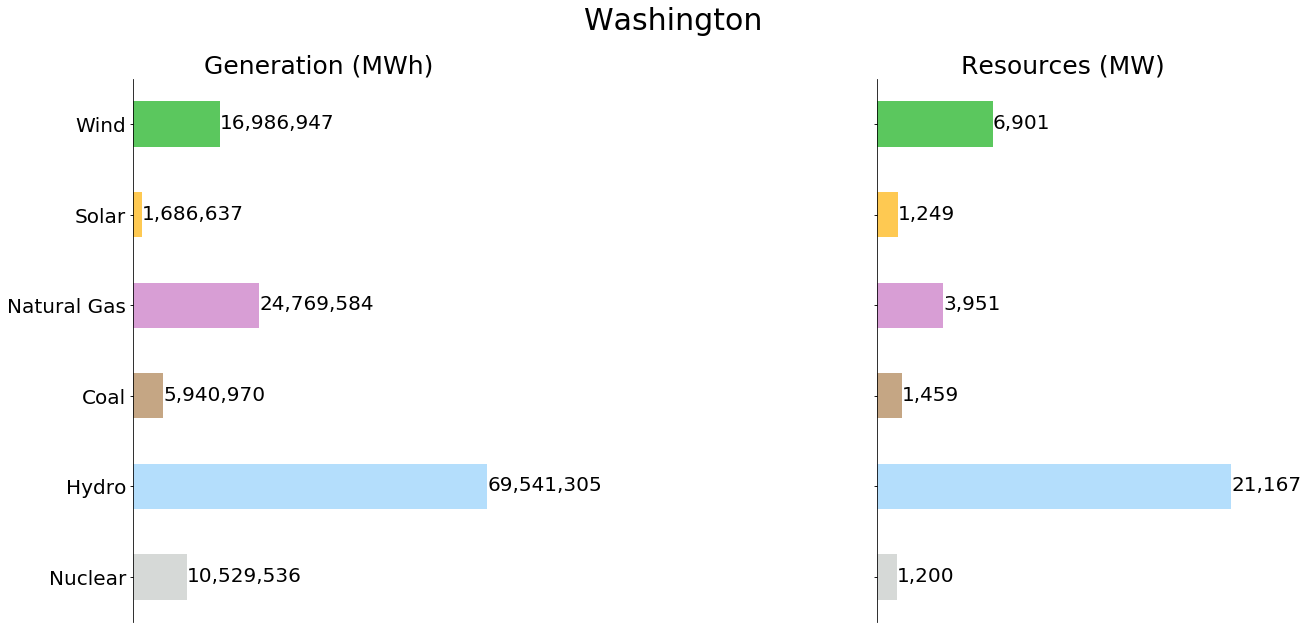

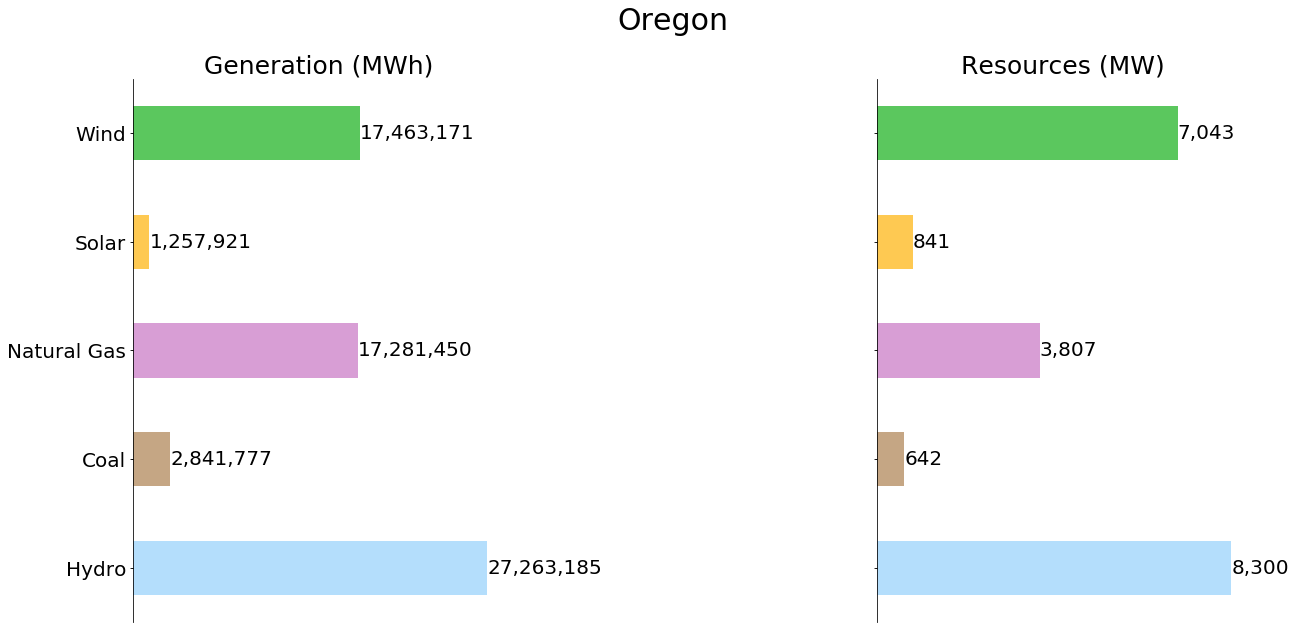

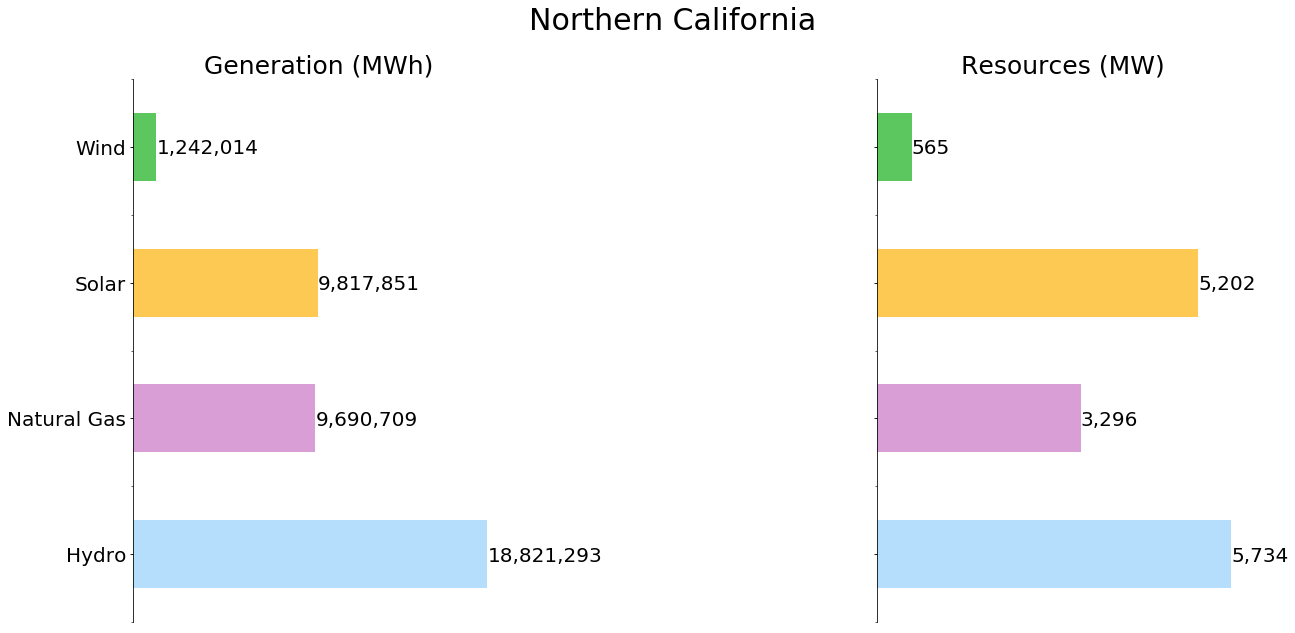

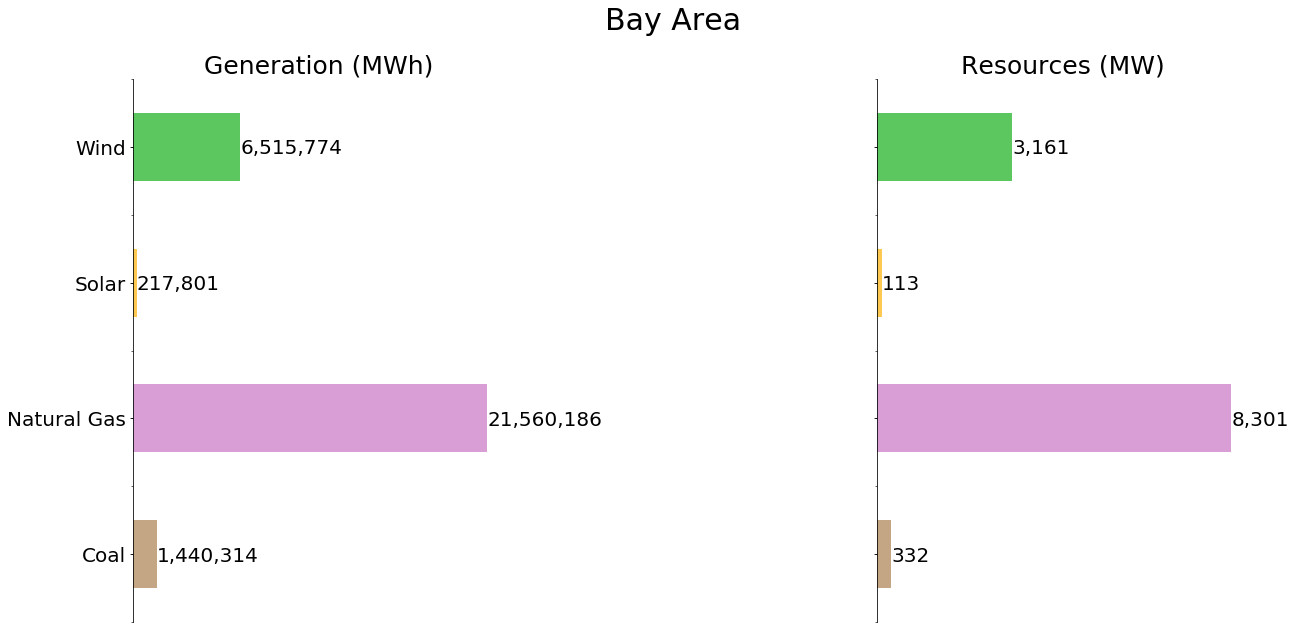

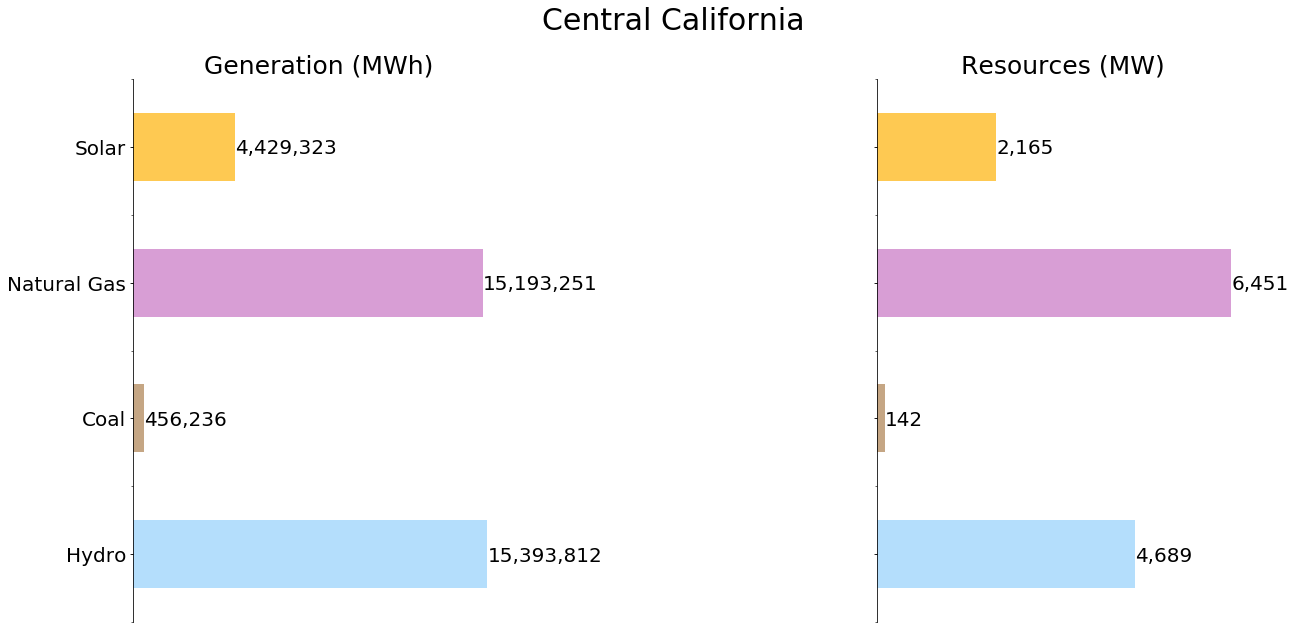

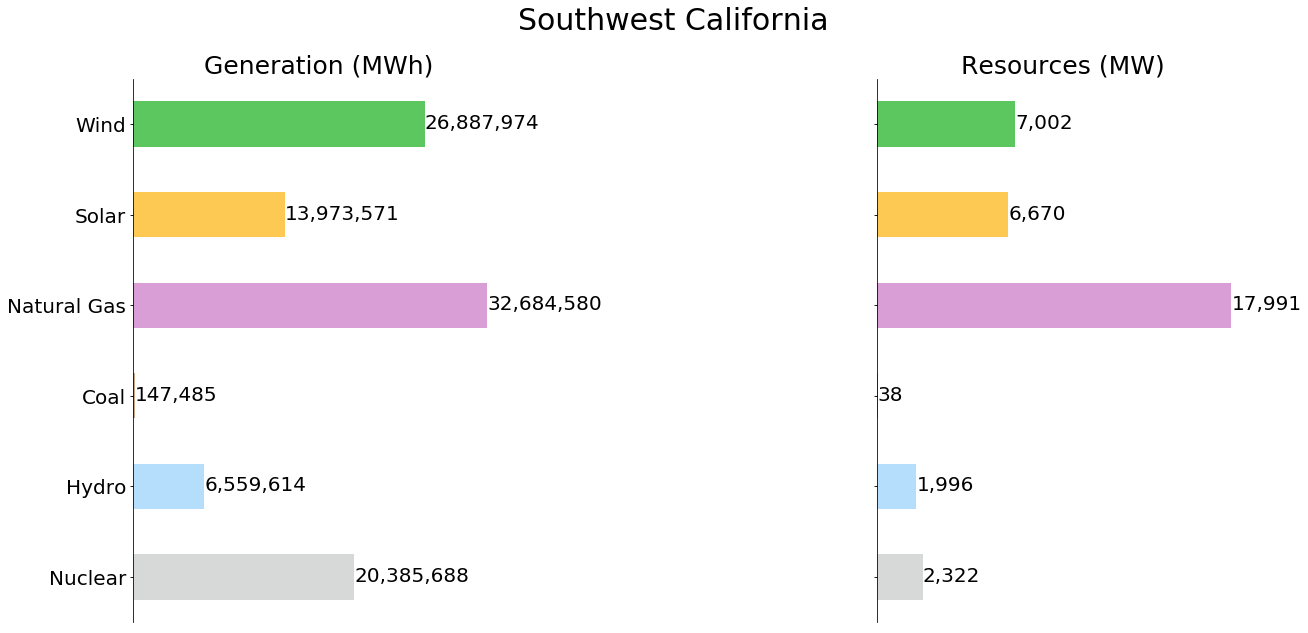

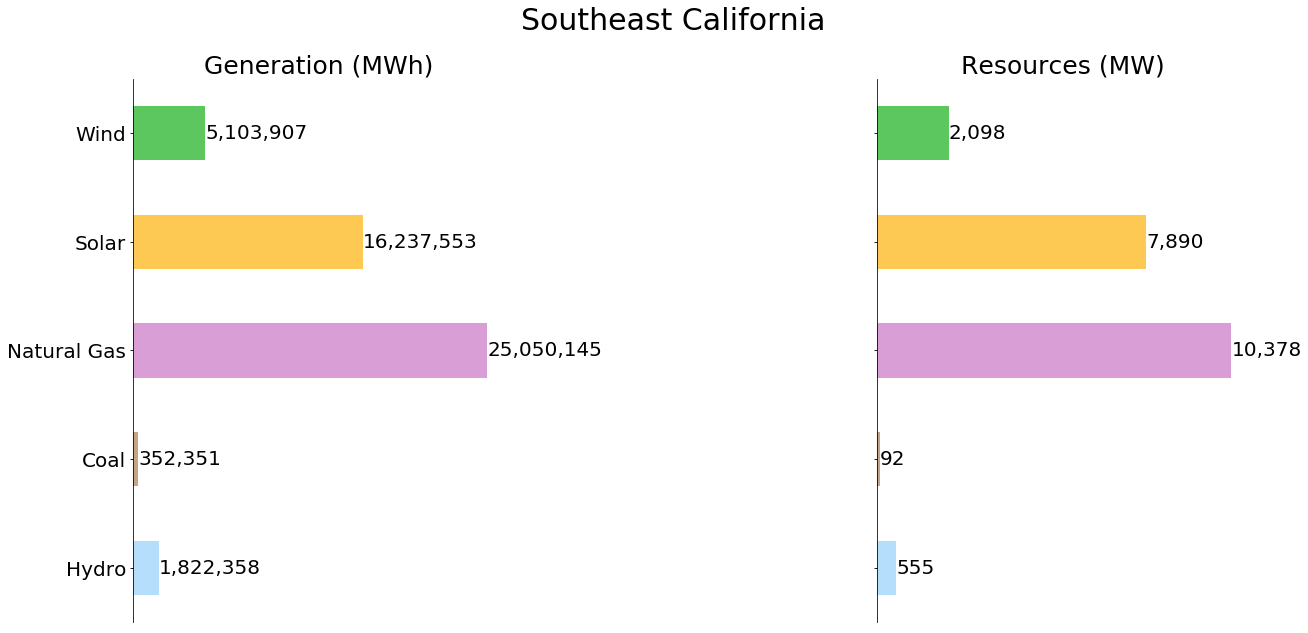

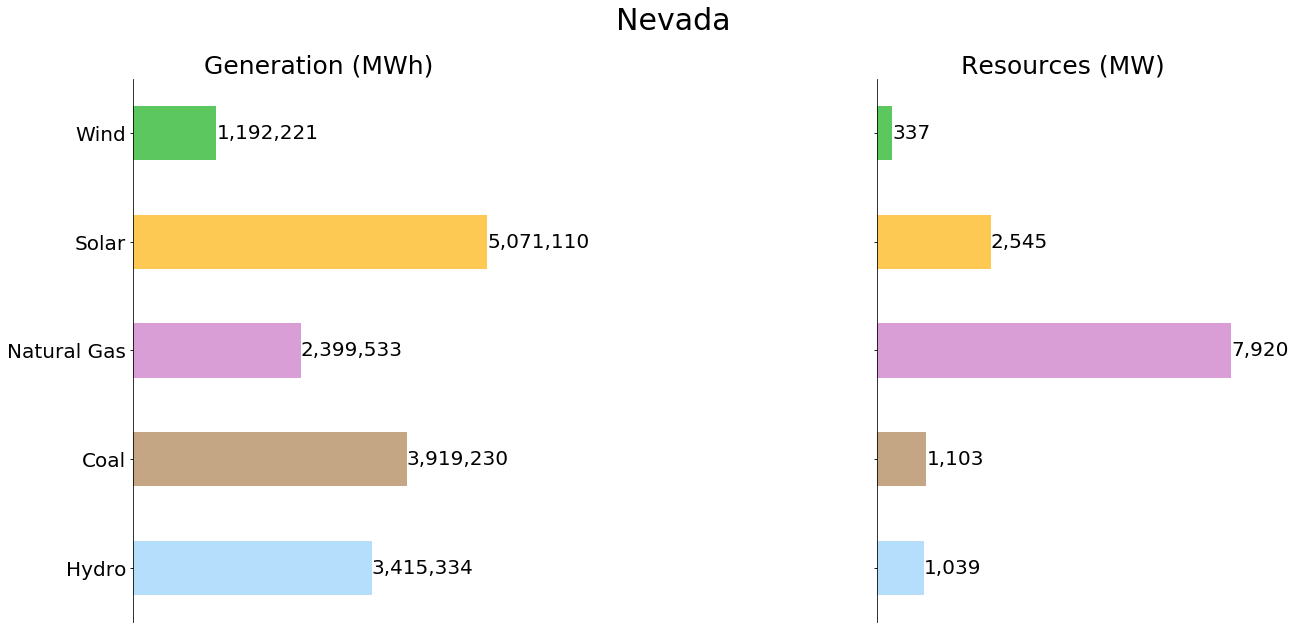

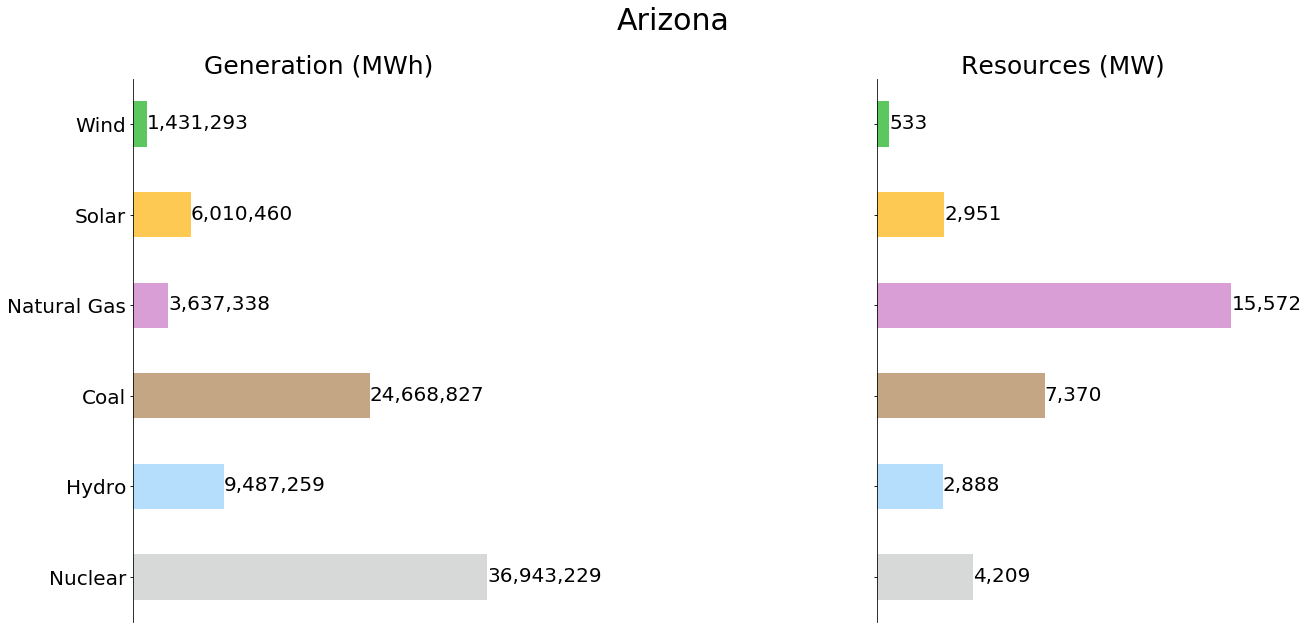

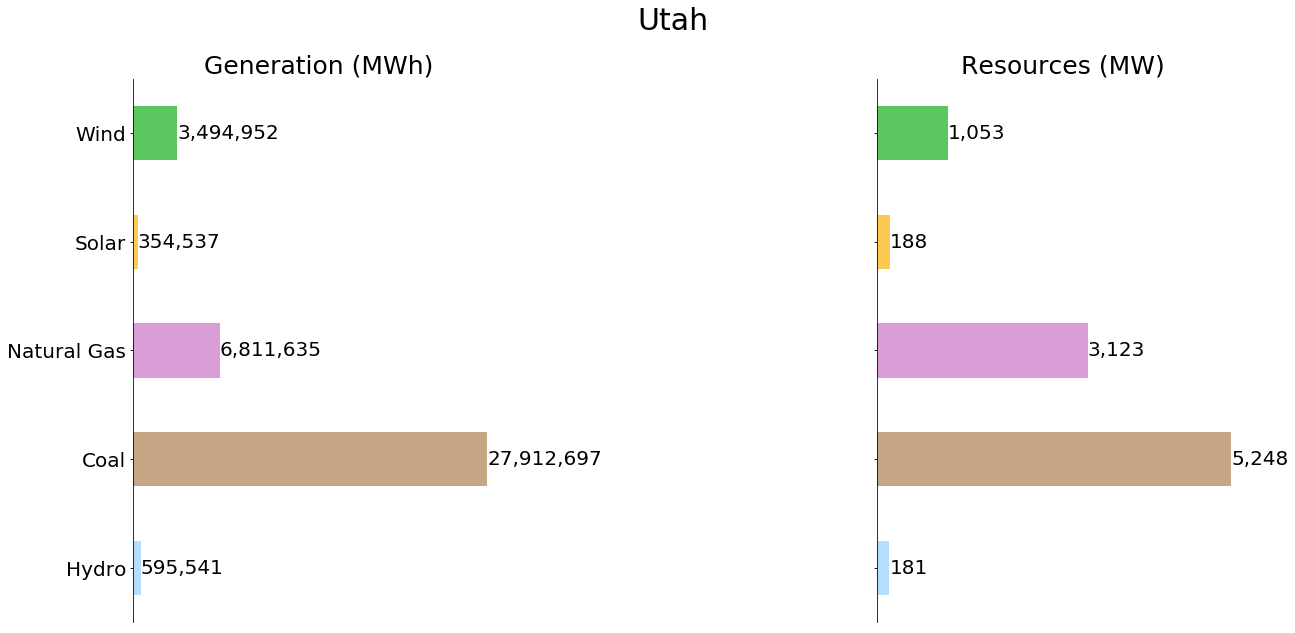

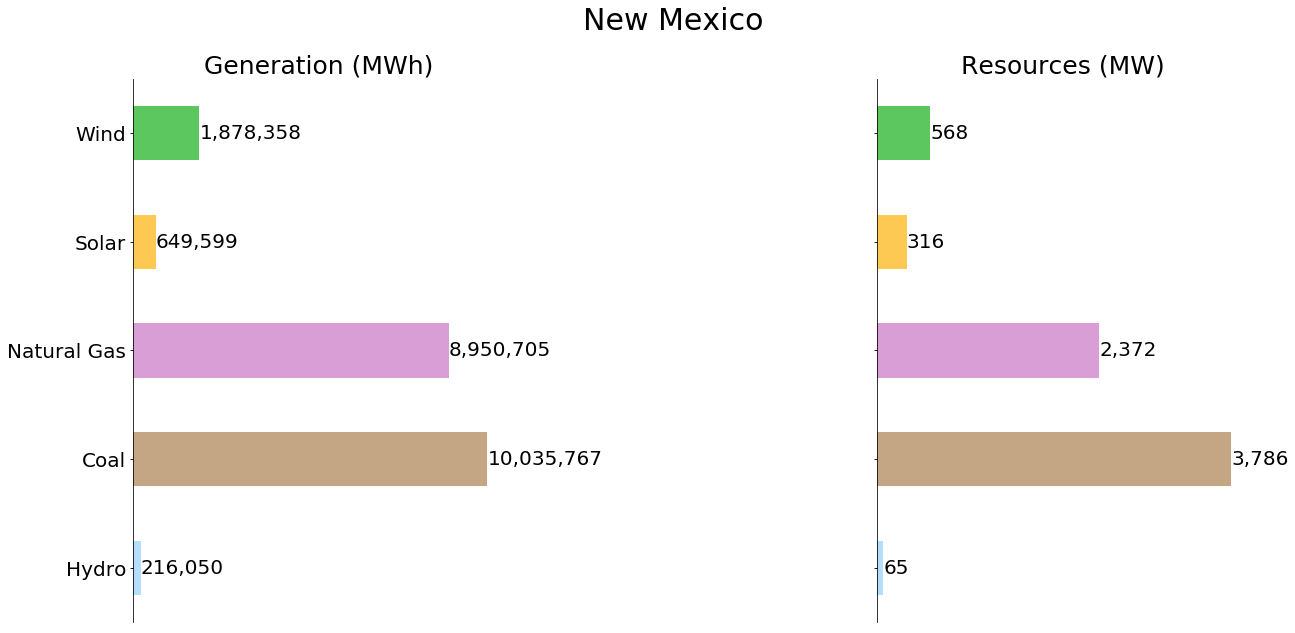

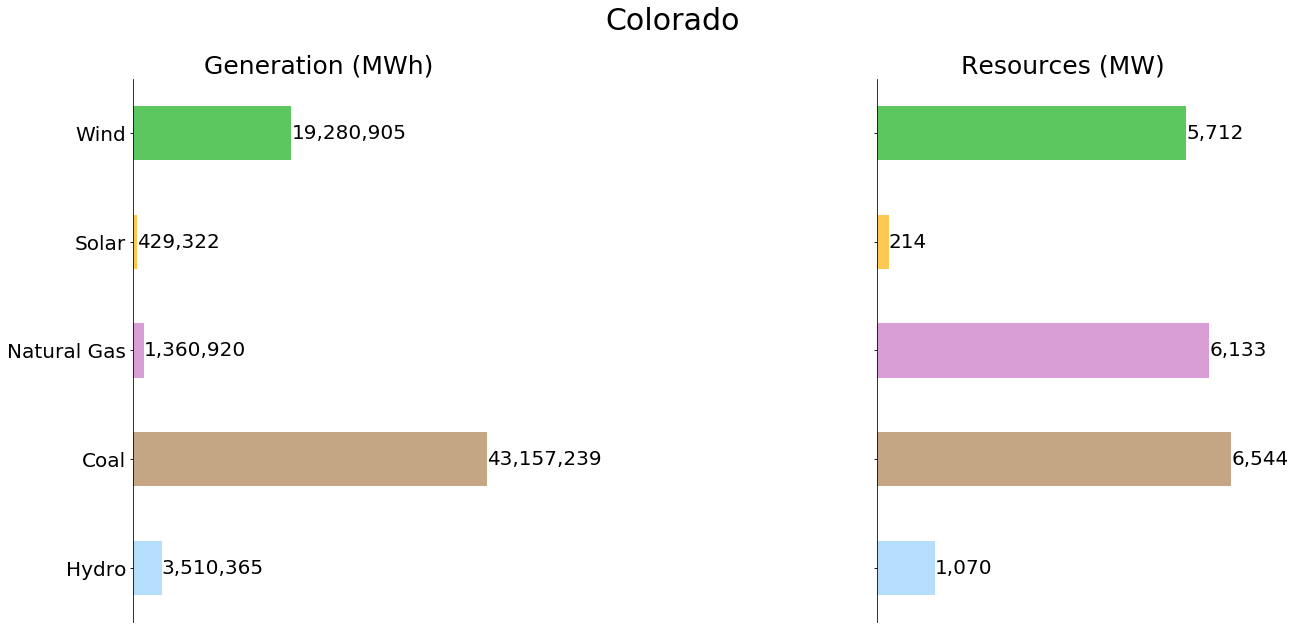

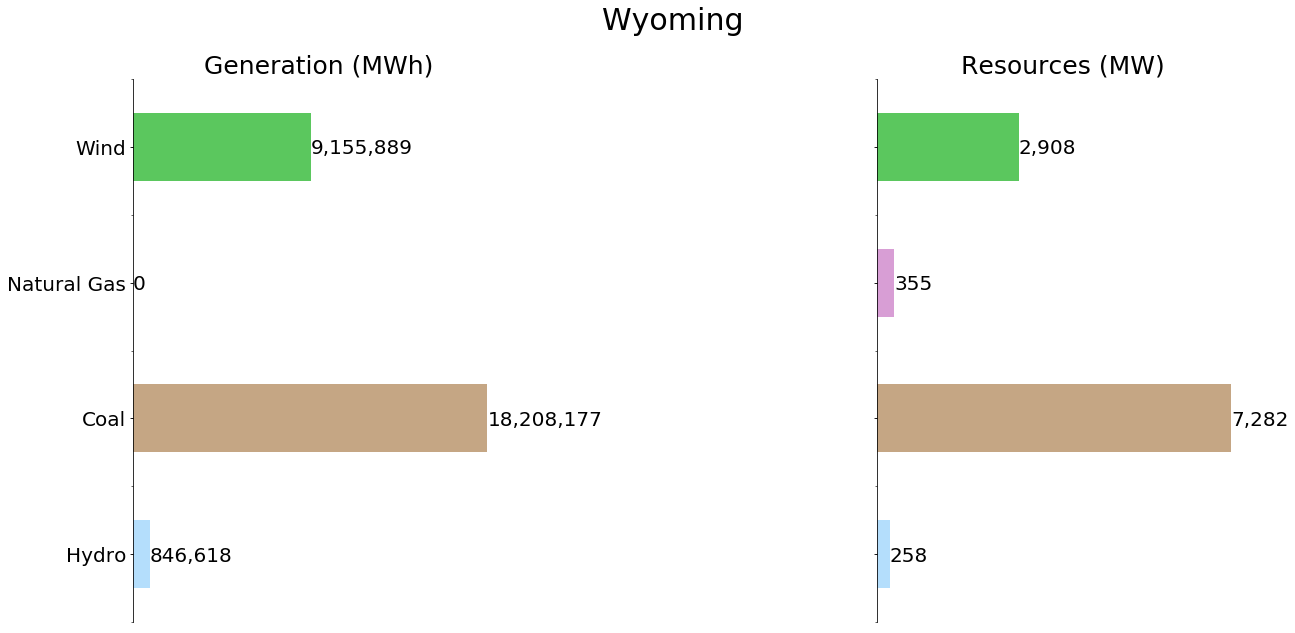

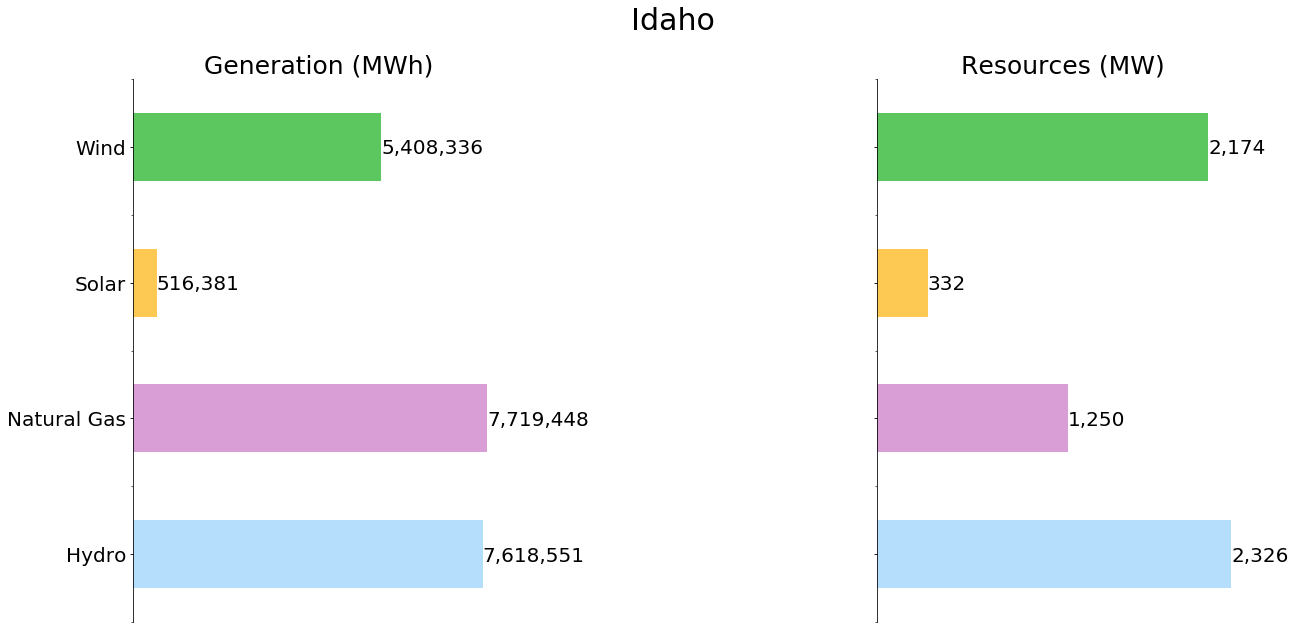

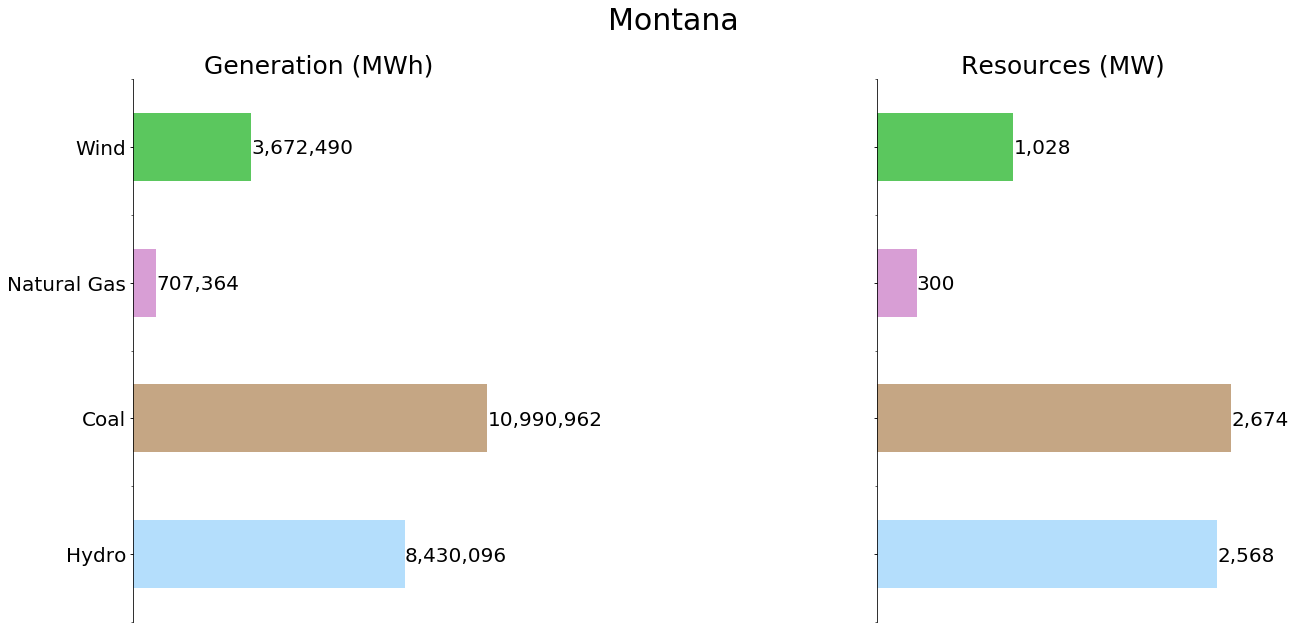

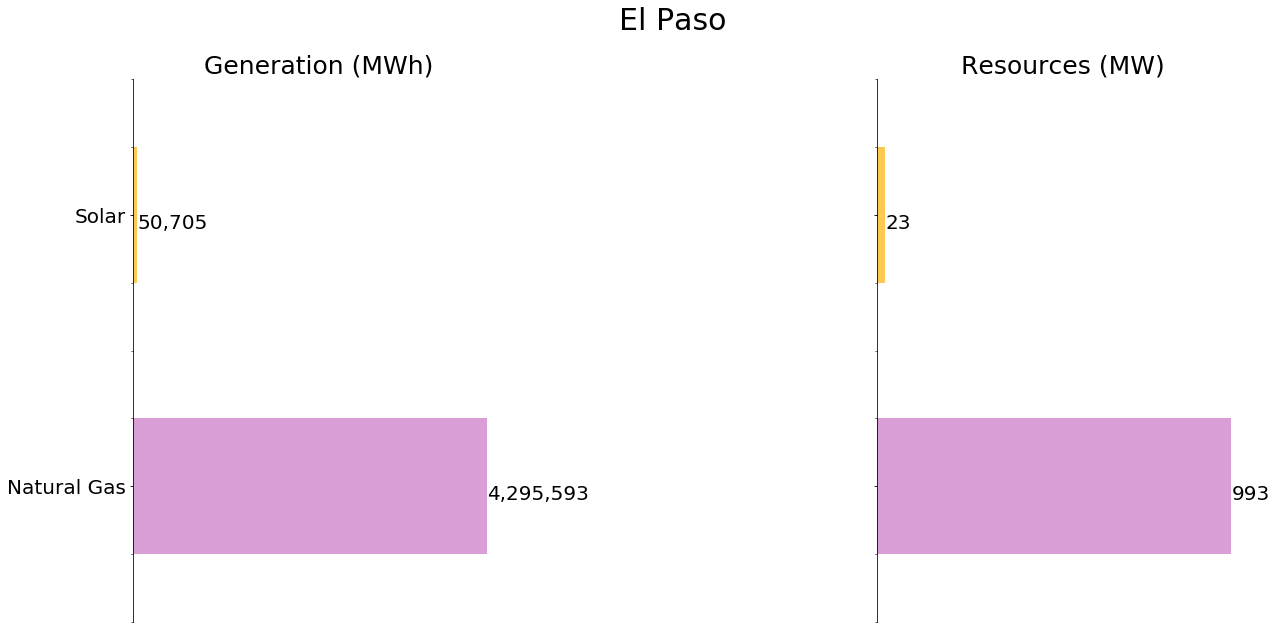

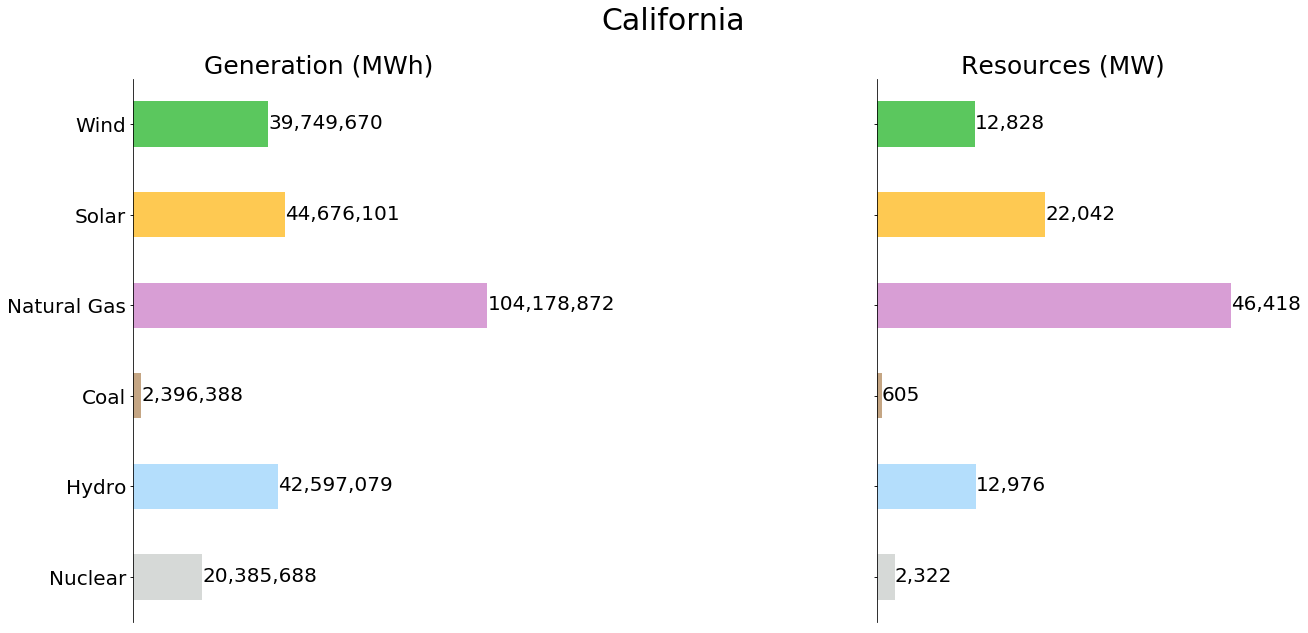

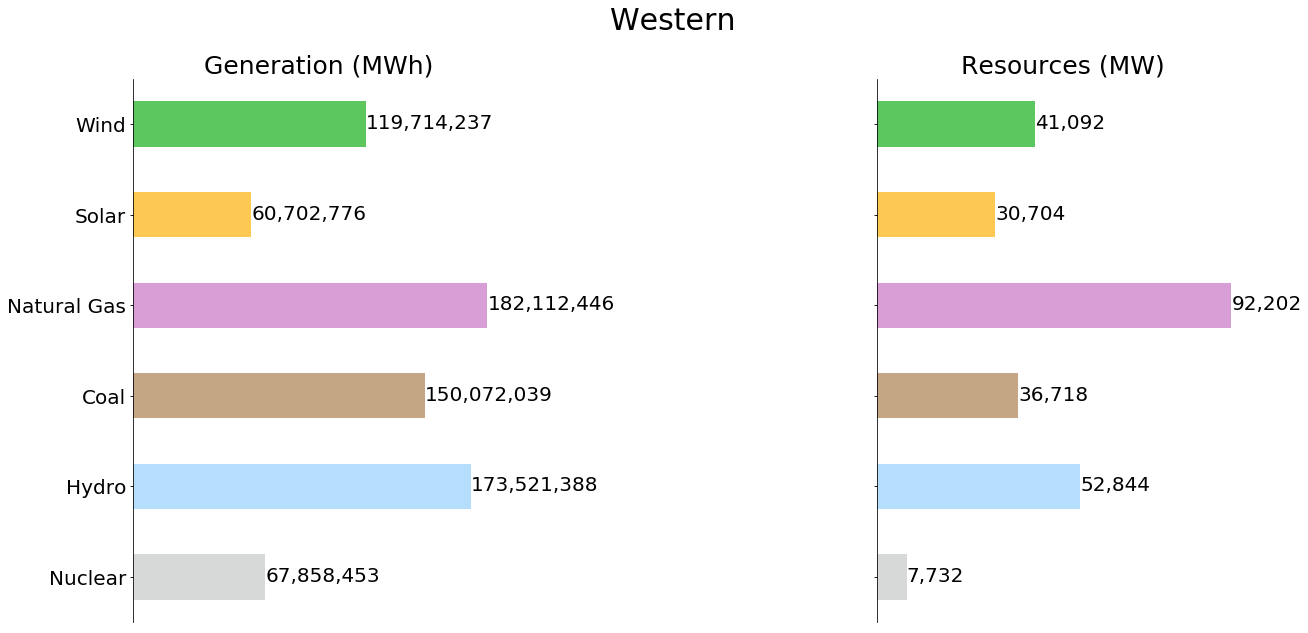

----------------------------------------
Total Generation in Washington: 129454982 MWh
Total Capacity in Washington: 35930 MW
----------------------------------------
Total Generation in Oregon: 66107506 MWh
Total Capacity in Oregon: 20635 MW
----------------------------------------
Total Generation in Northern California: 39571868 MWh
Total Capacity in Northern California: 14798 MW
----------------------------------------
Total Generation in Bay Area: 29734077 MWh
Total Capacity in Bay Area: 11909 MW
----------------------------------------
Total Generation in Central California: 35472625 MWh
Total Capacity in Central California: 13450 MW
----------------------------------------
Total Generation in Southwest California: 100638914 MWh
Total Capacity in Southwest California: 36022 MW
----------------------------------------
Total Generation in Southeast California: 48566317 MWh
Total Capacity in Southeast California: 21015 MW
----------------------------------------
Total Generation in 

In [7]:
time = ('2016-01-01-00', '2016-12-31-23', 'utc', 'H')
data = prepare_data(scenario)
do_chart_analysis(data, time, list(win_data.load_zones.values()) + ['California','Western'])

## Winter

Load solar data
Load wind data
Load demand data
Set UTC for all zones


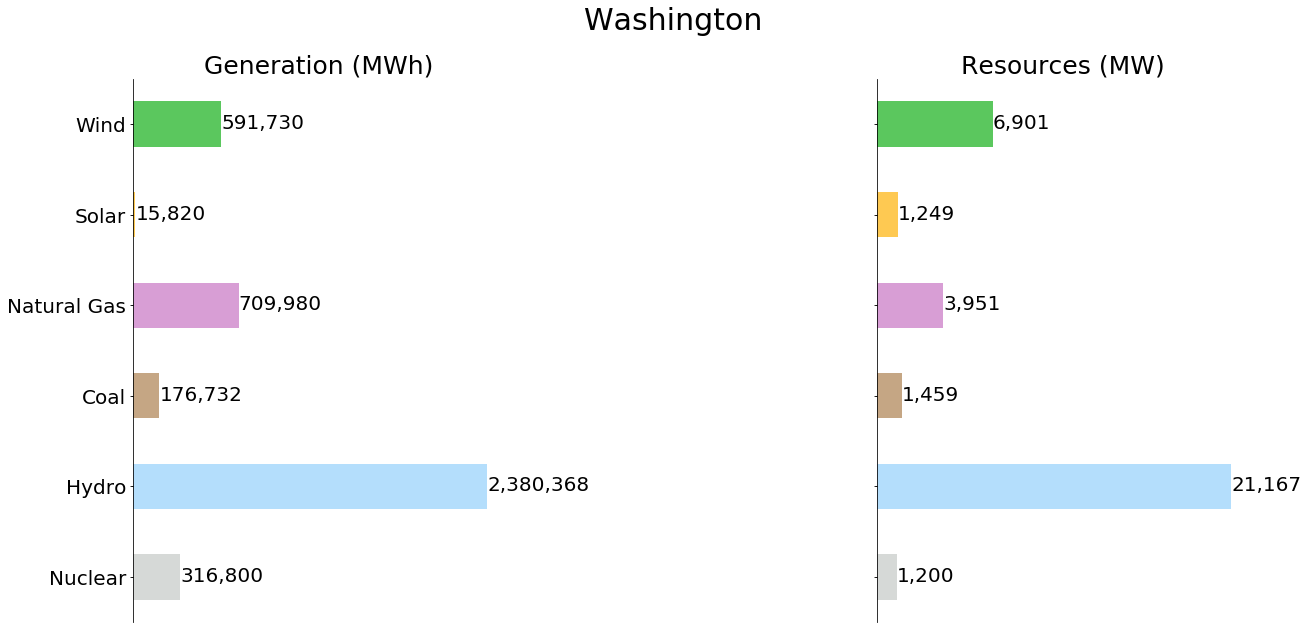

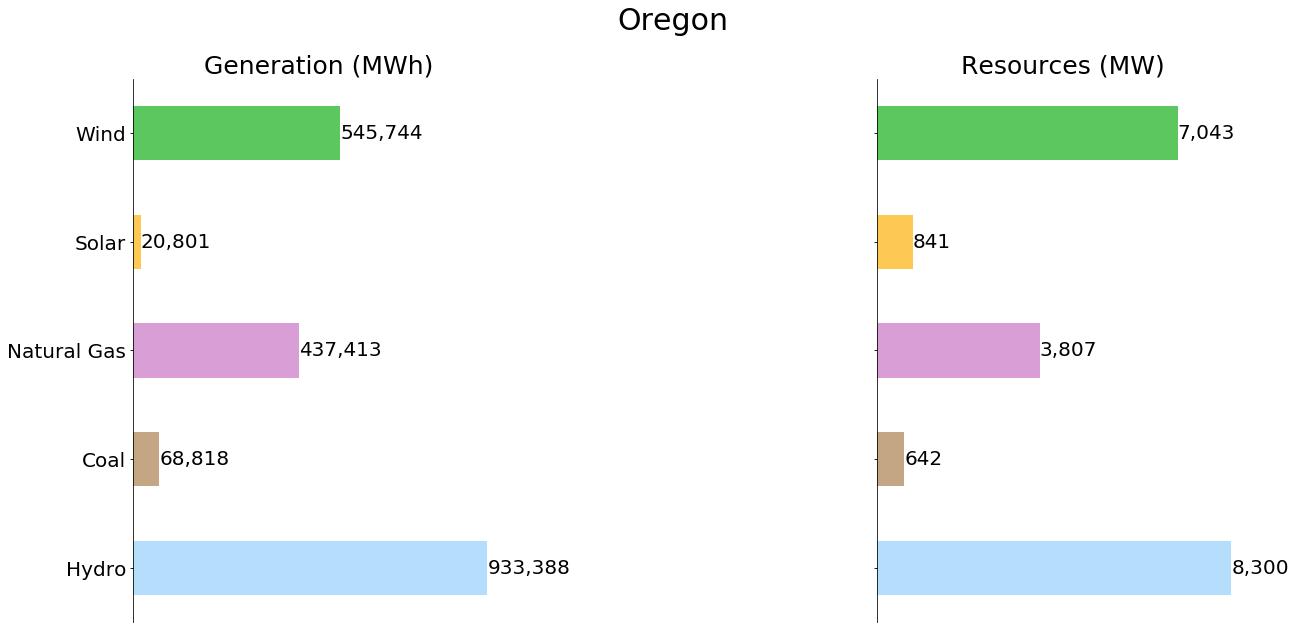

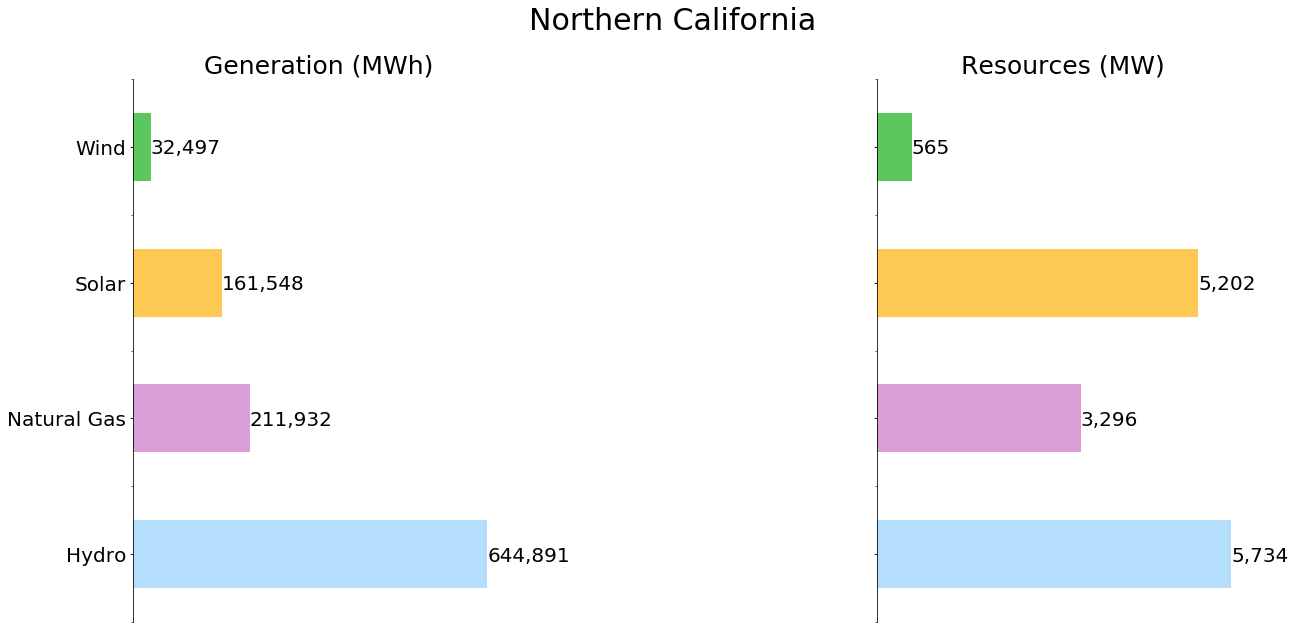

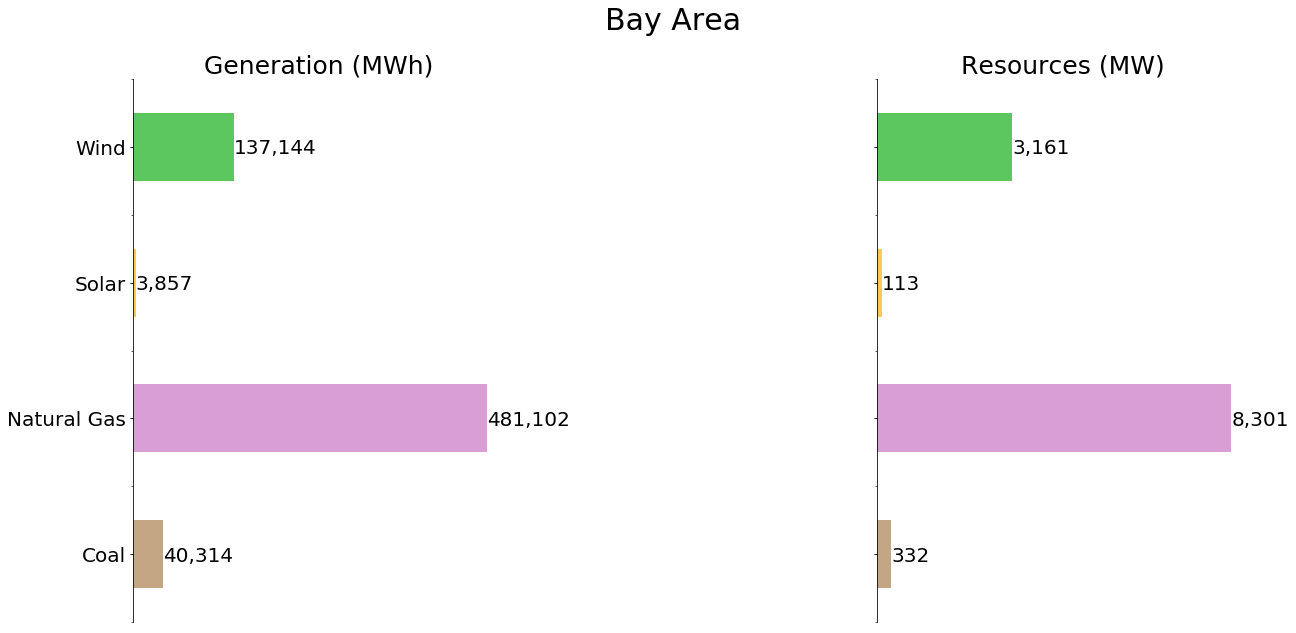

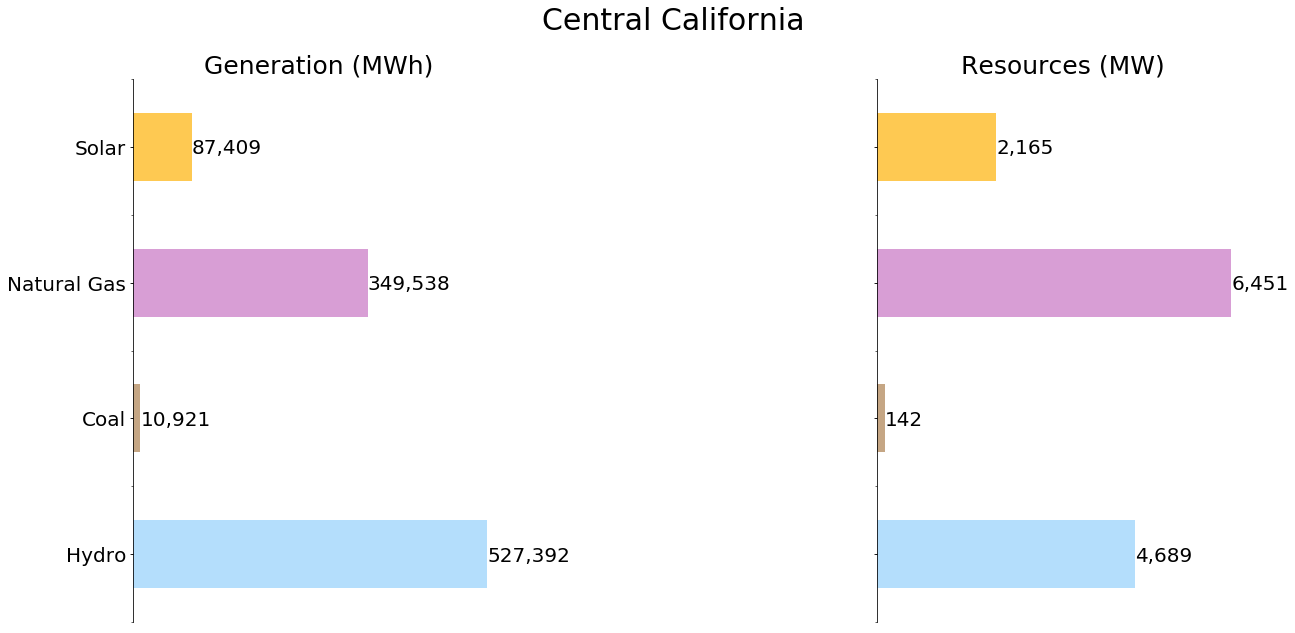

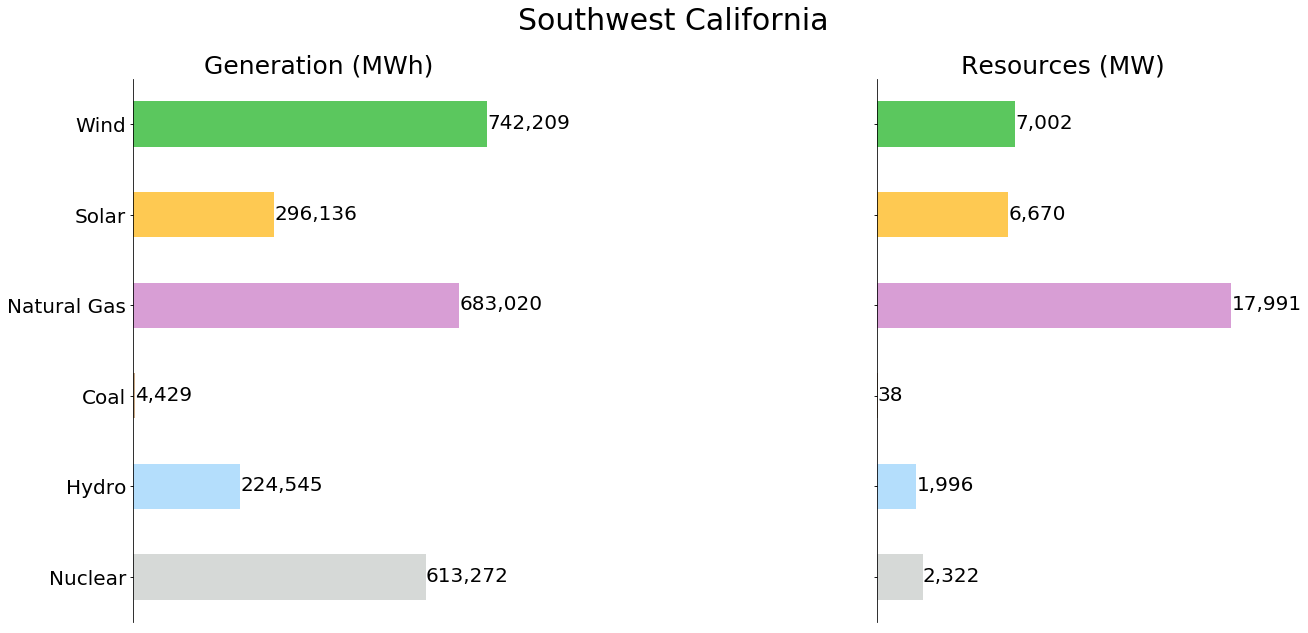

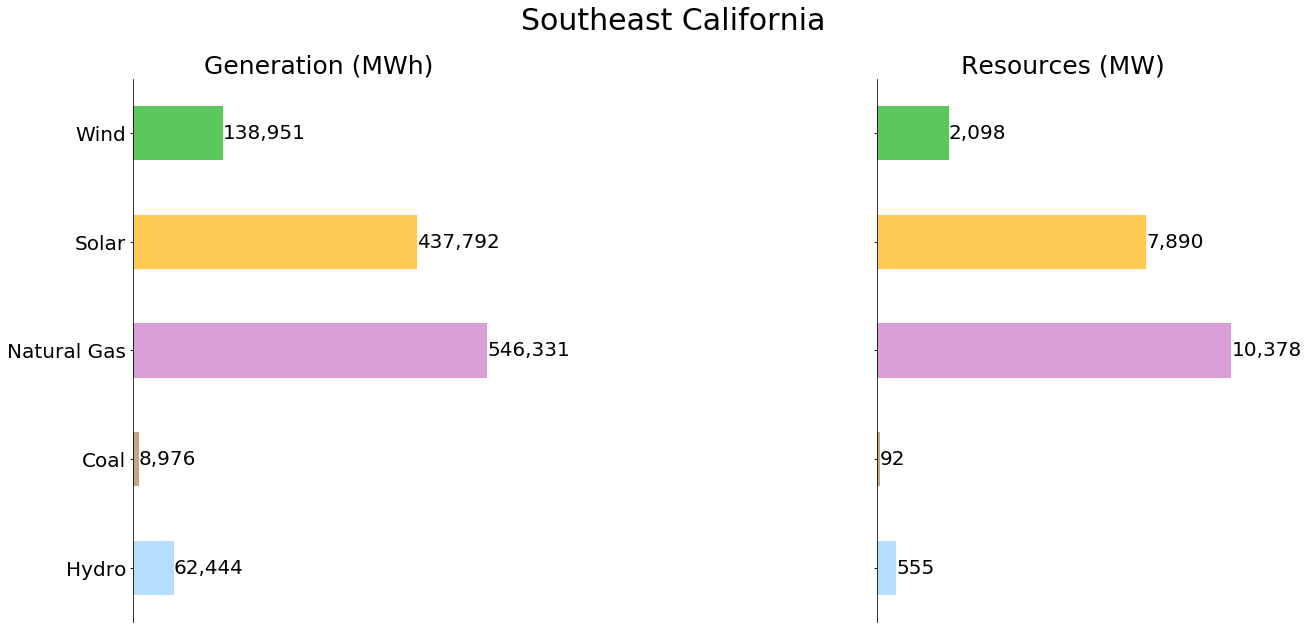

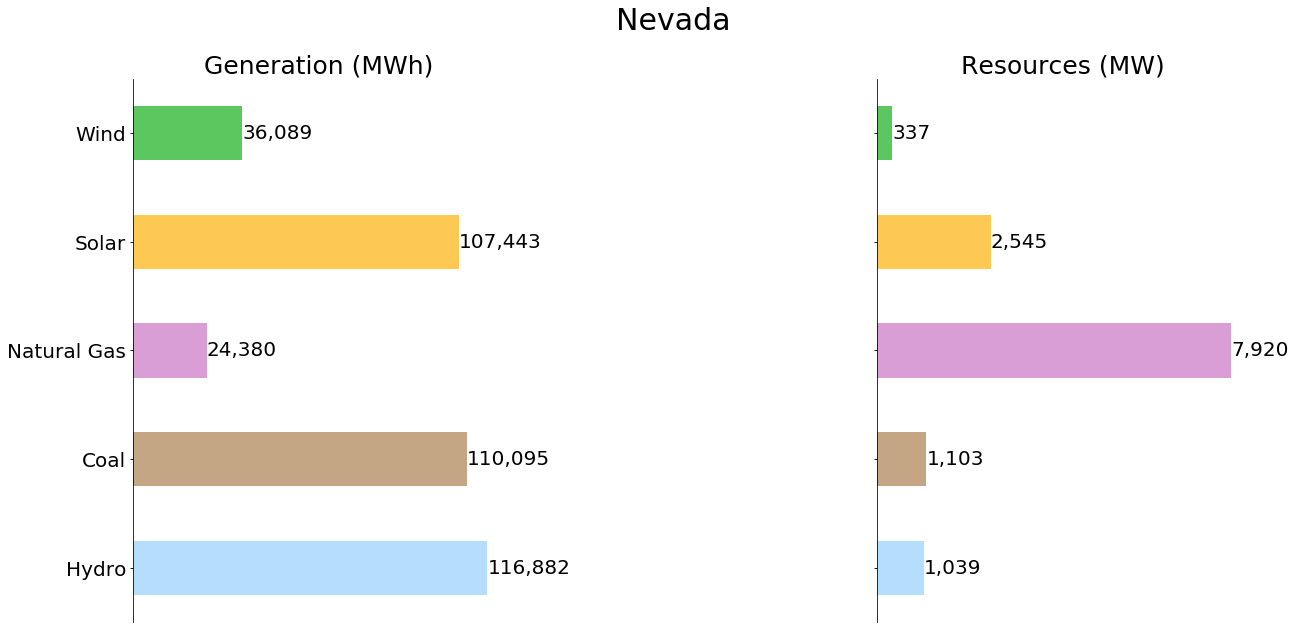

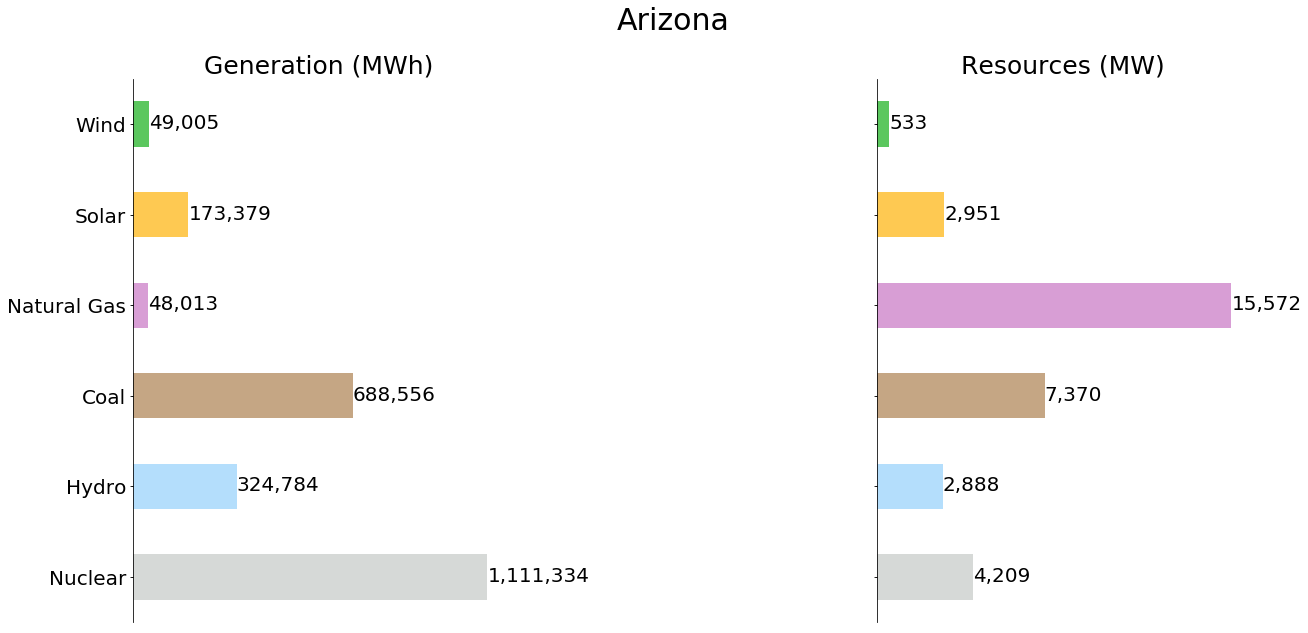

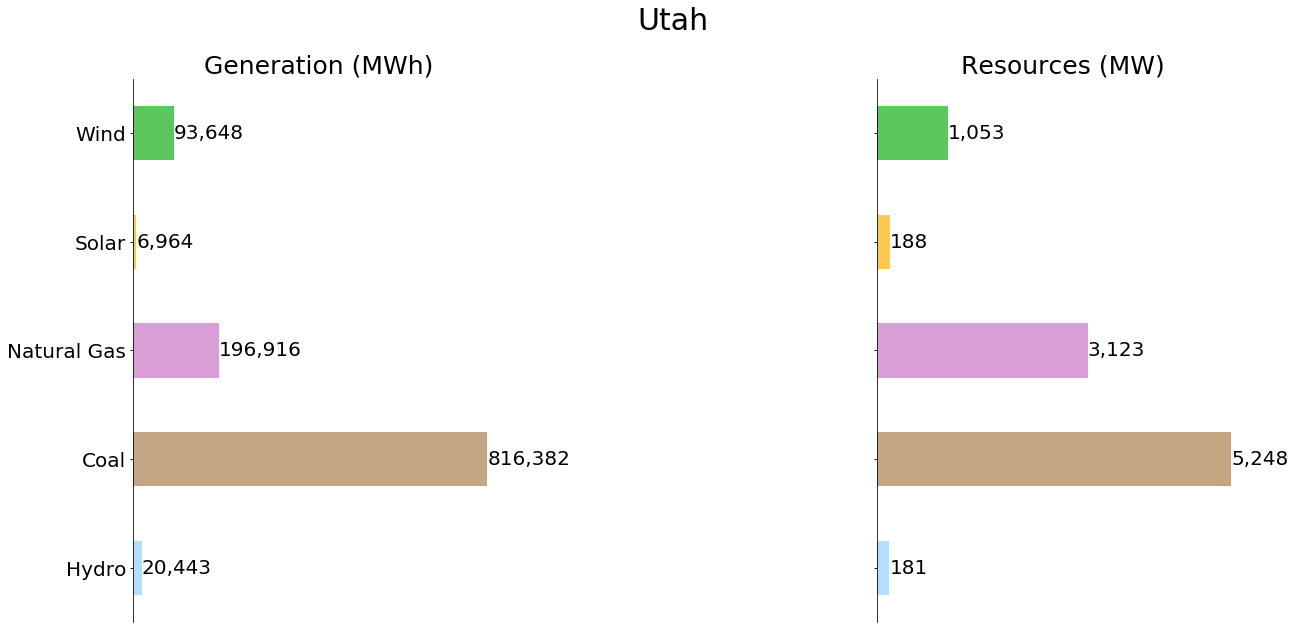

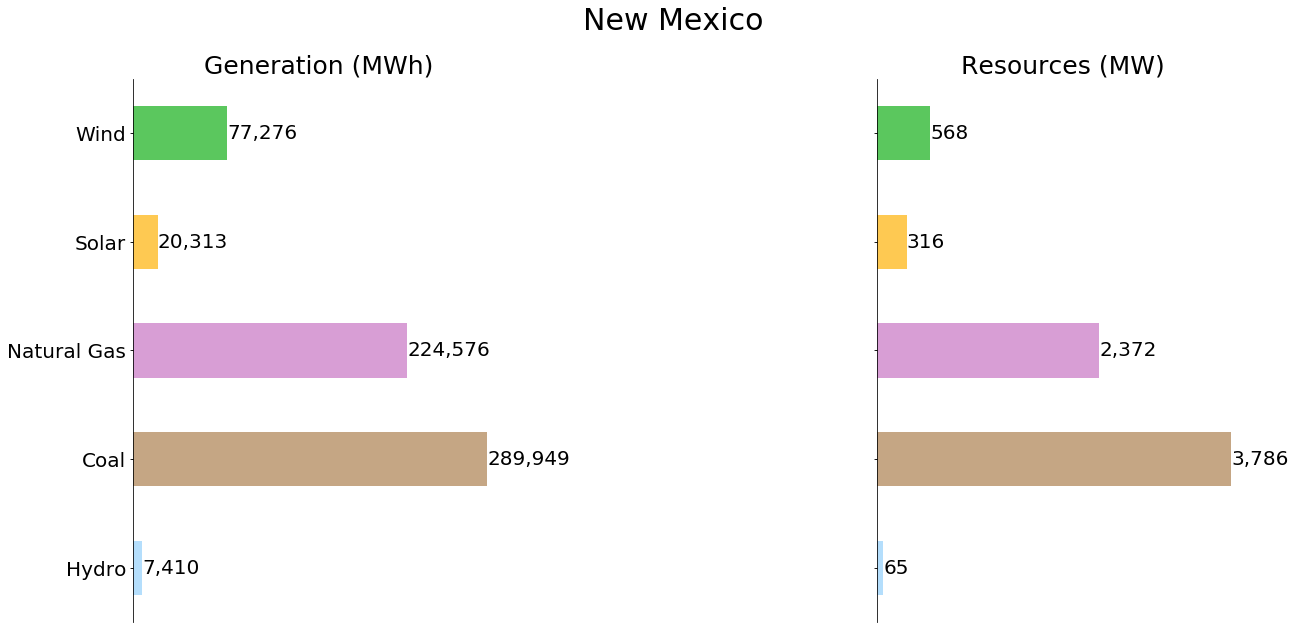

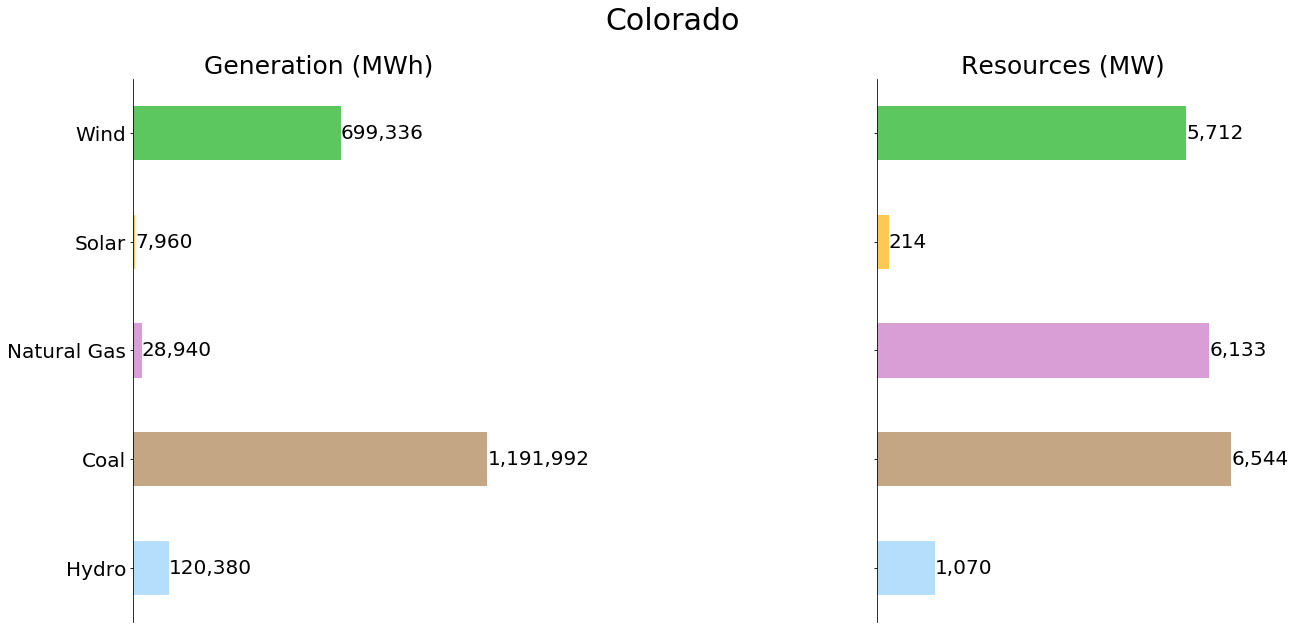

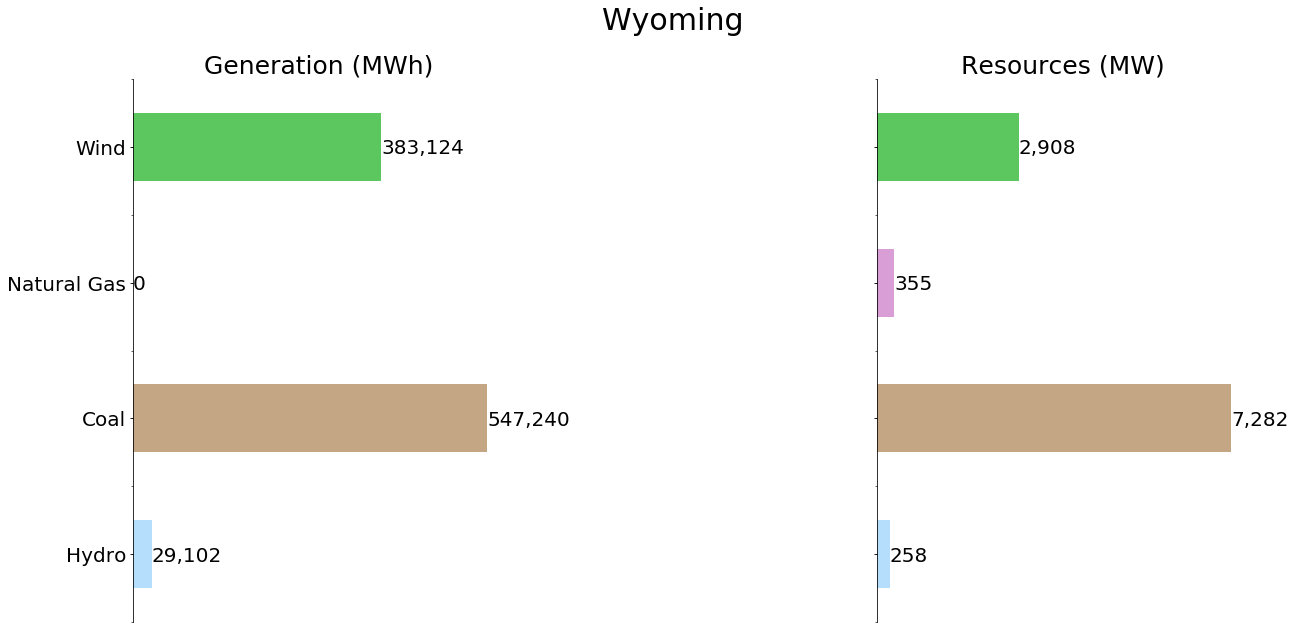

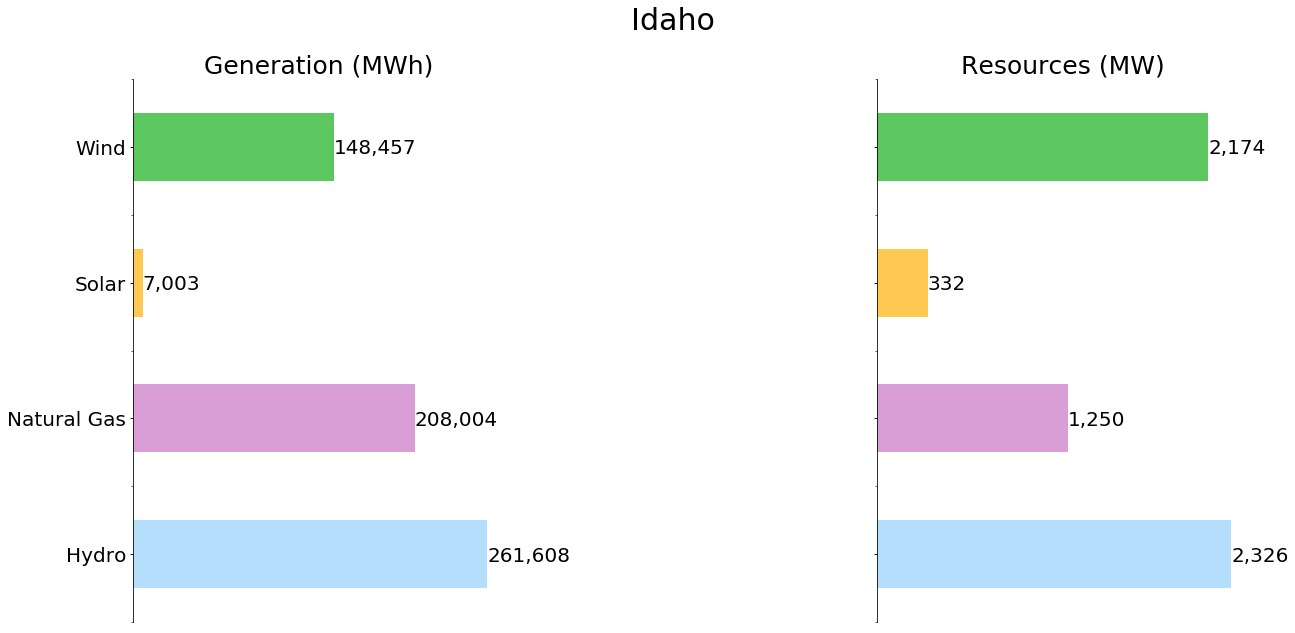

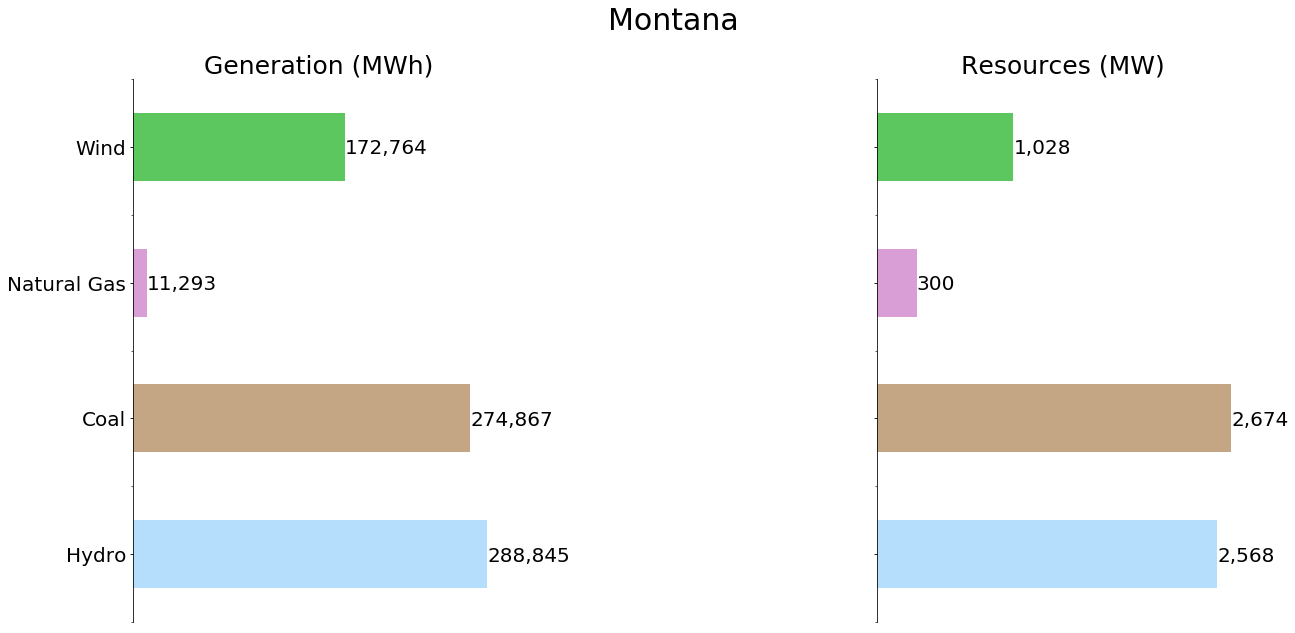

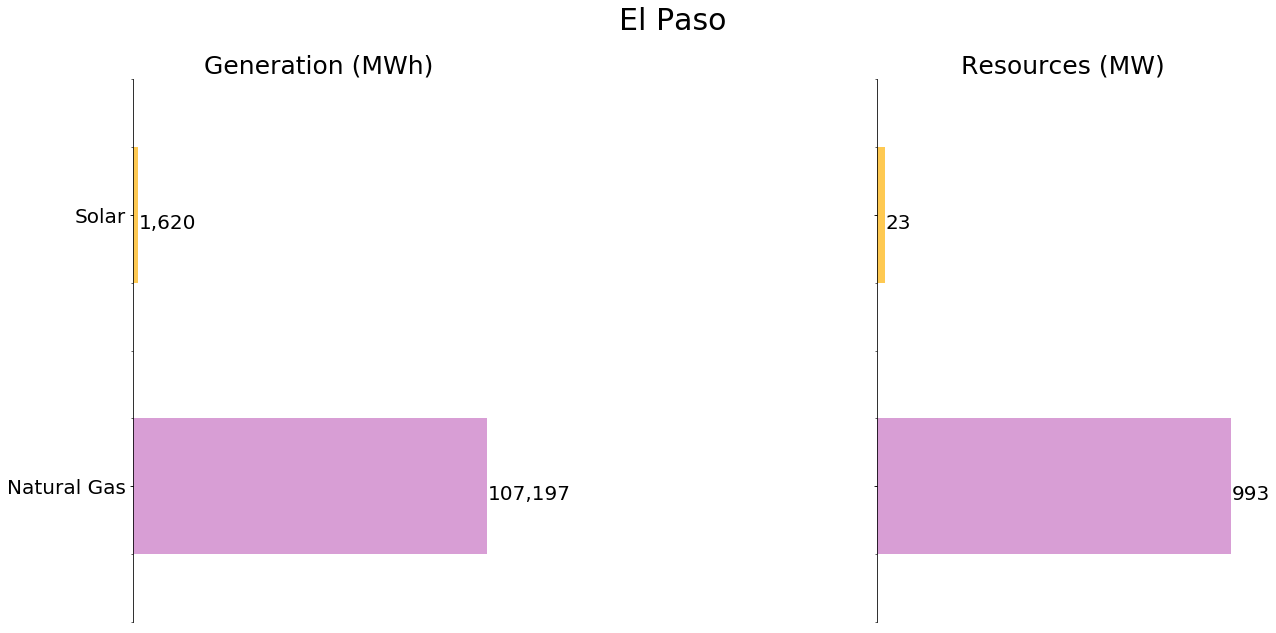

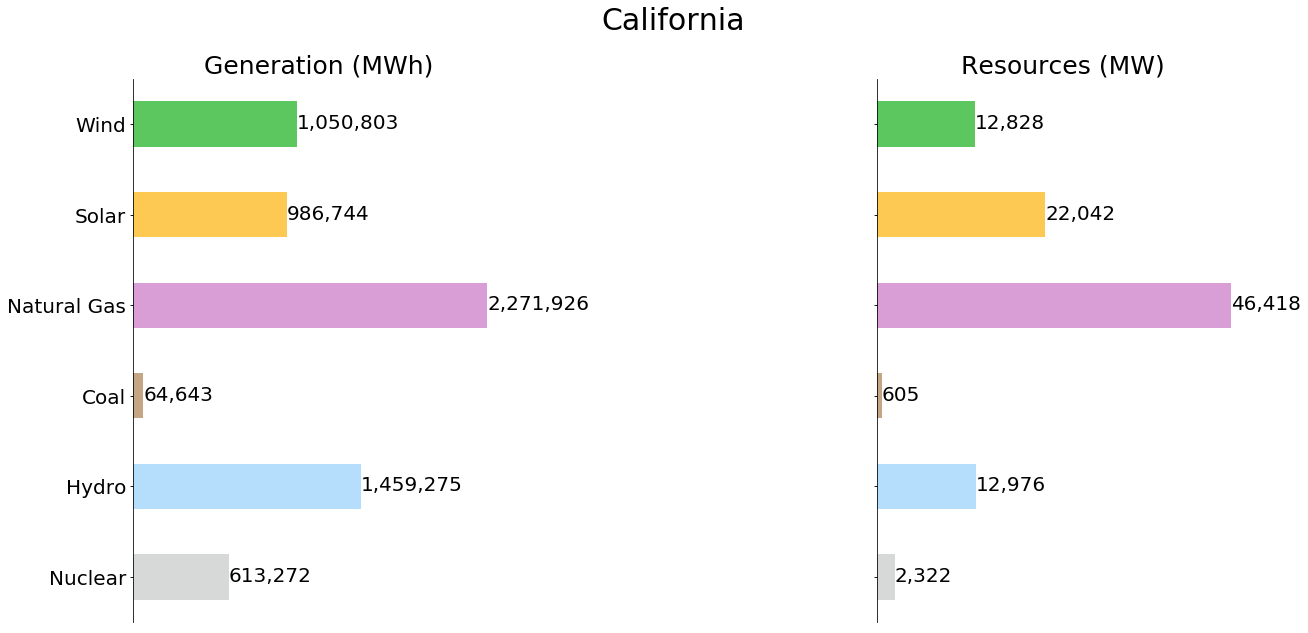

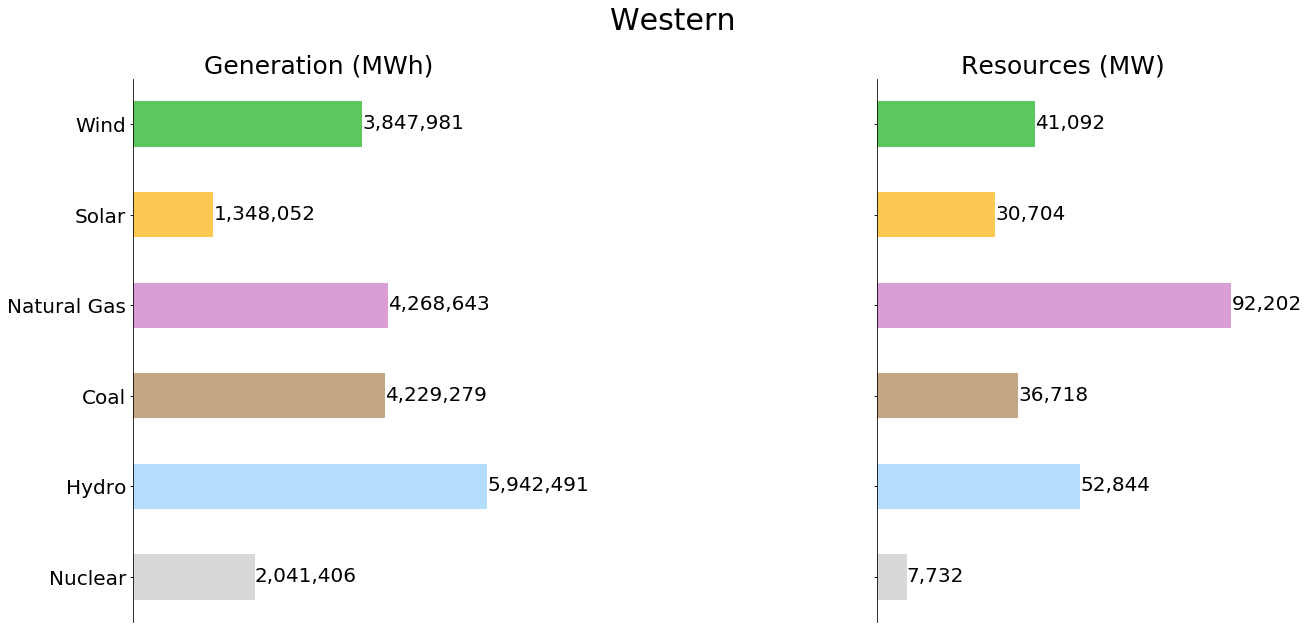

----------------------------------------
Total Generation in Washington: 4191432 MWh
Total Capacity in Washington: 35930 MW
----------------------------------------
Total Generation in Oregon: 2006166 MWh
Total Capacity in Oregon: 20635 MW
----------------------------------------
Total Generation in Northern California: 1050870 MWh
Total Capacity in Northern California: 14798 MW
----------------------------------------
Total Generation in Bay Area: 662419 MWh
Total Capacity in Bay Area: 11909 MW
----------------------------------------
Total Generation in Central California: 975263 MWh
Total Capacity in Central California: 13450 MW
----------------------------------------
Total Generation in Southwest California: 2563614 MWh
Total Capacity in Southwest California: 36022 MW
----------------------------------------
Total Generation in Southeast California: 1194498 MWh
Total Capacity in Southeast California: 21015 MW
----------------------------------------
Total Generation in Nevada: 394

In [8]:
time = ('2016-01-21-00', '2016-01-31-23', 'utc', 'H')
data = prepare_data(scenario)
do_chart_analysis(data, time, list(win_data.load_zones.values()) + ['California','Western'])

## Spring

Load solar data
Load wind data
Load demand data
Set UTC for all zones


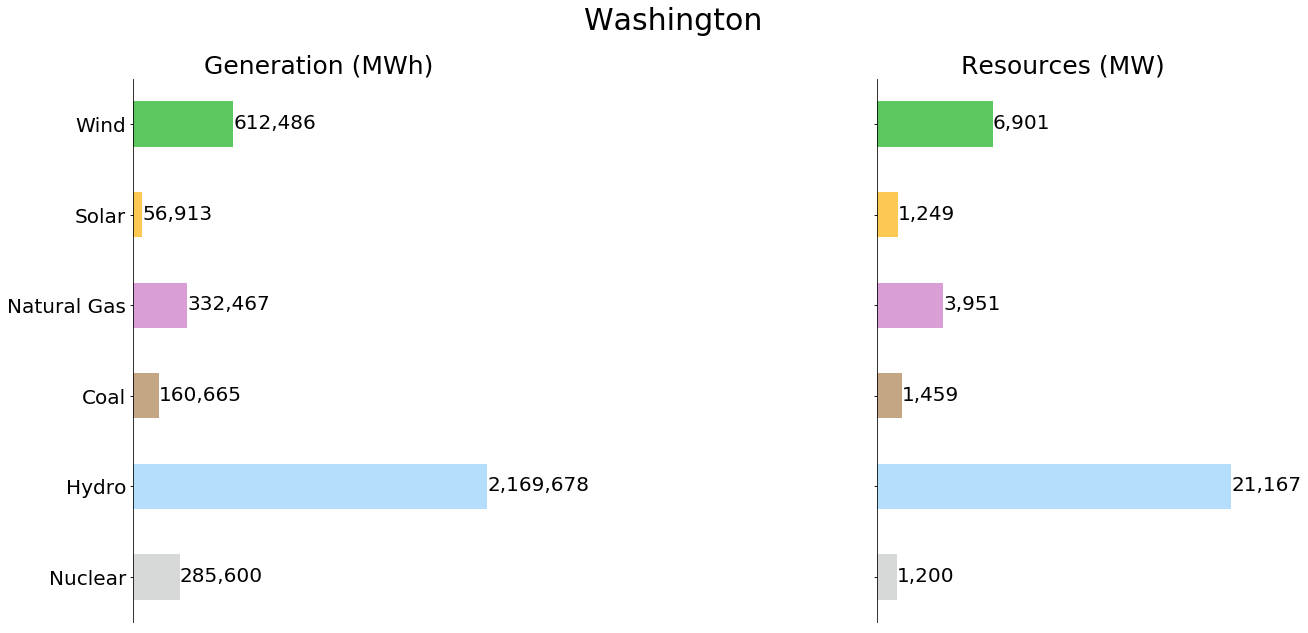

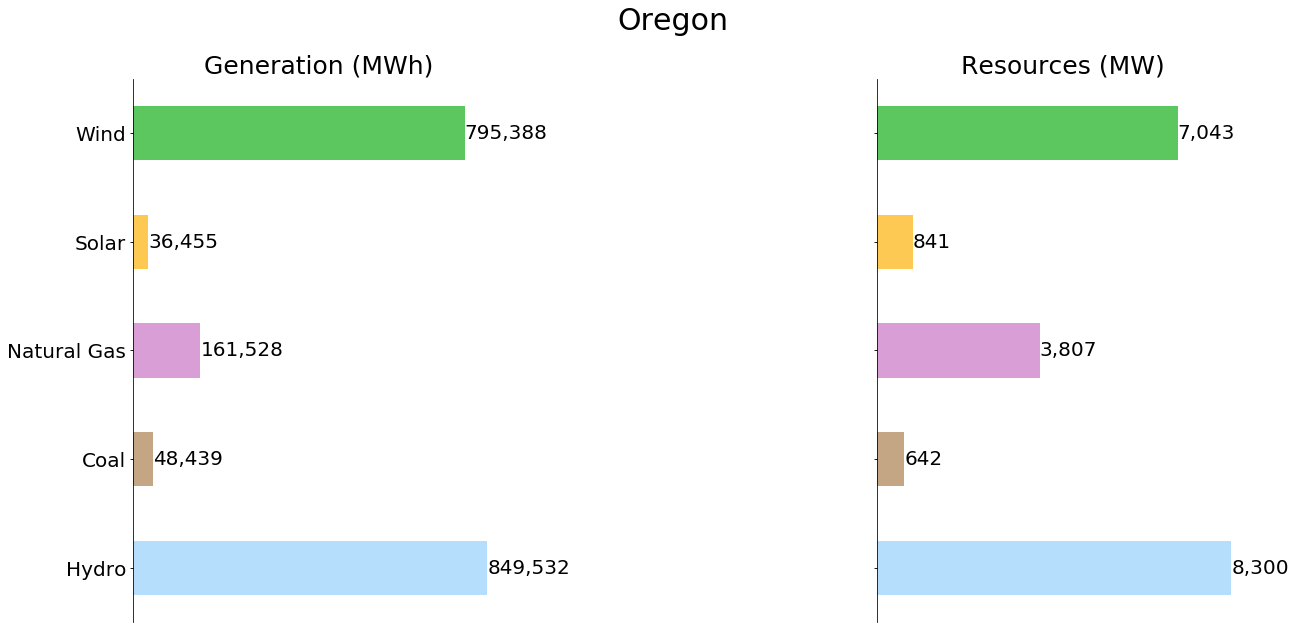

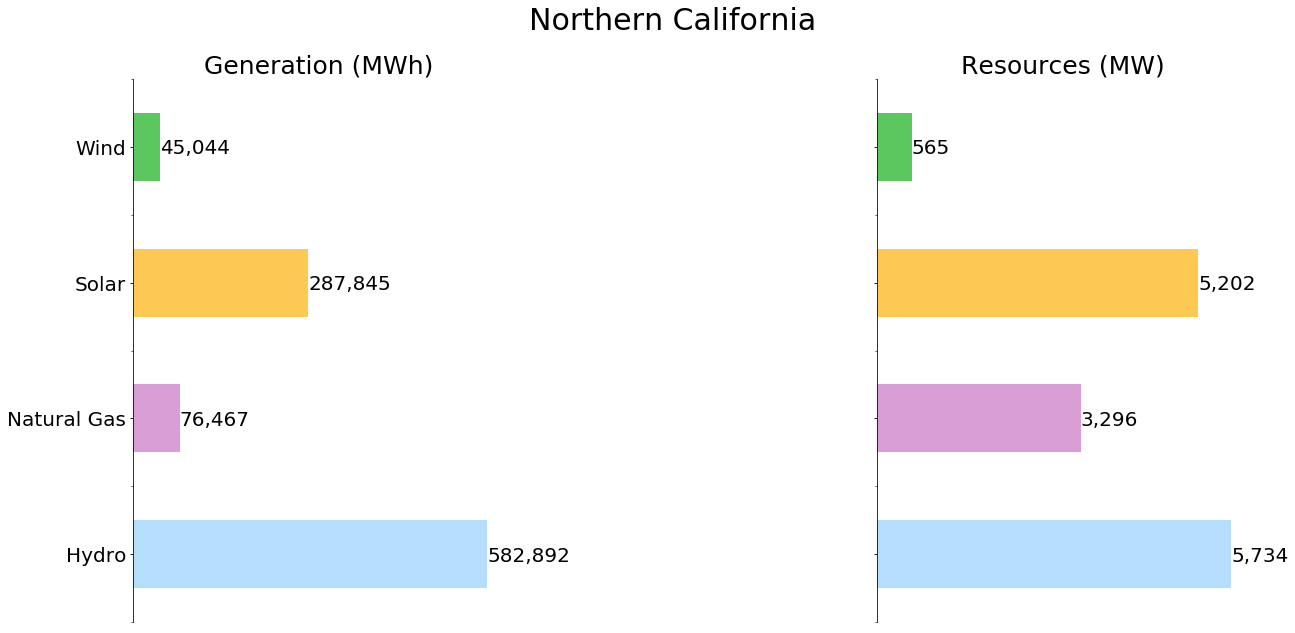

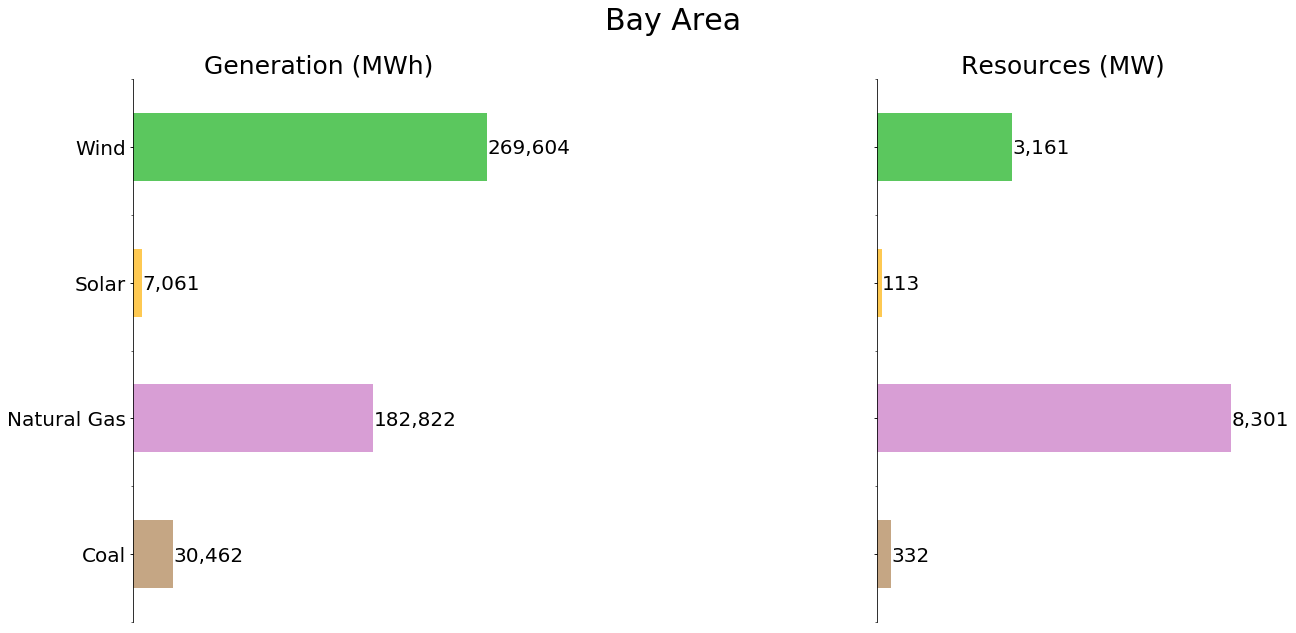

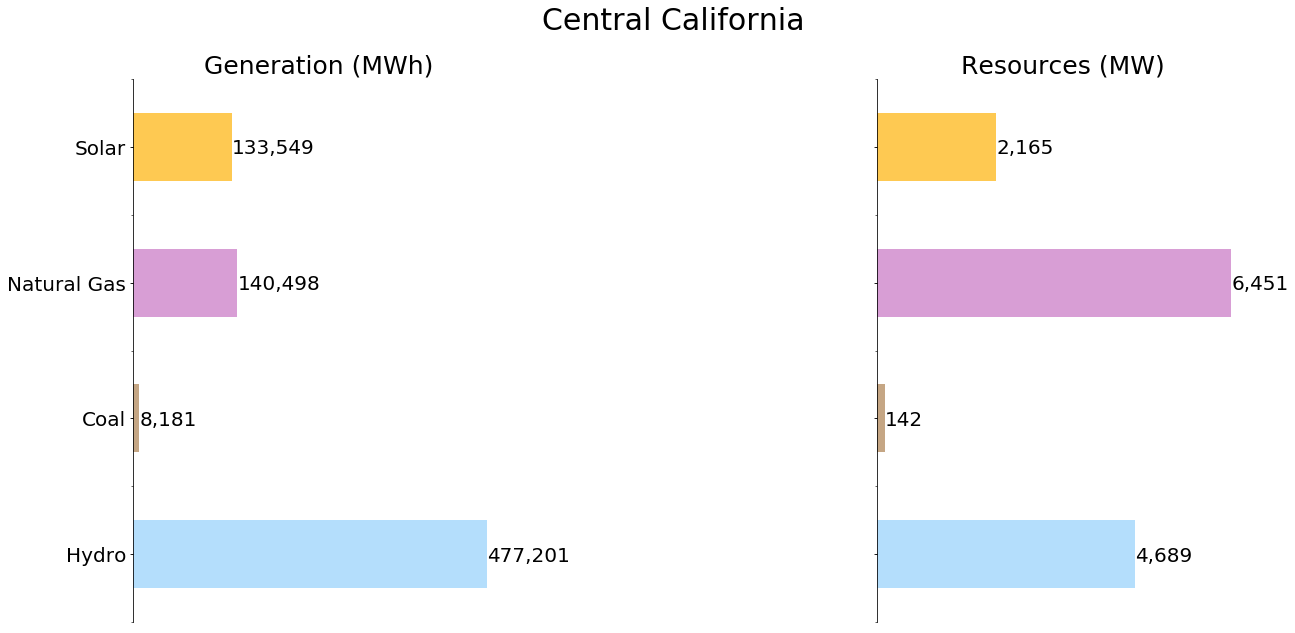

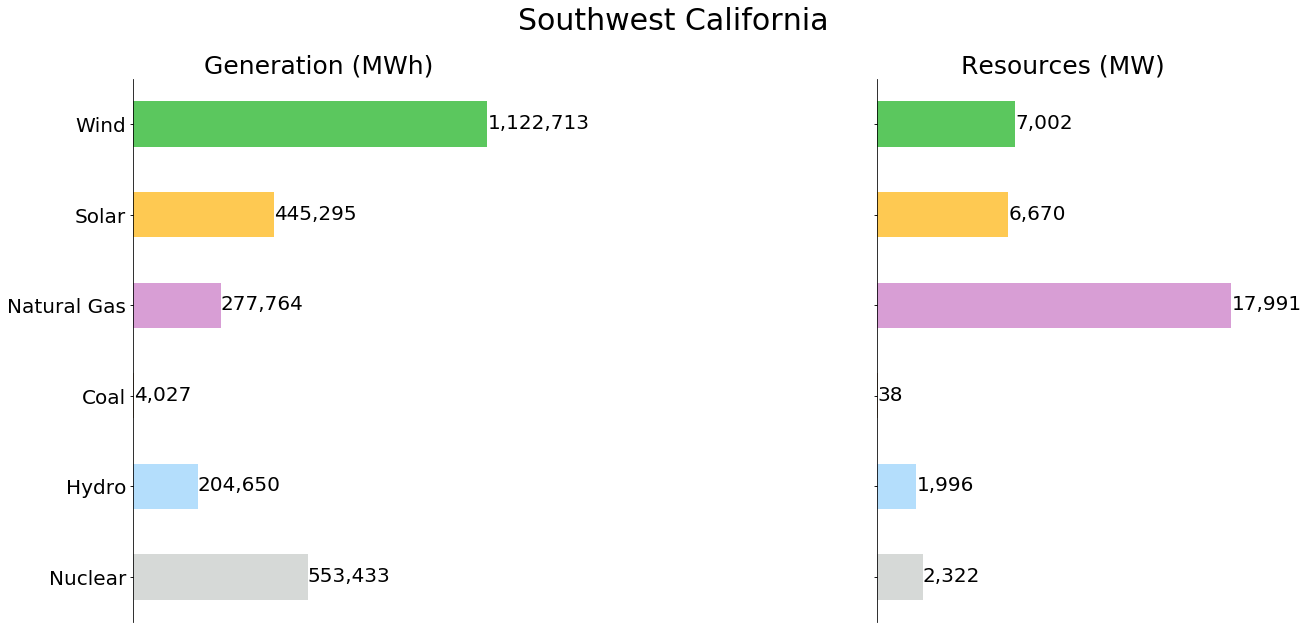

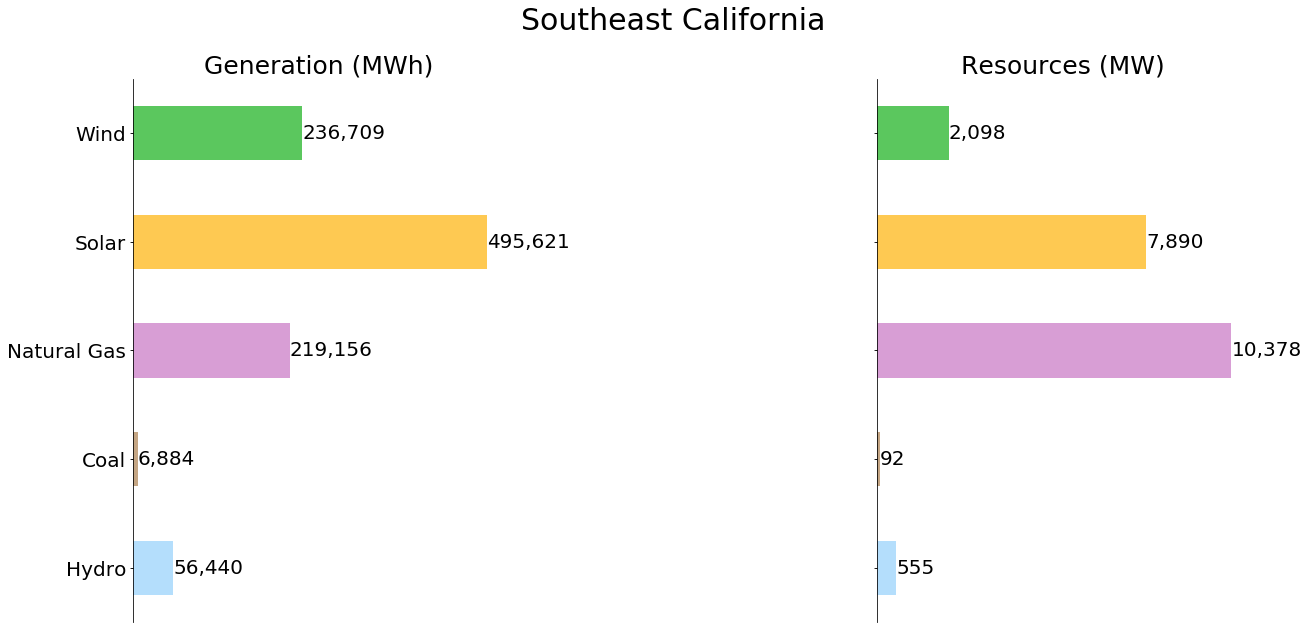

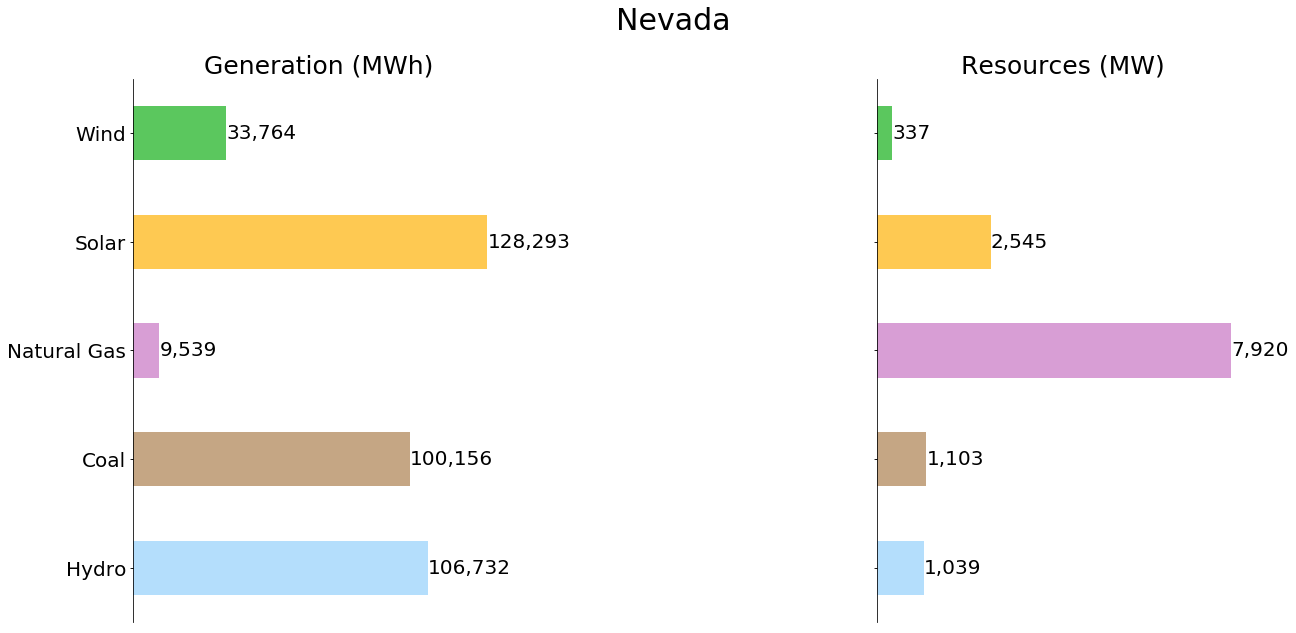

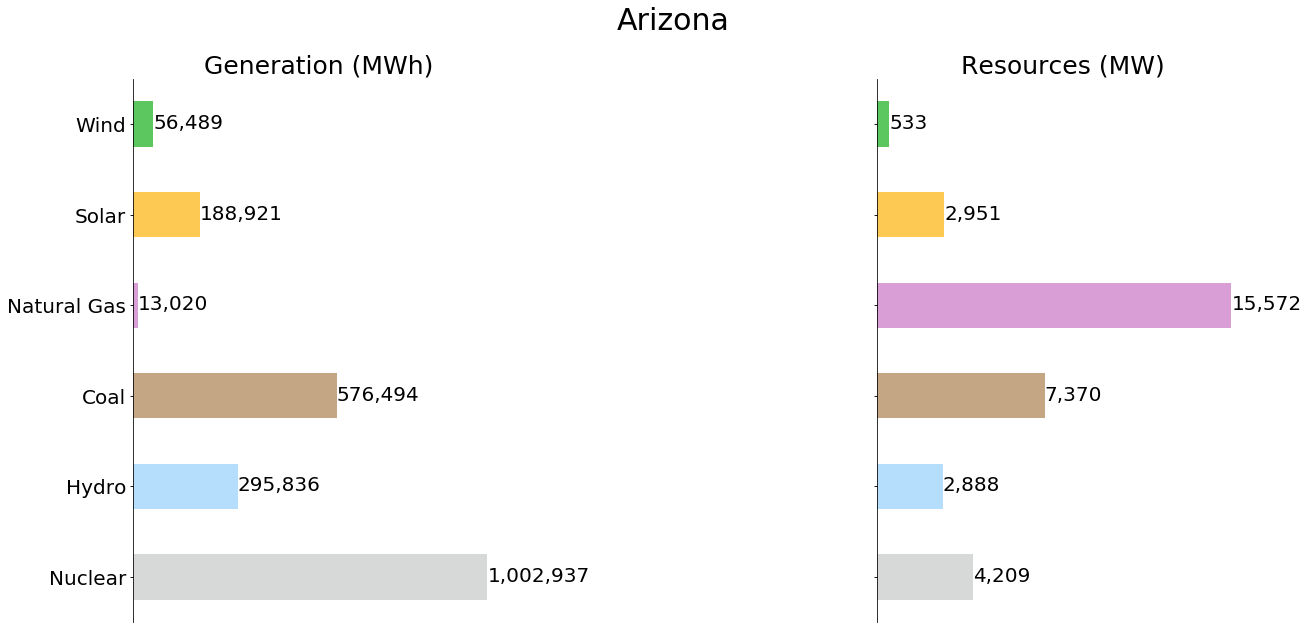

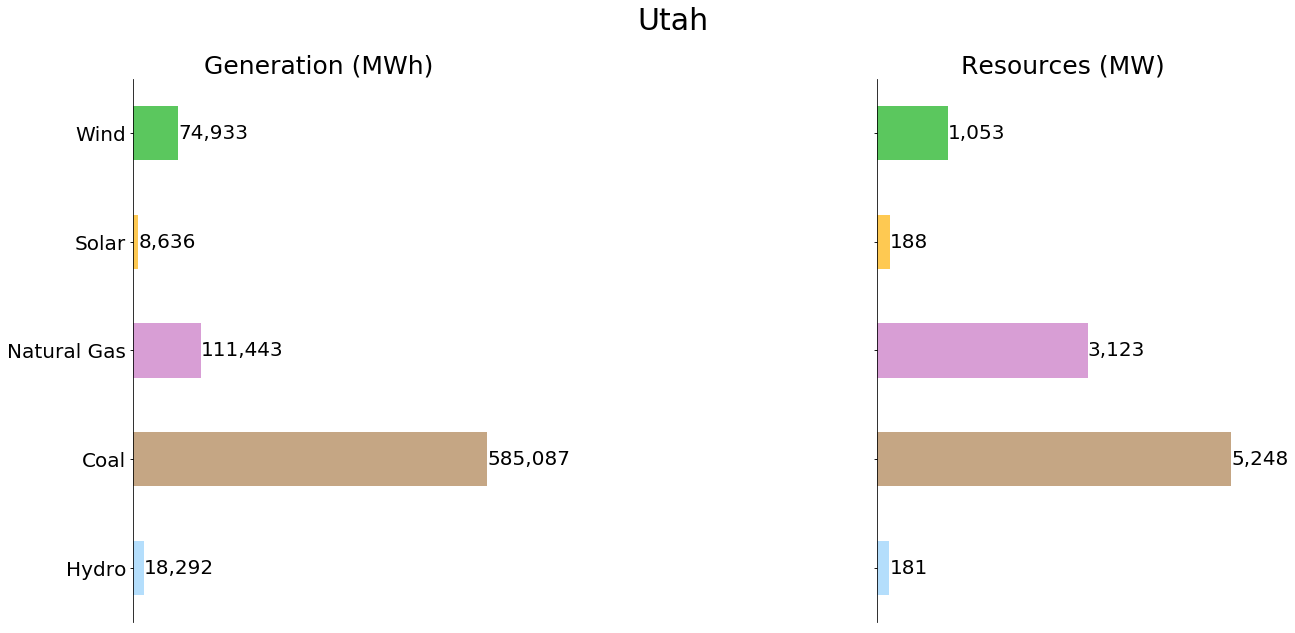

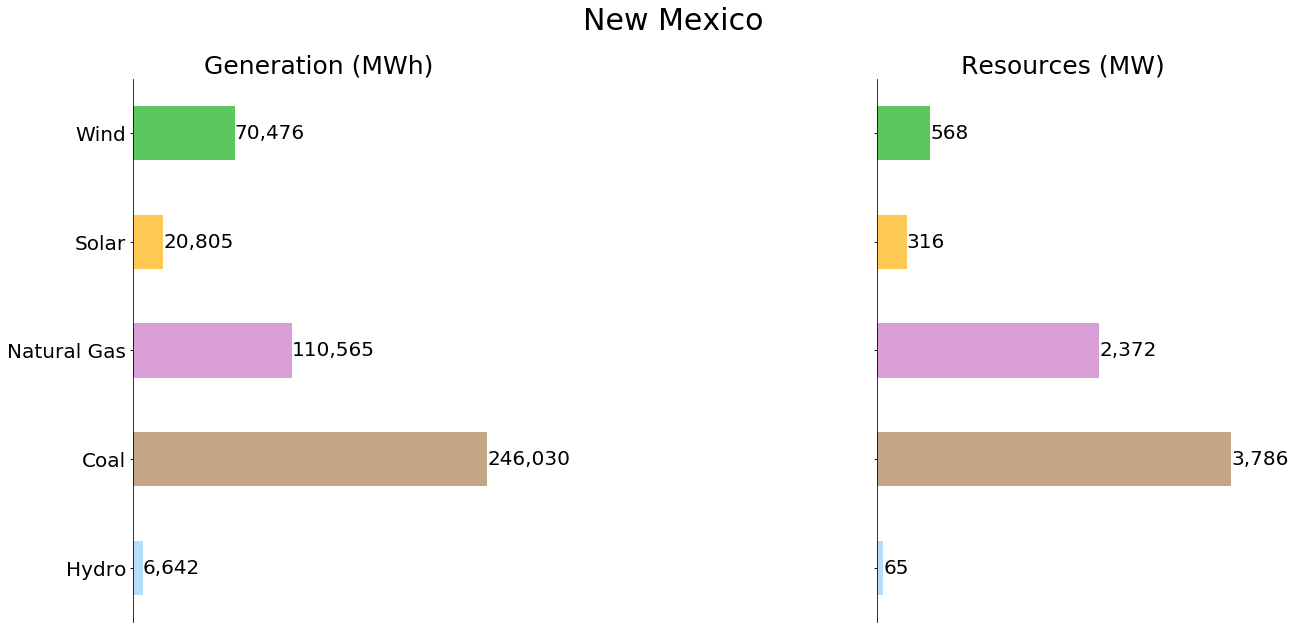

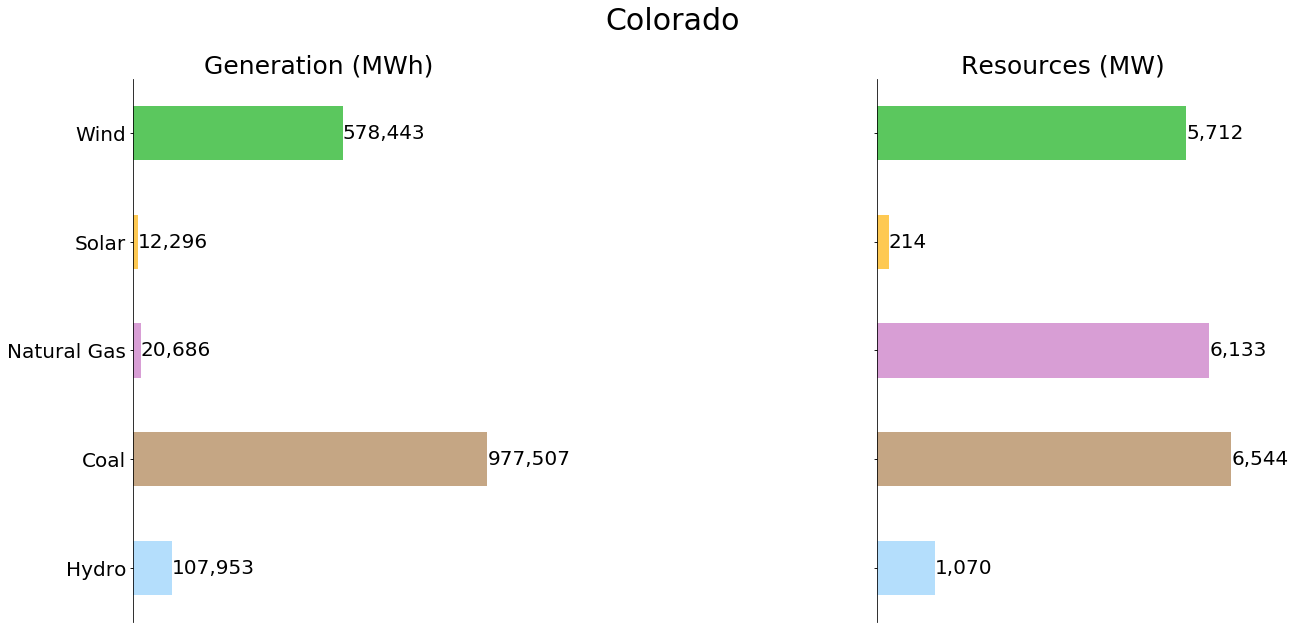

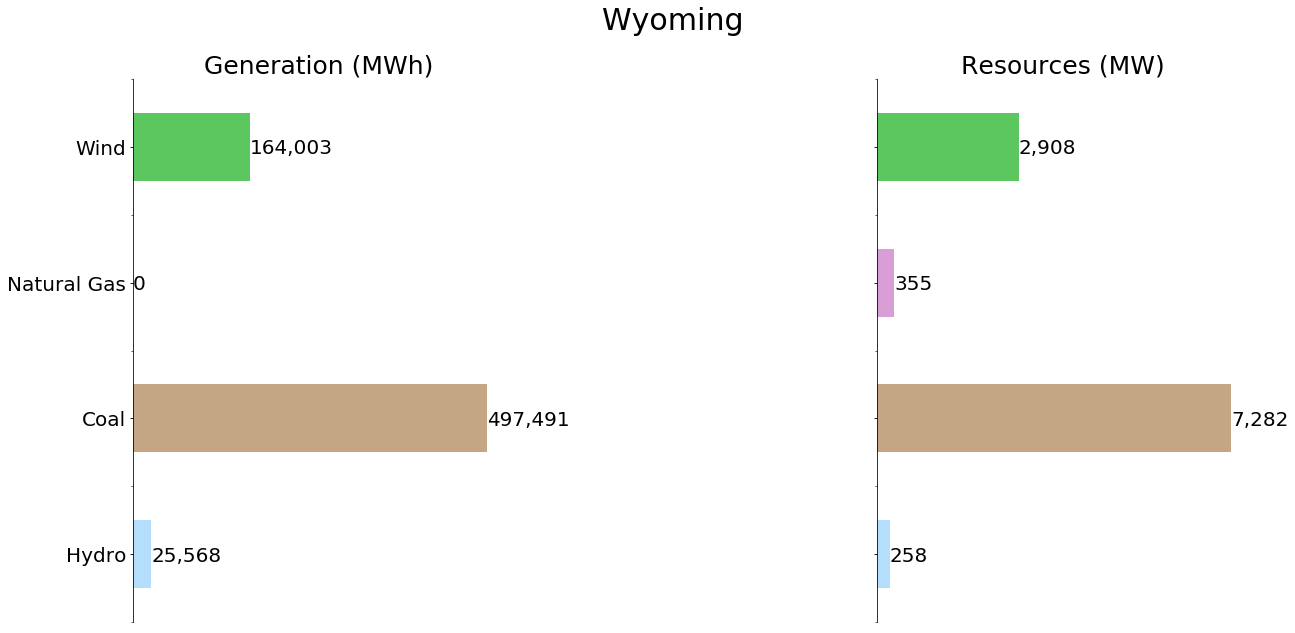

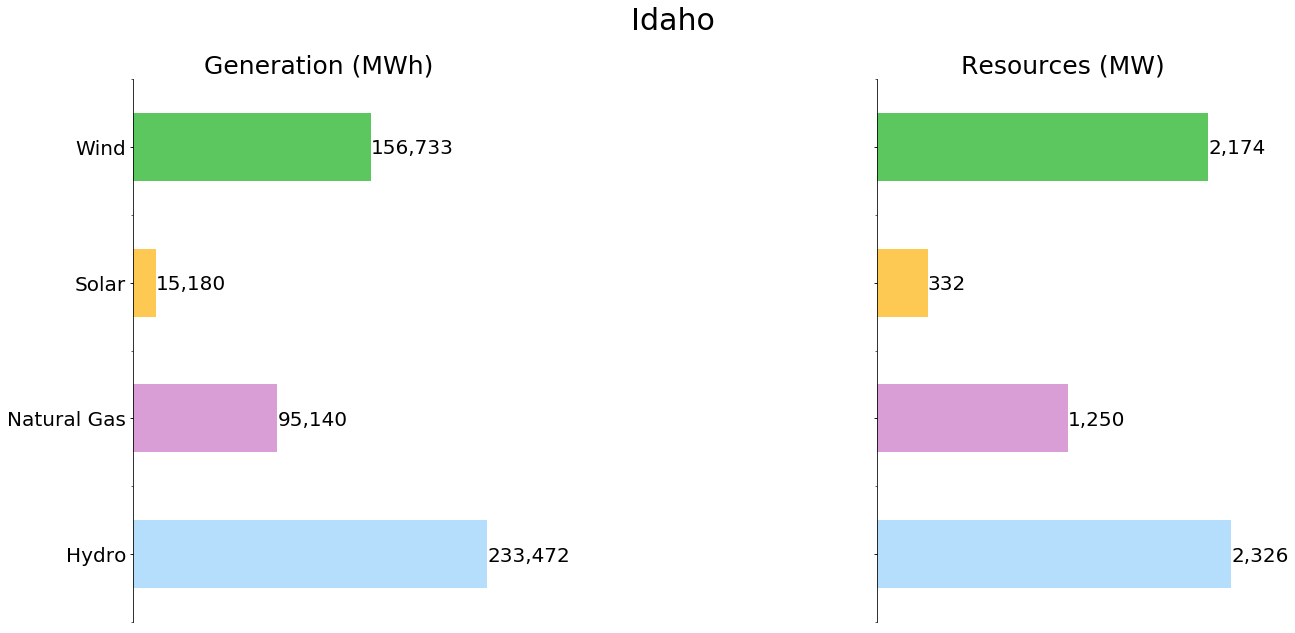

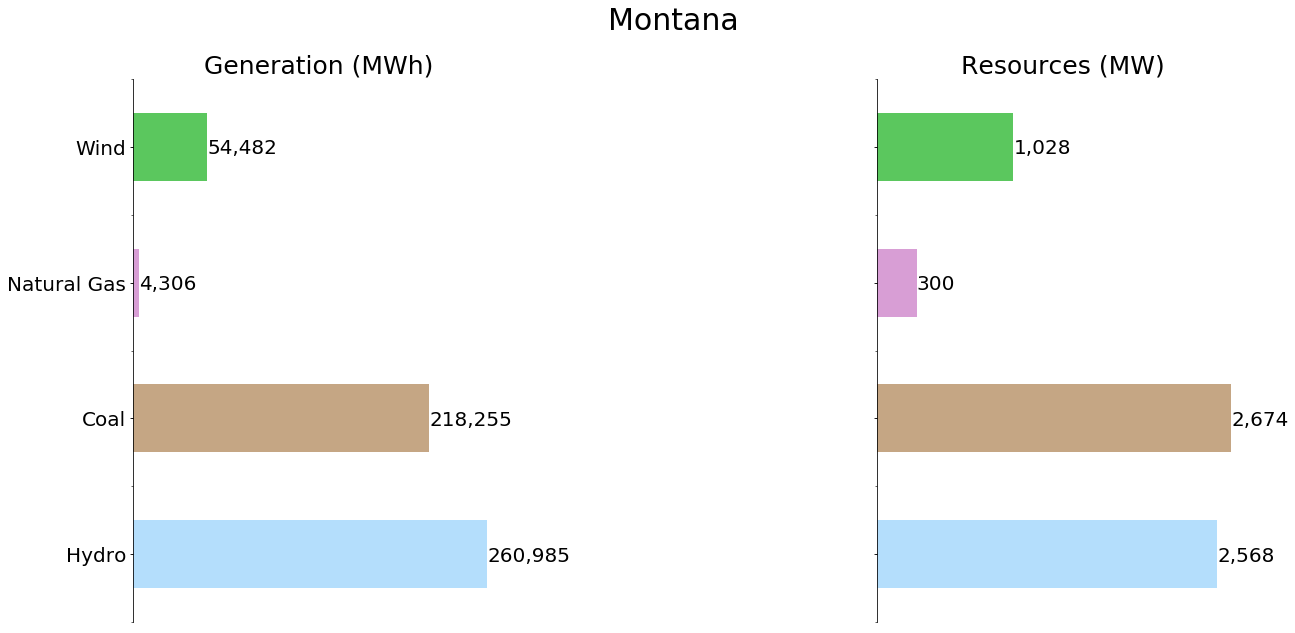

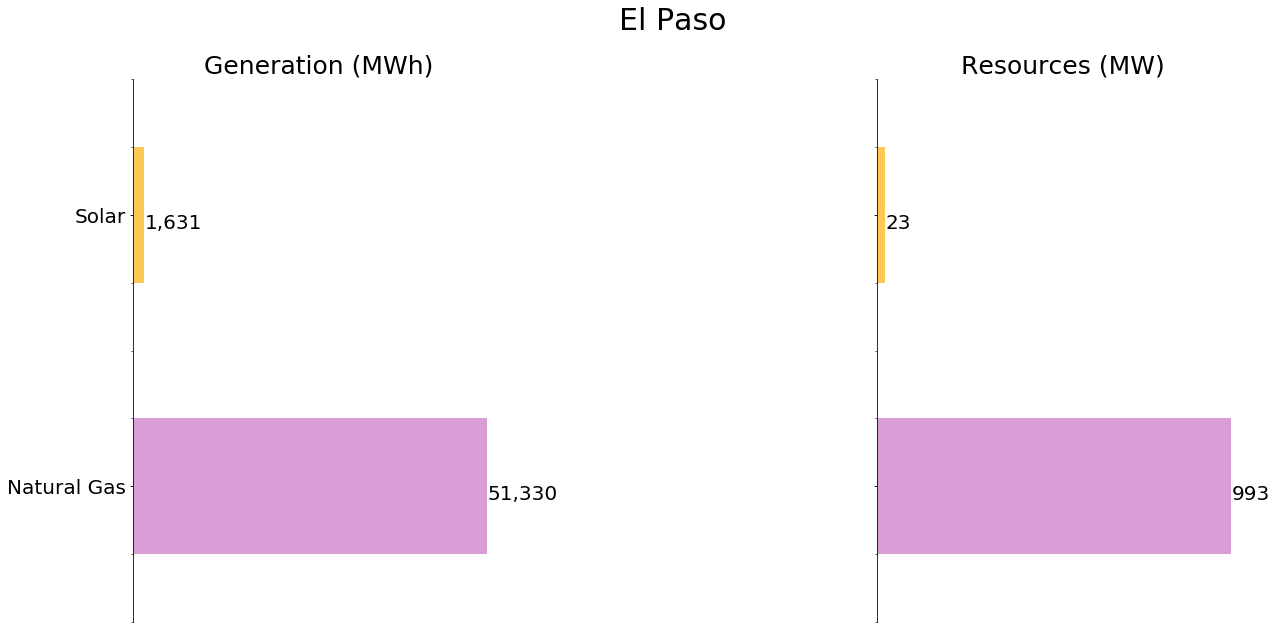

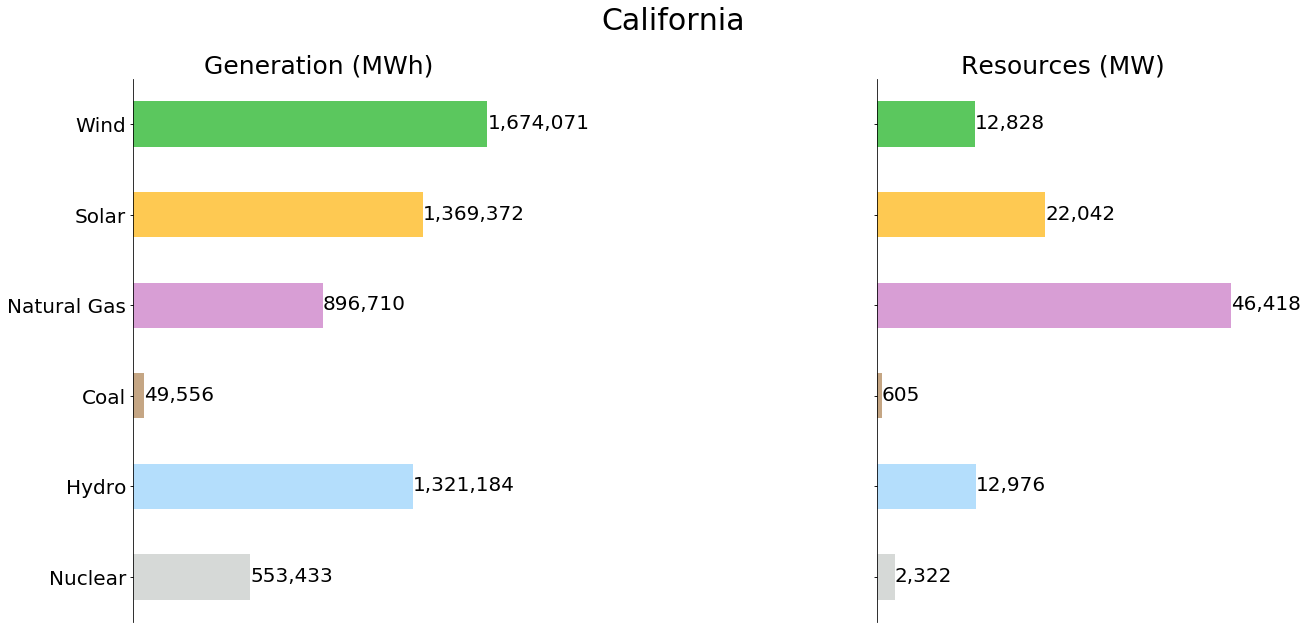

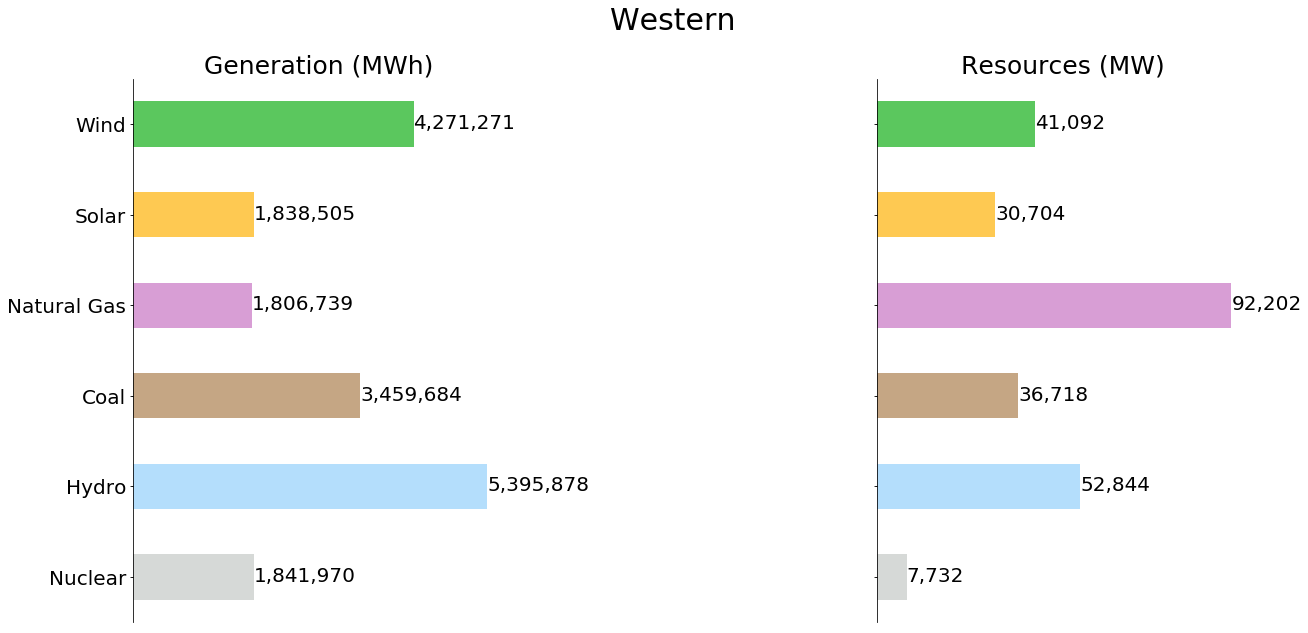

----------------------------------------
Total Generation in Washington: 3617812 MWh
Total Capacity in Washington: 35930 MW
----------------------------------------
Total Generation in Oregon: 1891343 MWh
Total Capacity in Oregon: 20635 MW
----------------------------------------
Total Generation in Northern California: 992250 MWh
Total Capacity in Northern California: 14798 MW
----------------------------------------
Total Generation in Bay Area: 489950 MWh
Total Capacity in Bay Area: 11909 MW
----------------------------------------
Total Generation in Central California: 759431 MWh
Total Capacity in Central California: 13450 MW
----------------------------------------
Total Generation in Southwest California: 2607884 MWh
Total Capacity in Southwest California: 36022 MW
----------------------------------------
Total Generation in Southeast California: 1014813 MWh
Total Capacity in Southeast California: 21015 MW
----------------------------------------
Total Generation in Nevada: 3784

In [9]:
time = ('2016-04-21-00', '2016-04-30-23', 'utc', 'H')
data = prepare_data(scenario)
do_chart_analysis(data, time, list(win_data.load_zones.values()) + ['California','Western'])

## Summer

Load solar data
Load wind data
Load demand data
Set UTC for all zones


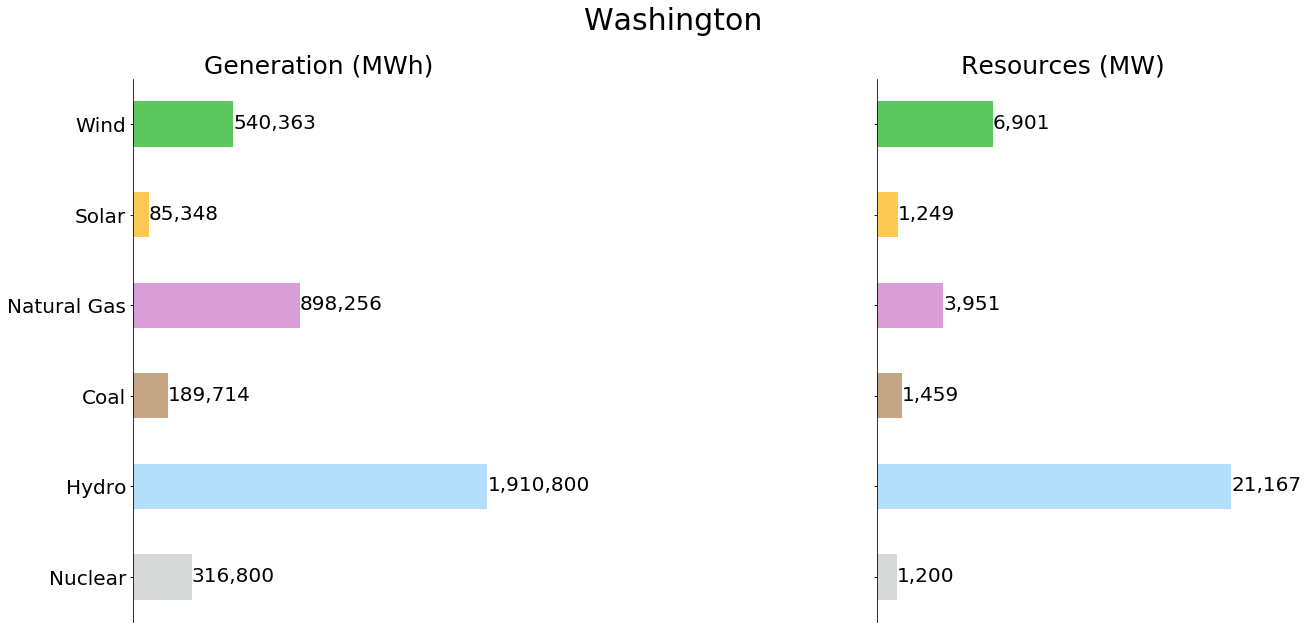

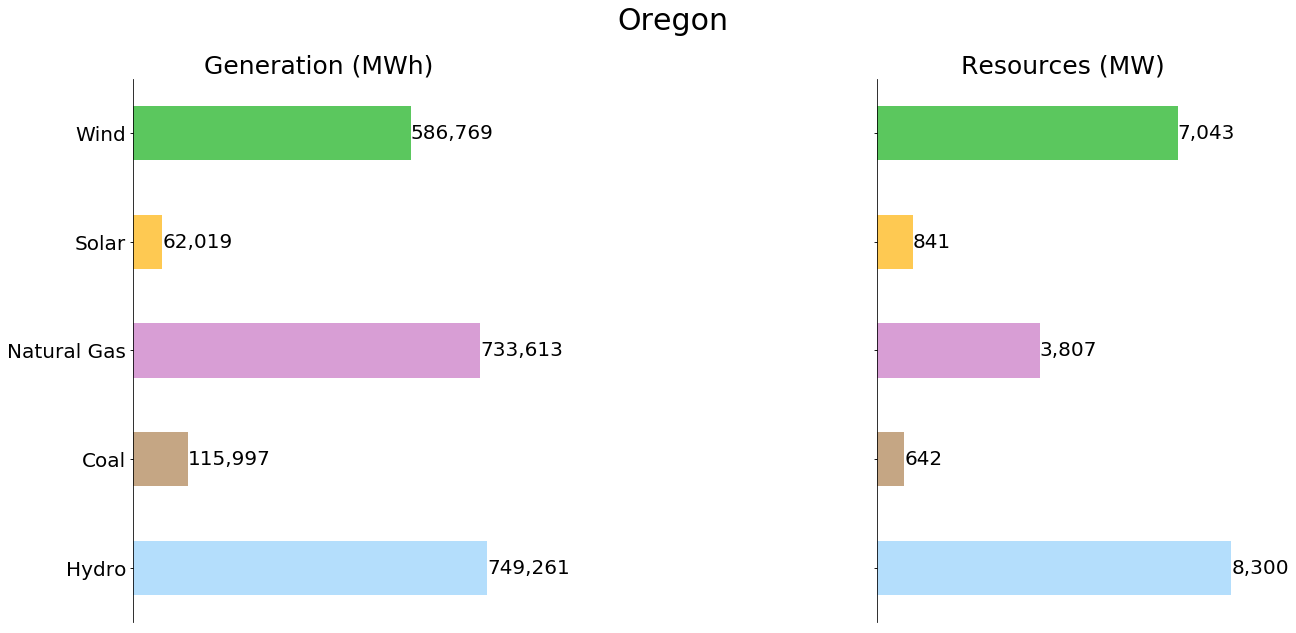

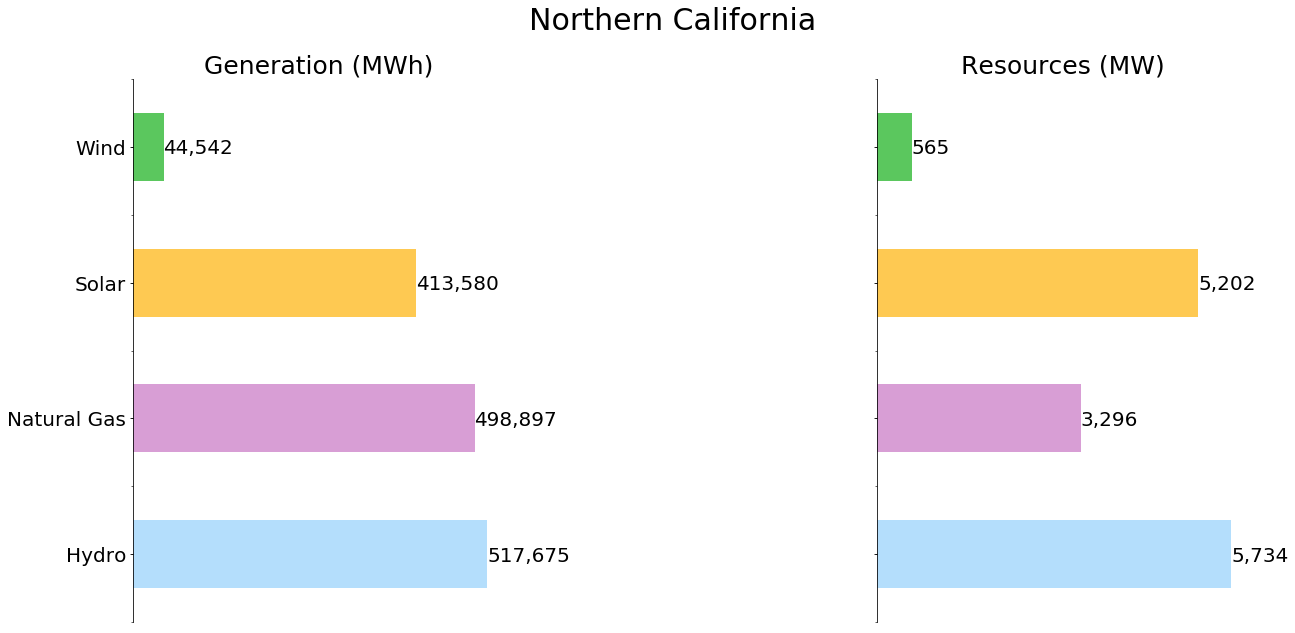

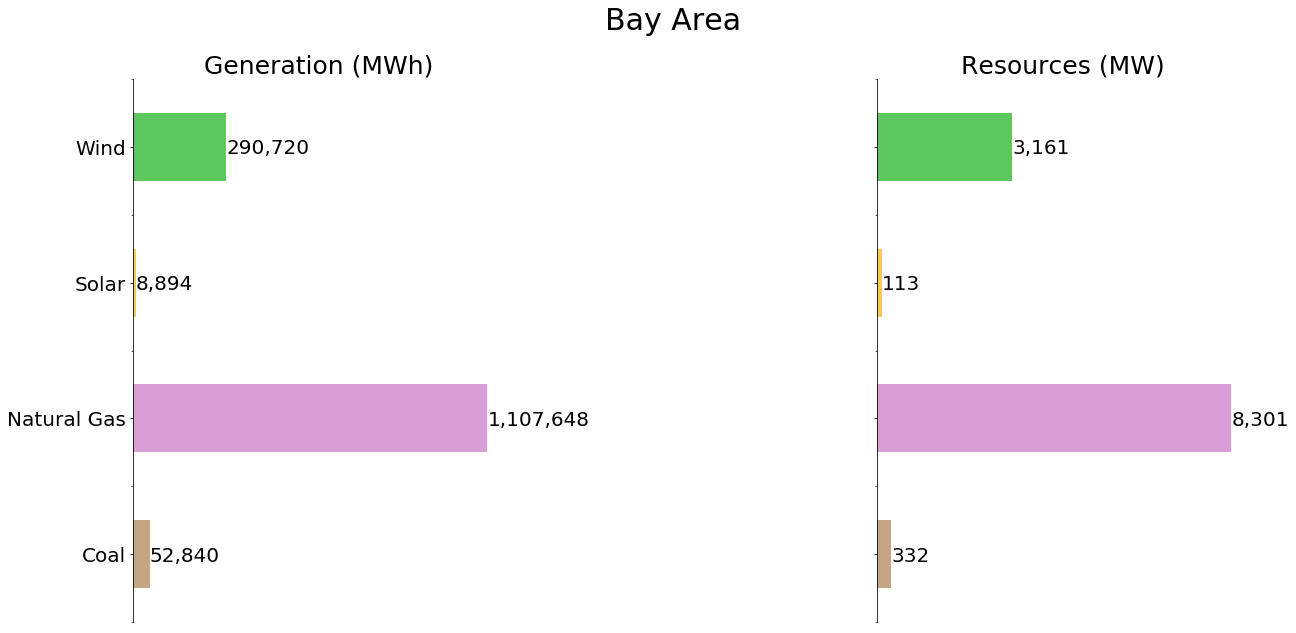

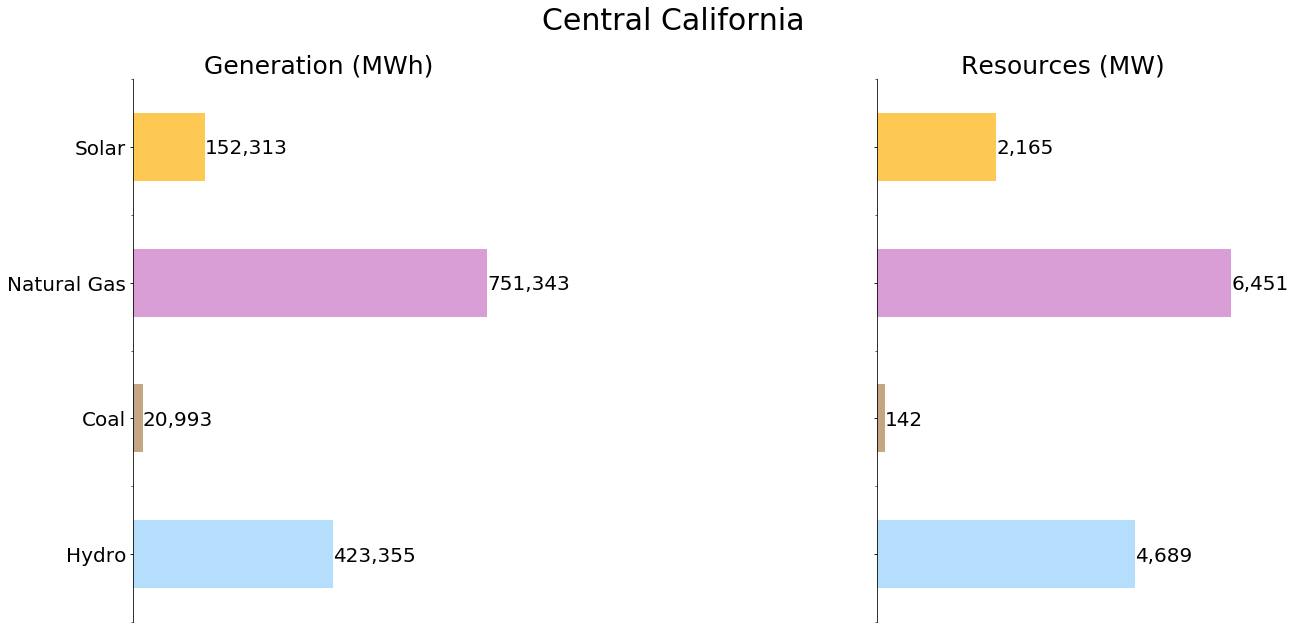

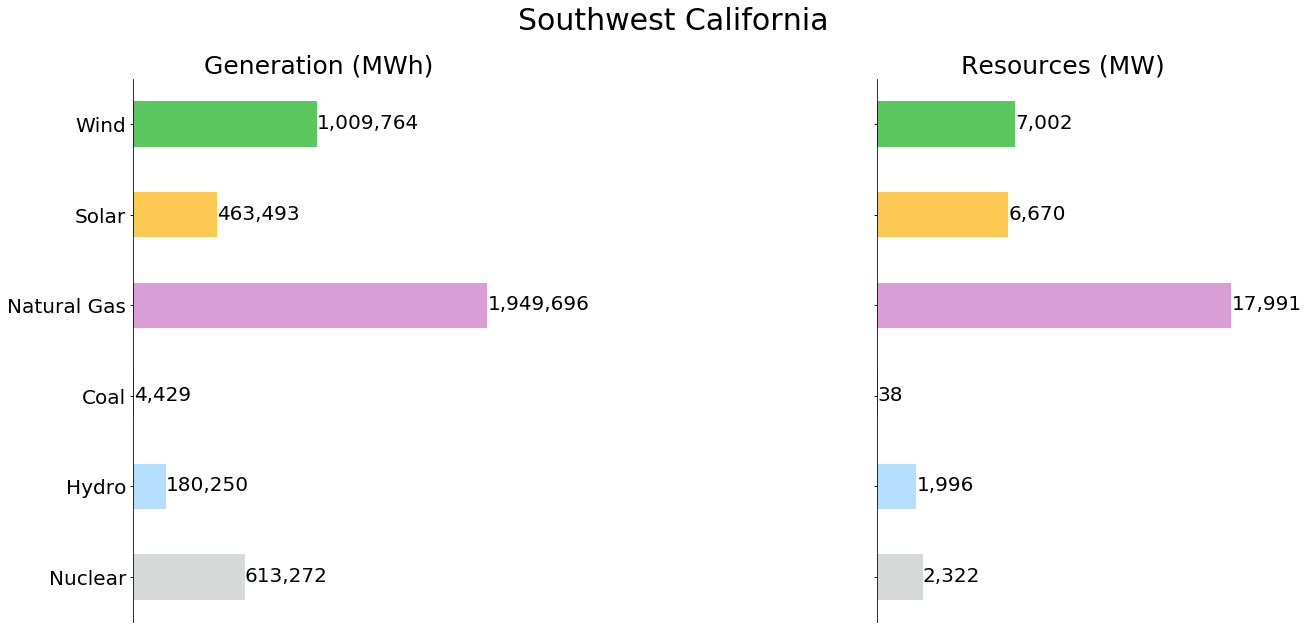

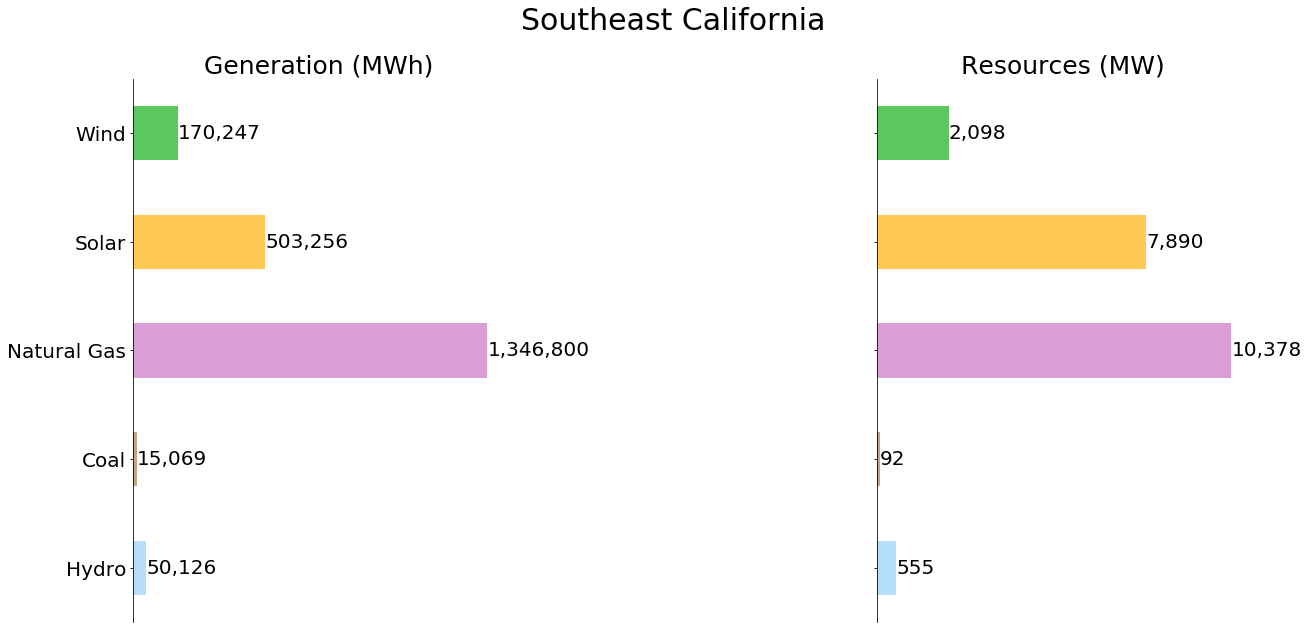

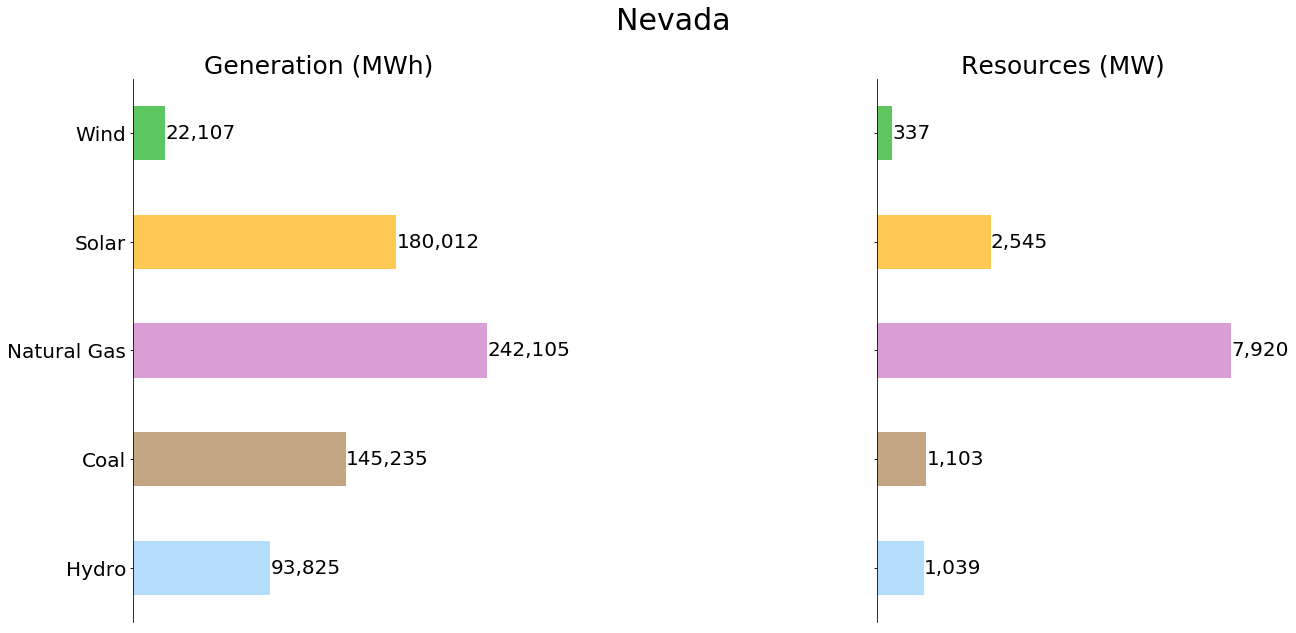

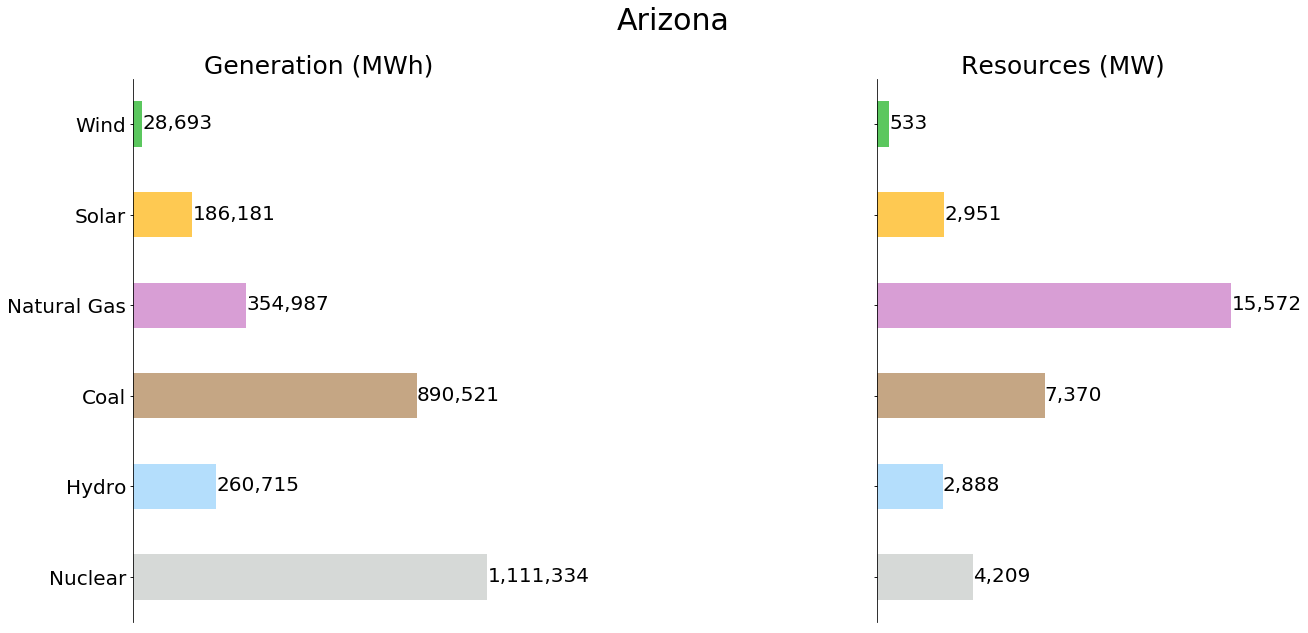

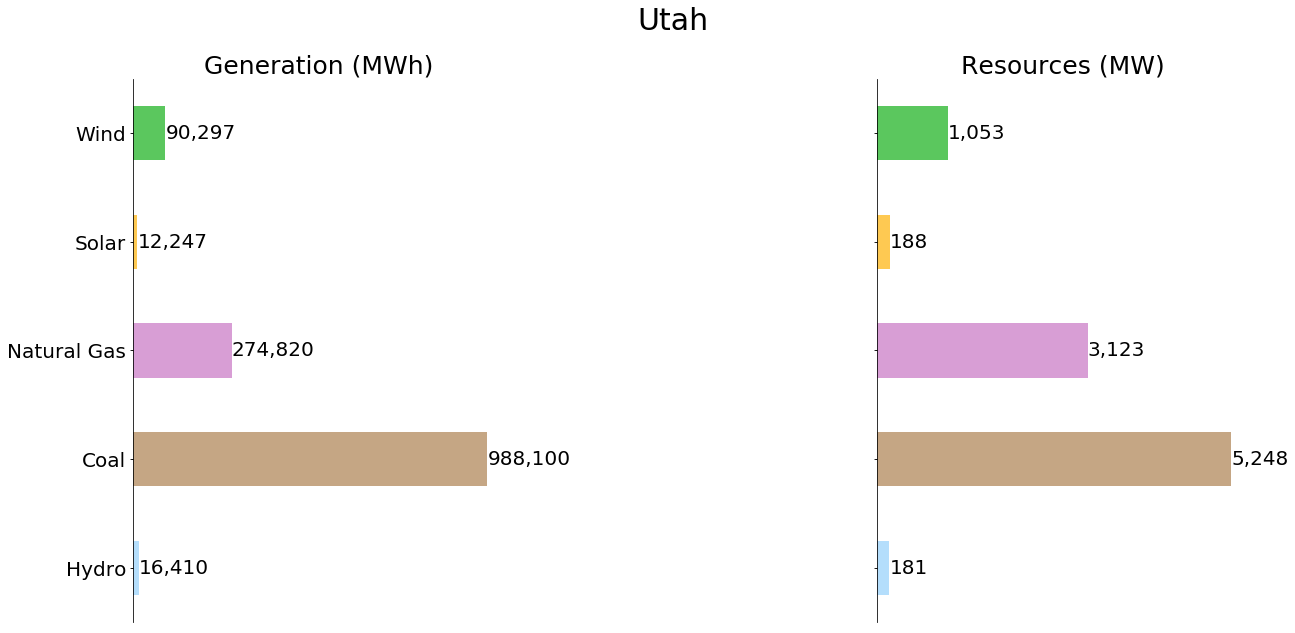

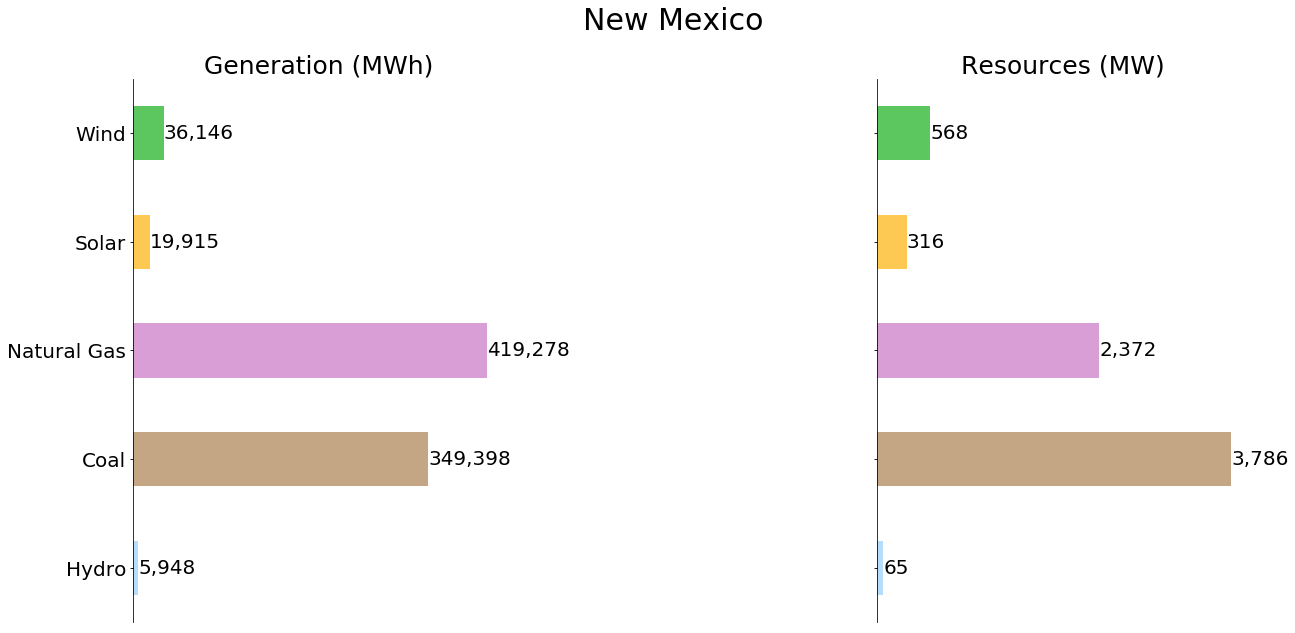

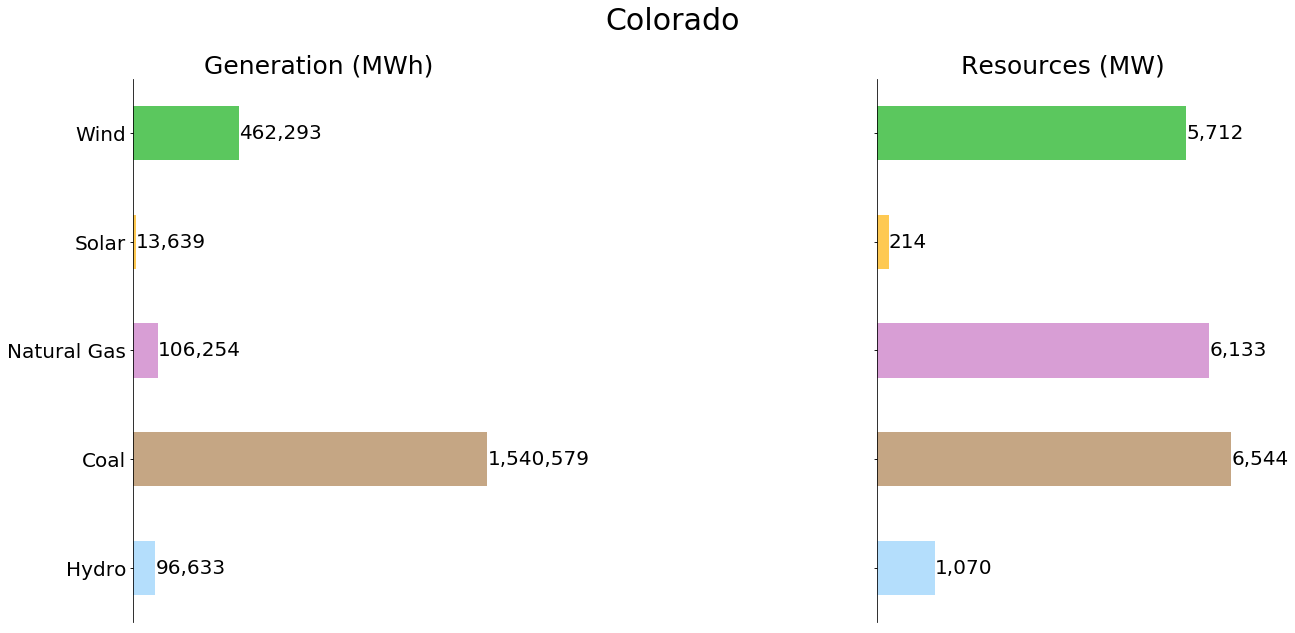

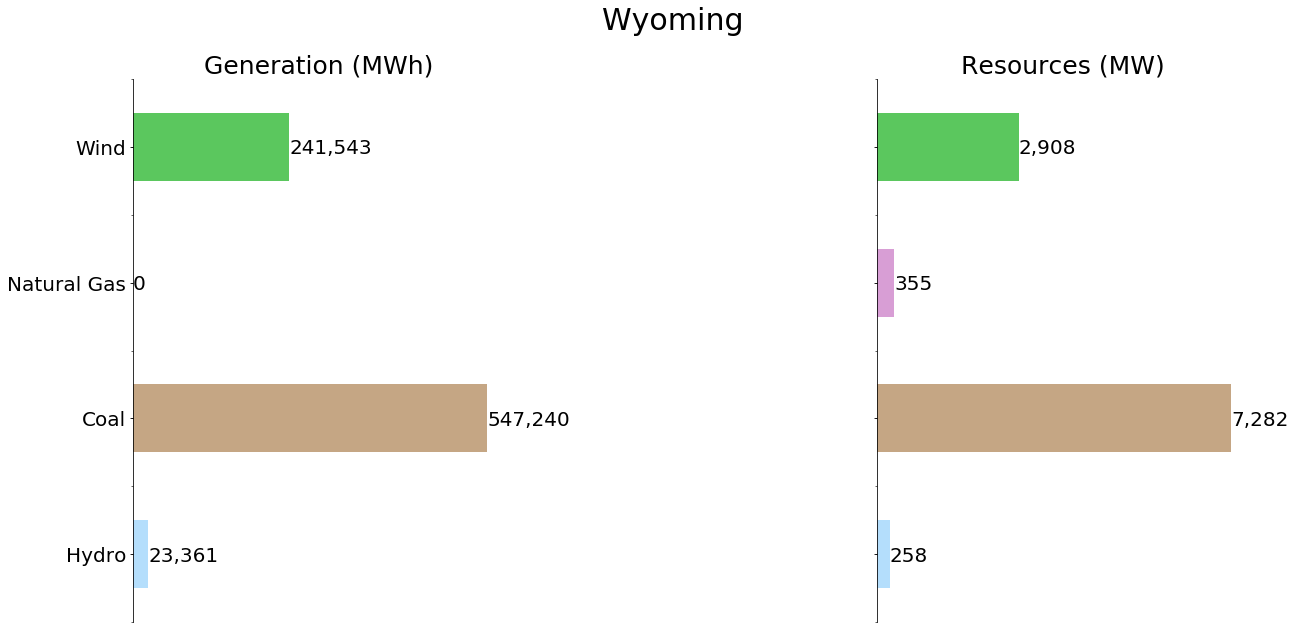

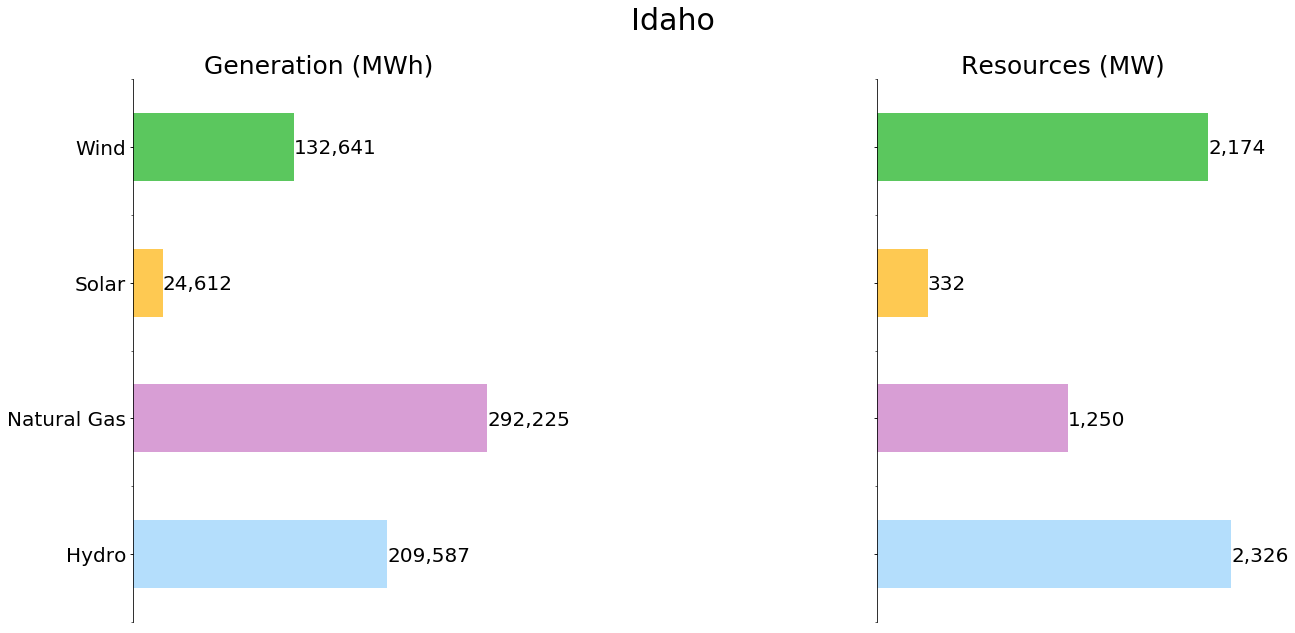

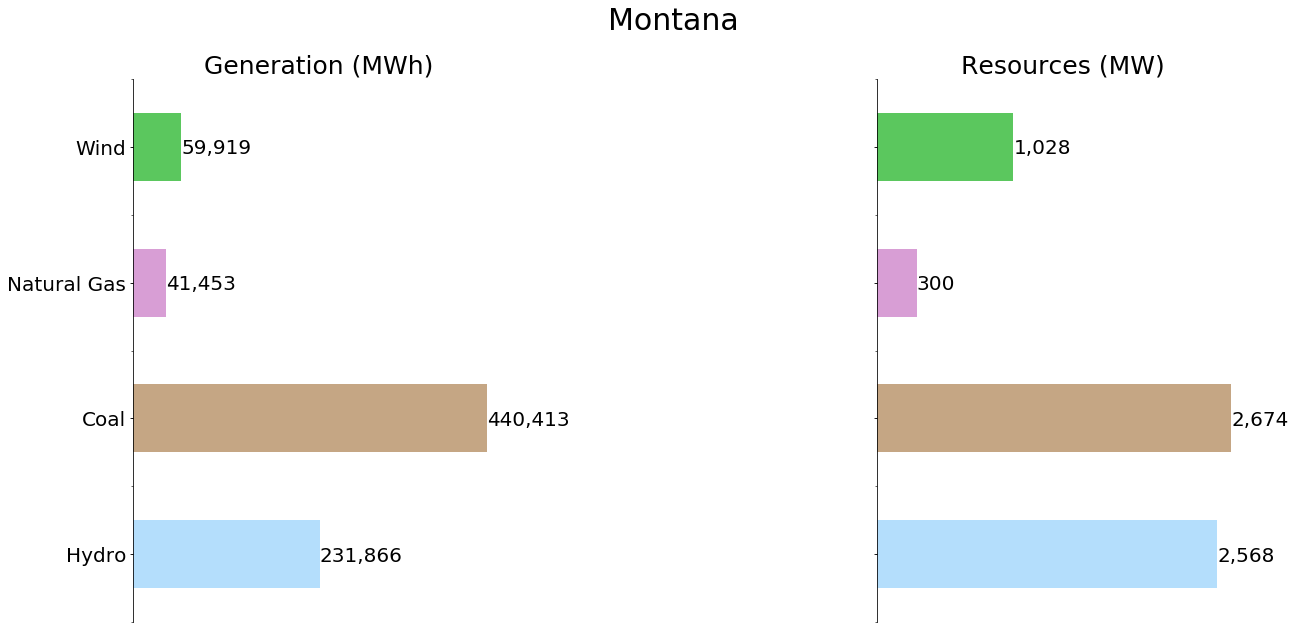

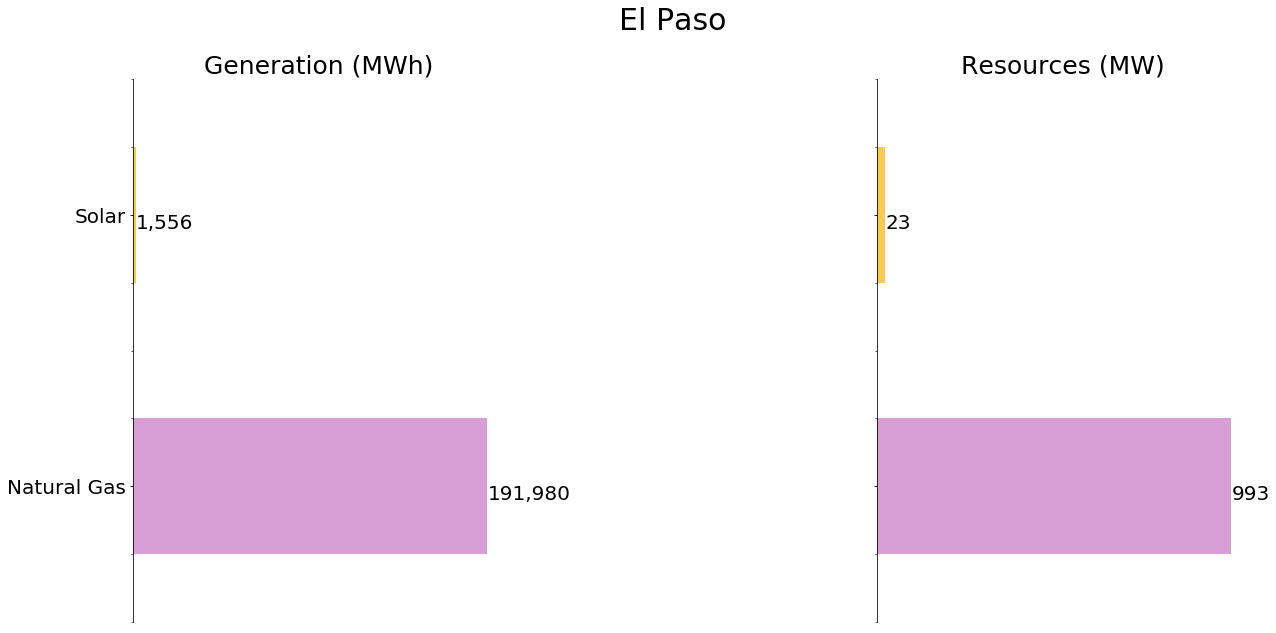

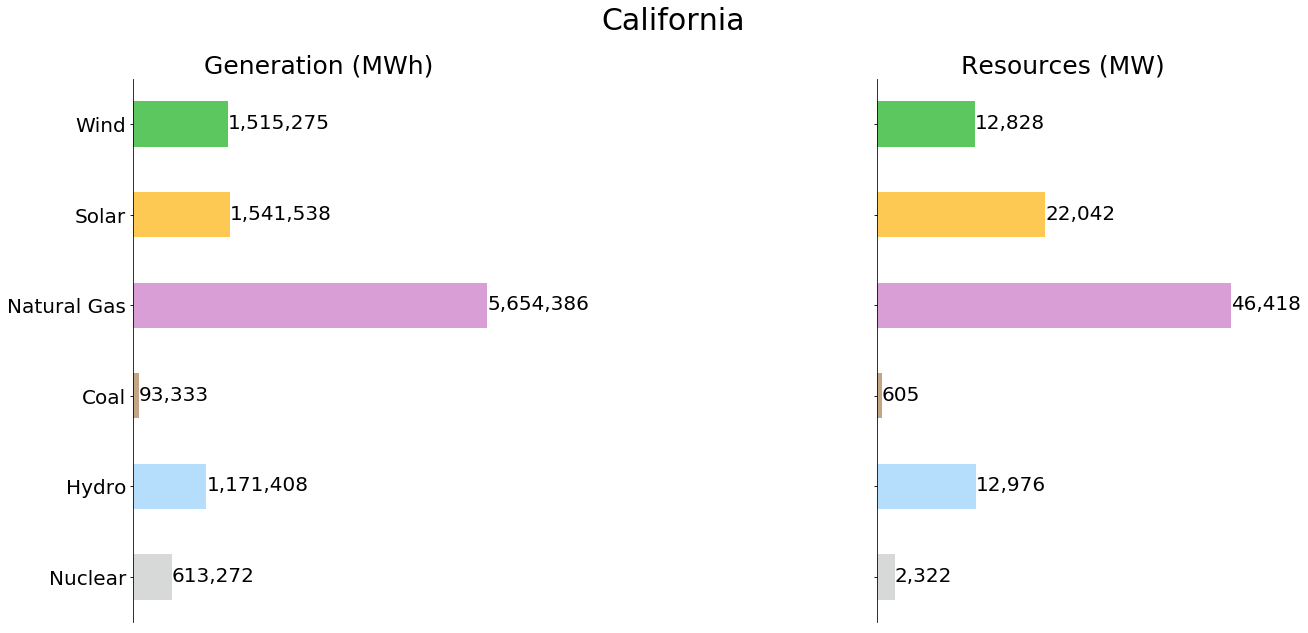

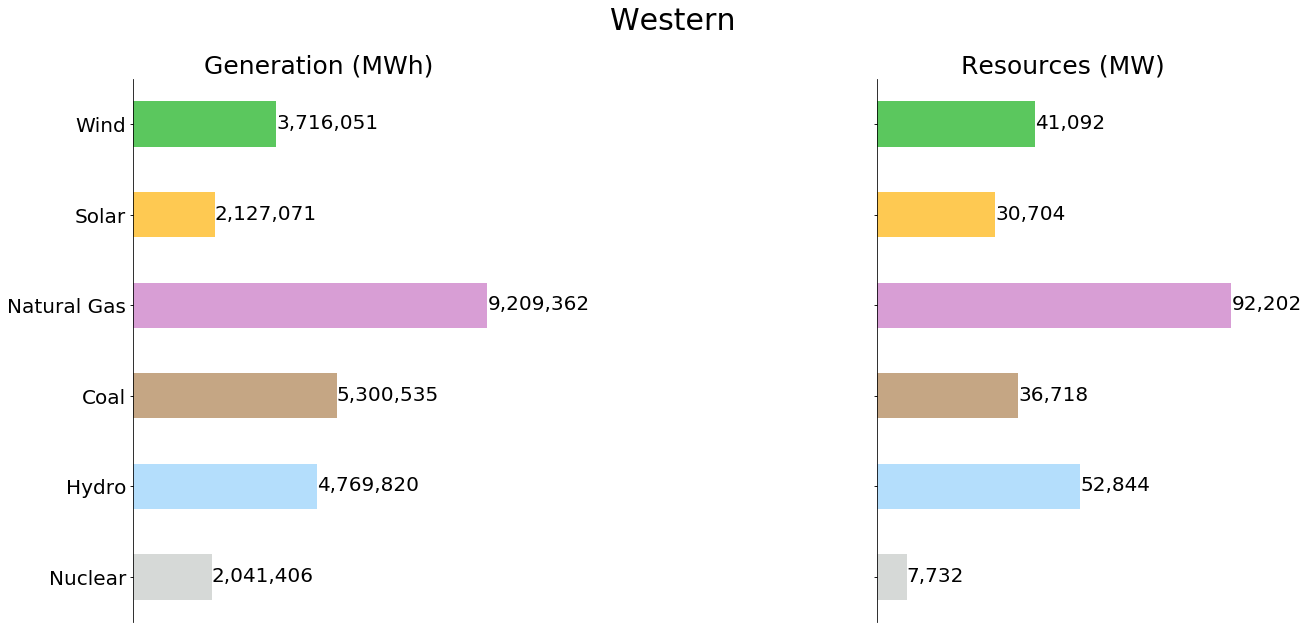

----------------------------------------
Total Generation in Washington: 3941284 MWh
Total Capacity in Washington: 35930 MW
----------------------------------------
Total Generation in Oregon: 2247662 MWh
Total Capacity in Oregon: 20635 MW
----------------------------------------
Total Generation in Northern California: 1474697 MWh
Total Capacity in Northern California: 14798 MW
----------------------------------------
Total Generation in Bay Area: 1460104 MWh
Total Capacity in Bay Area: 11909 MW
----------------------------------------
Total Generation in Central California: 1348007 MWh
Total Capacity in Central California: 13450 MW
----------------------------------------
Total Generation in Southwest California: 4220907 MWh
Total Capacity in Southwest California: 36022 MW
----------------------------------------
Total Generation in Southeast California: 2085500 MWh
Total Capacity in Southeast California: 21015 MW
----------------------------------------
Total Generation in Nevada: 6

In [10]:
time = ('2016-07-21-00', '2016-07-31-23', 'utc', 'H')
data = prepare_data(scenario)
do_chart_analysis(data, time, list(win_data.load_zones.values()) + ['California','Western'])

## Fall

Load solar data
Load wind data
Load demand data
Set UTC for all zones


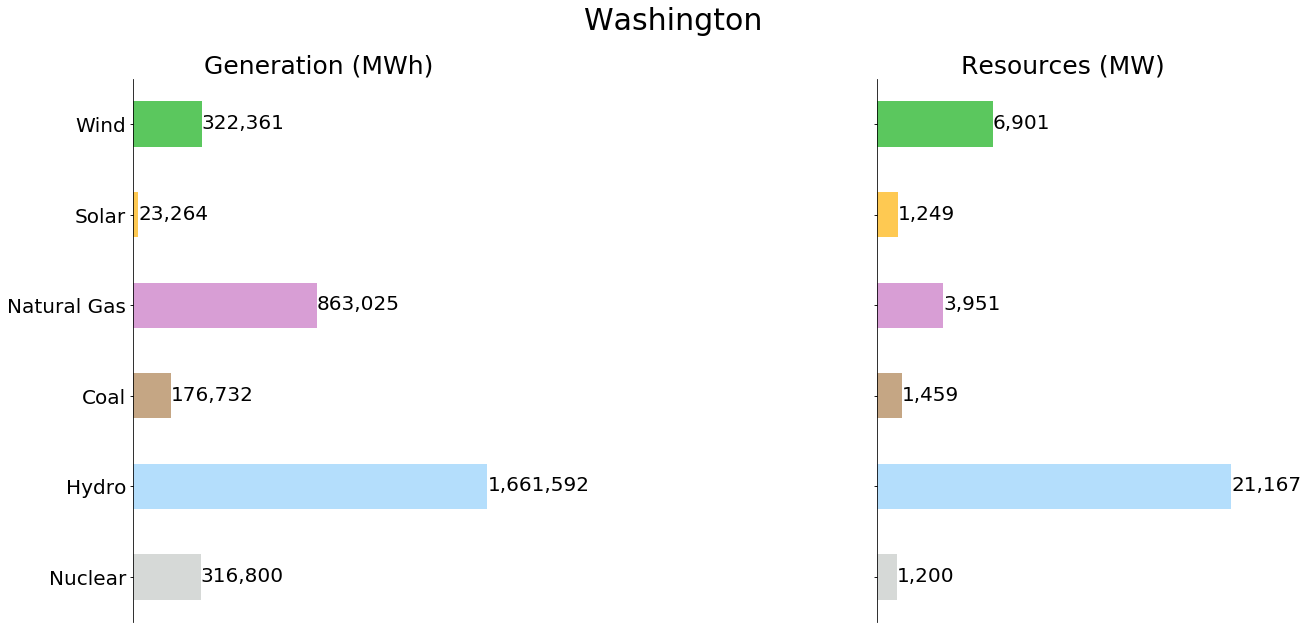

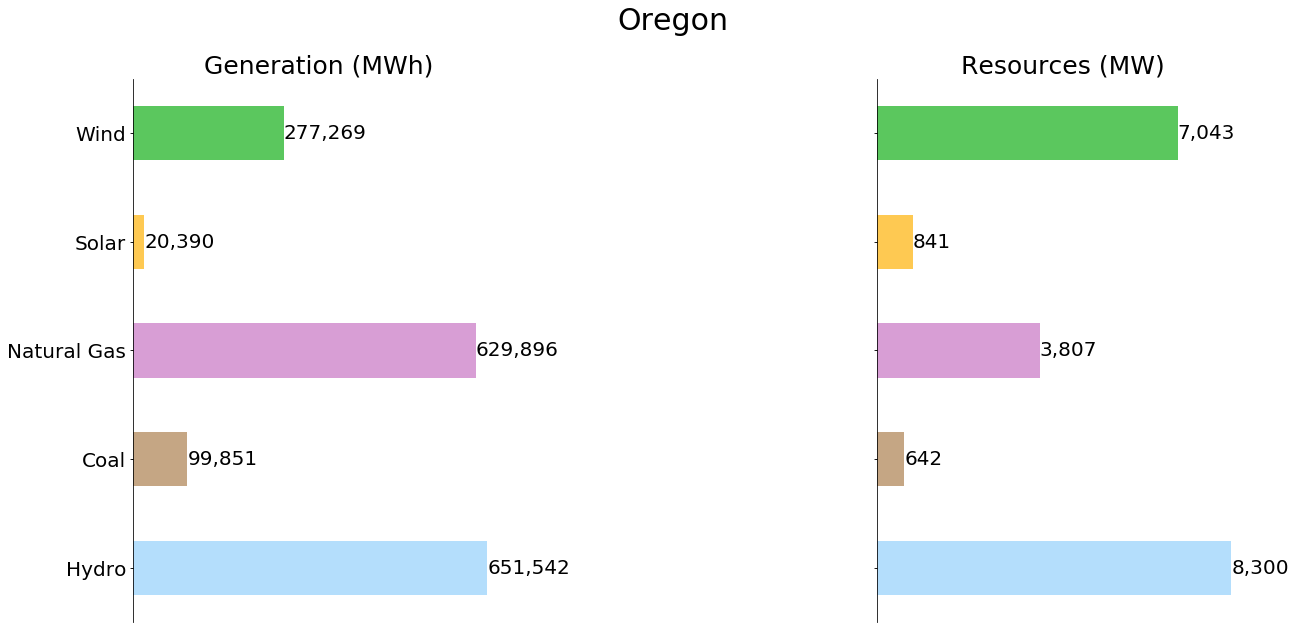

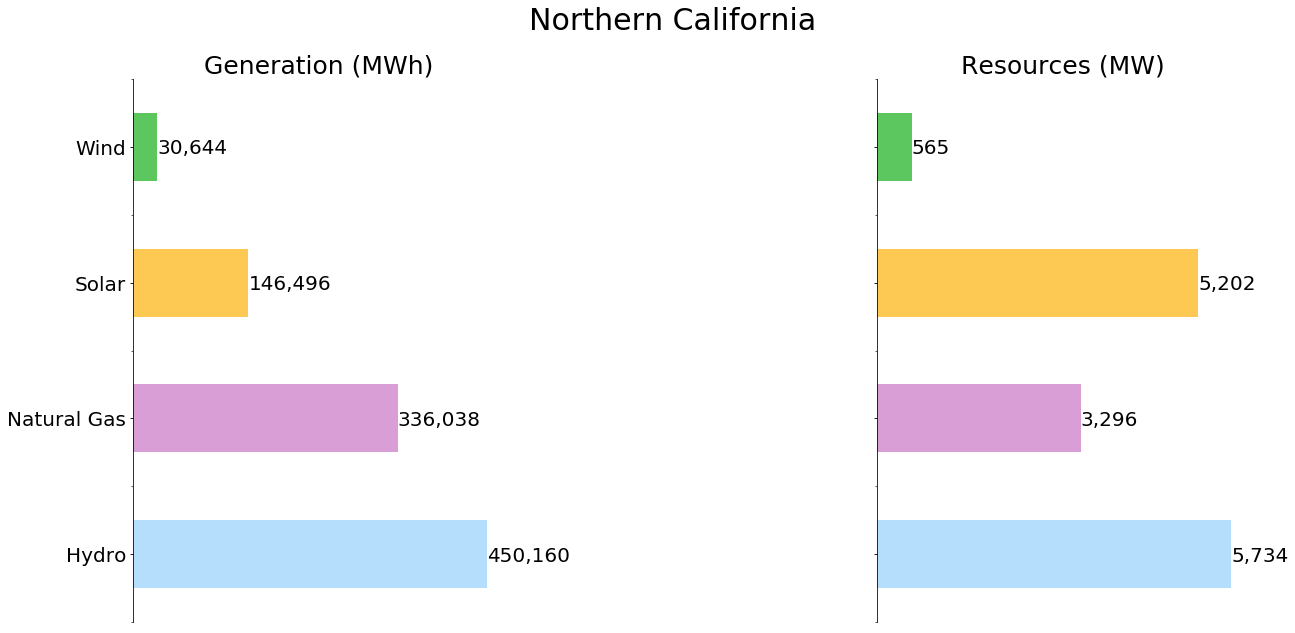

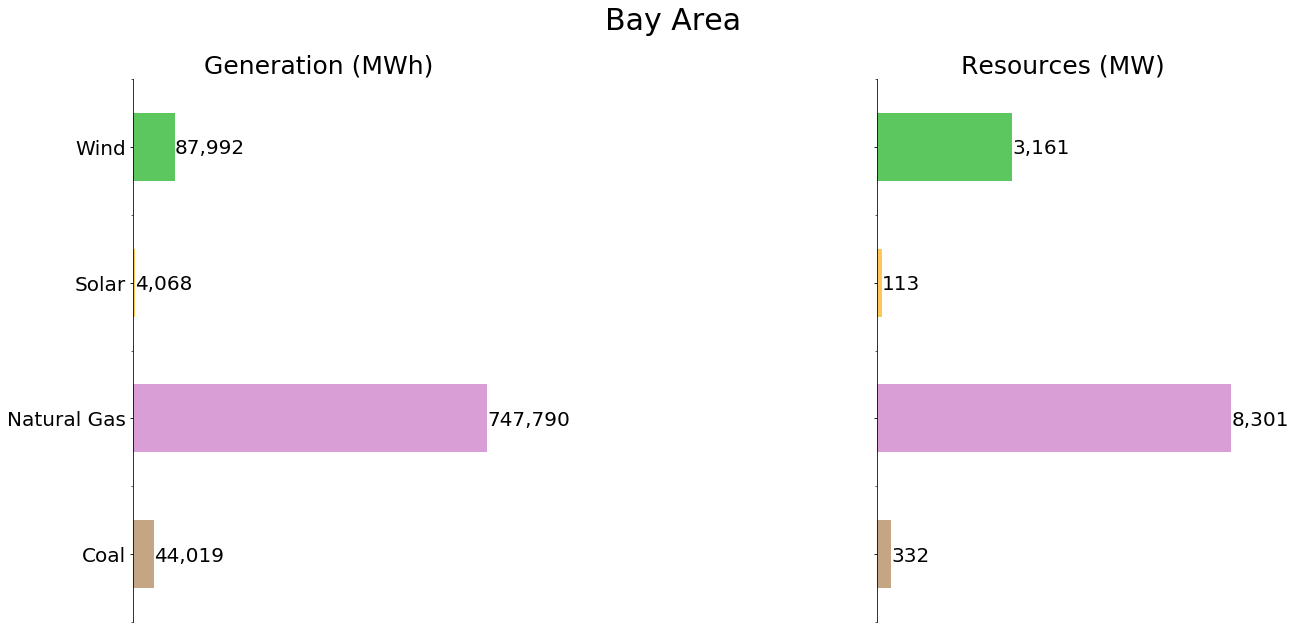

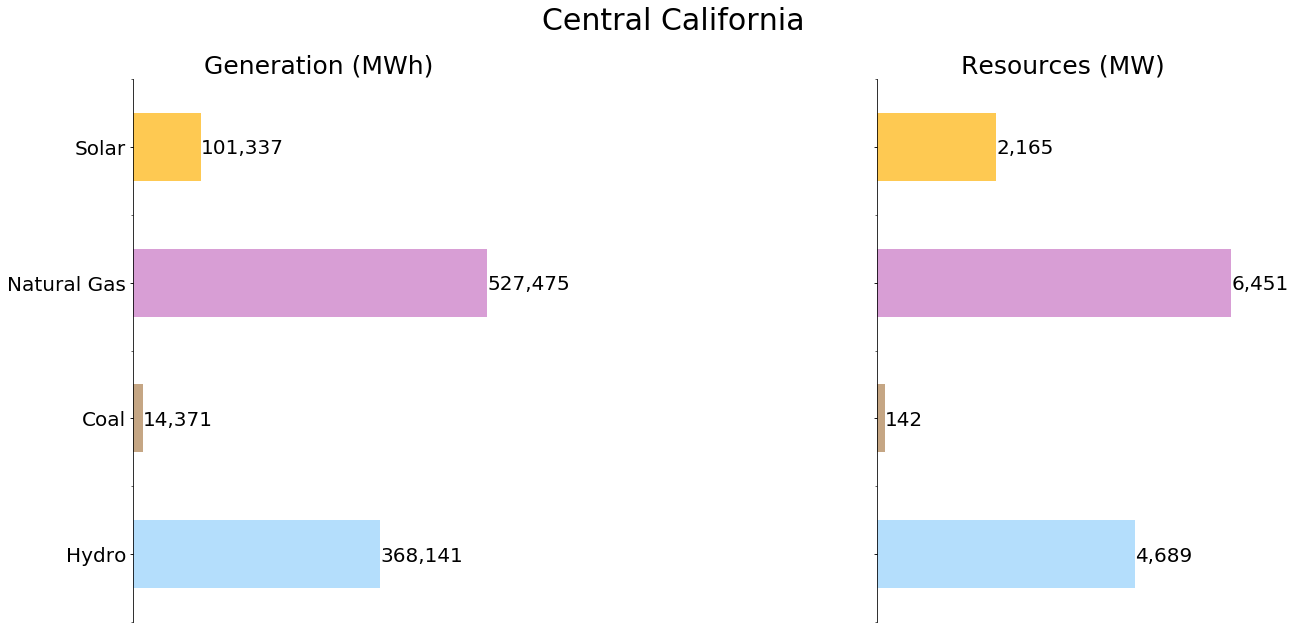

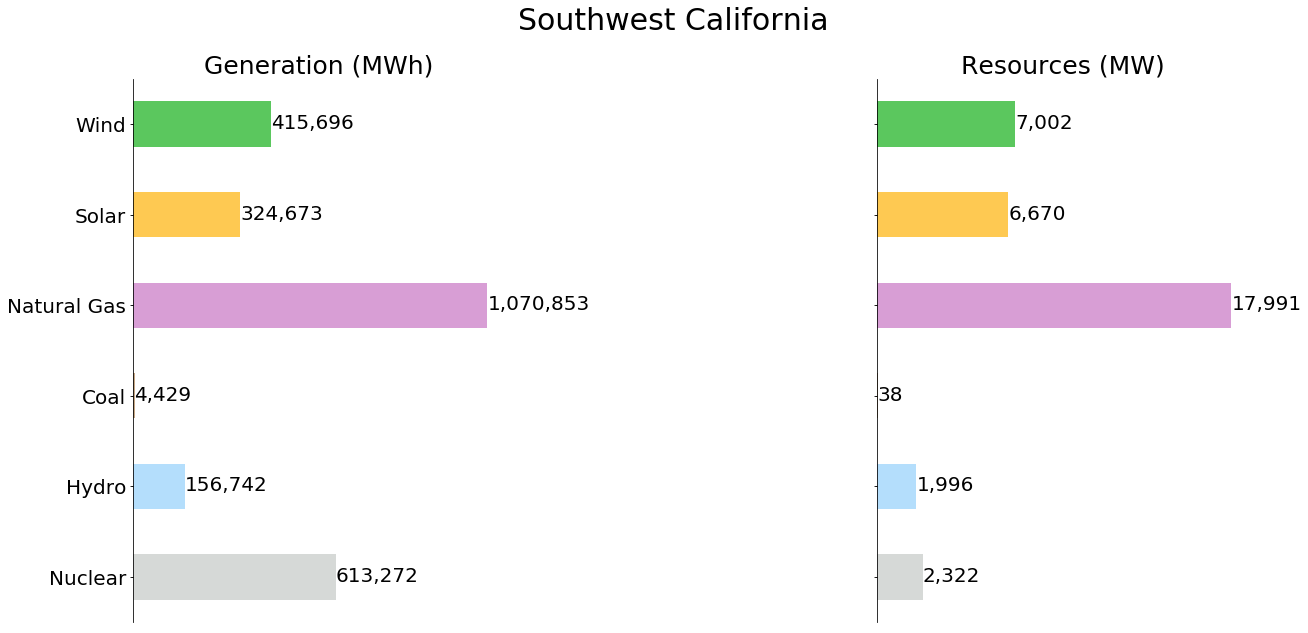

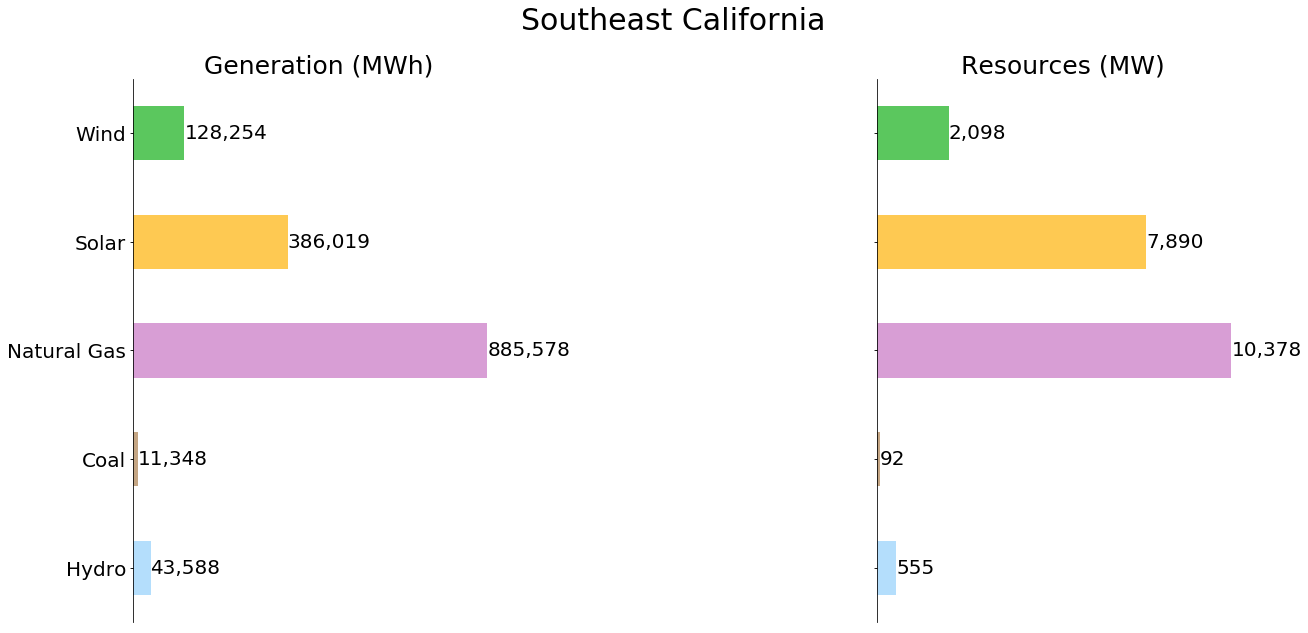

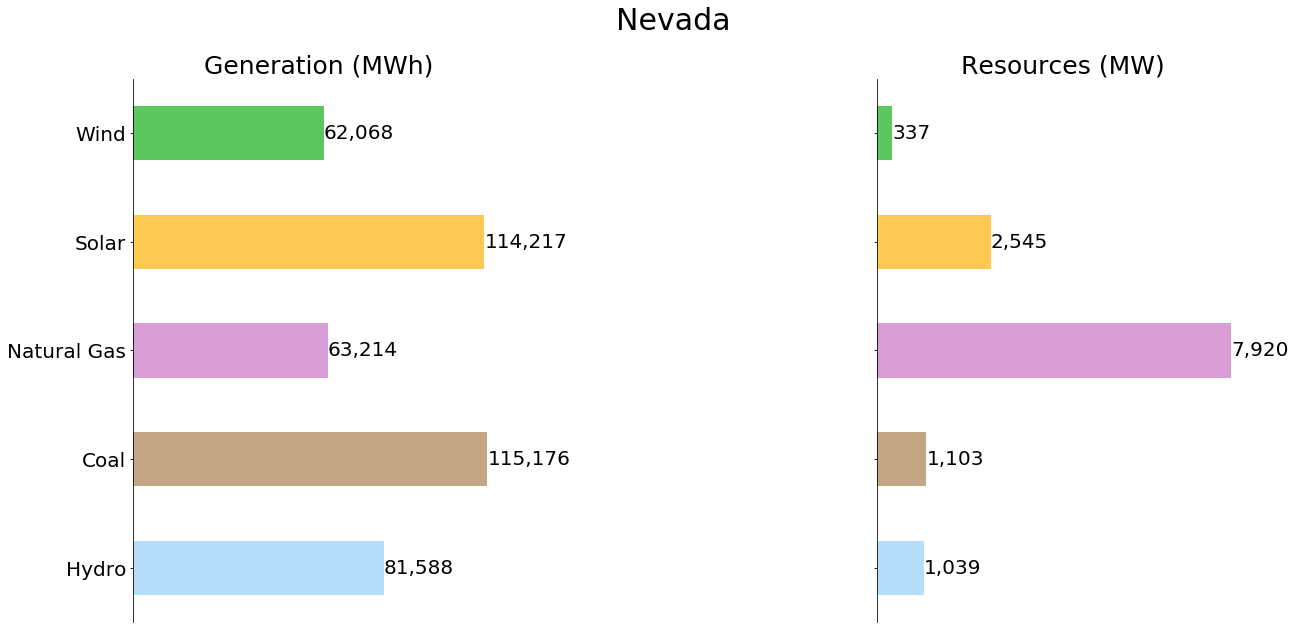

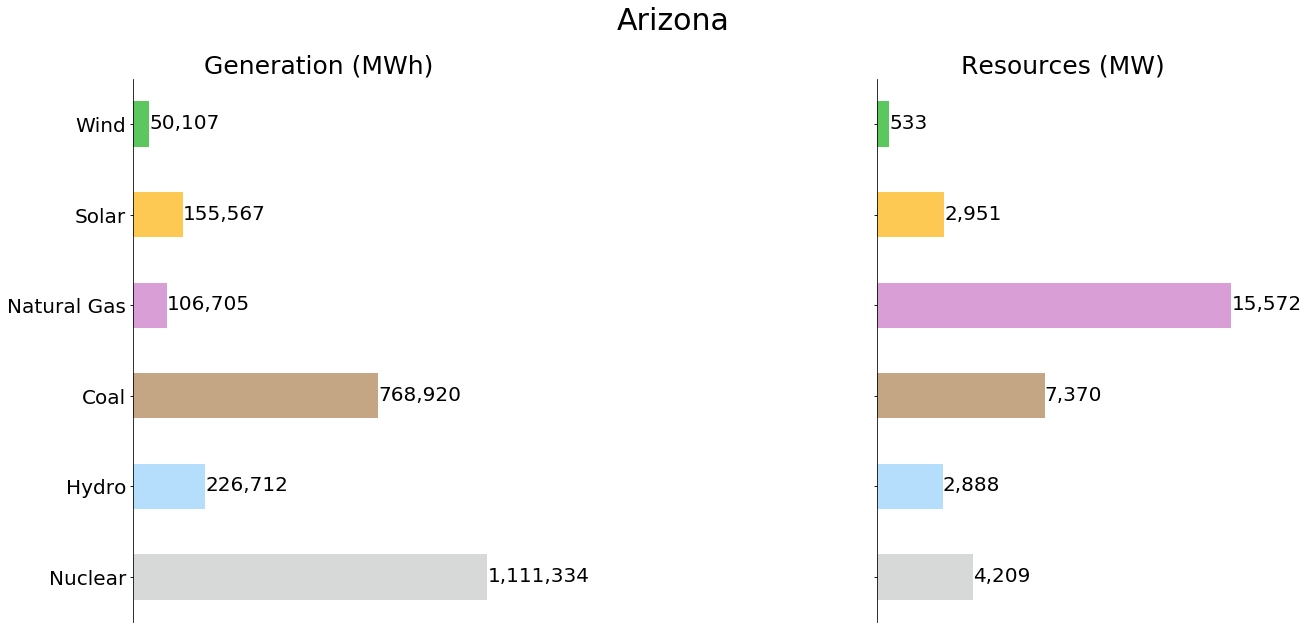

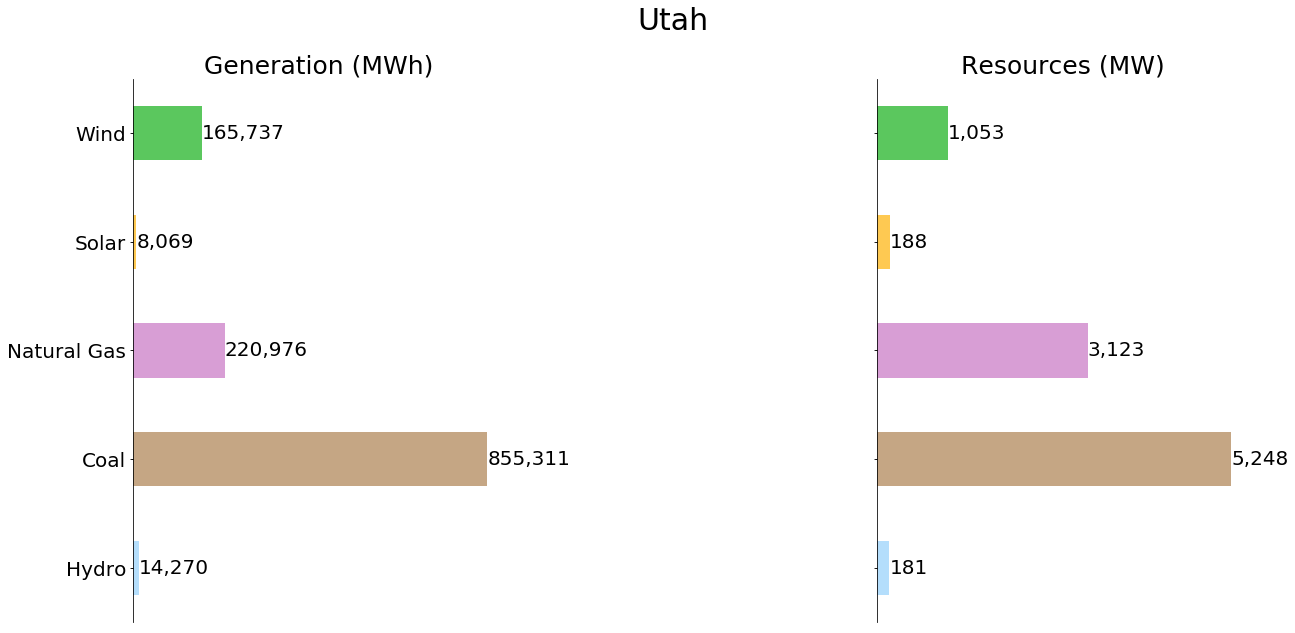

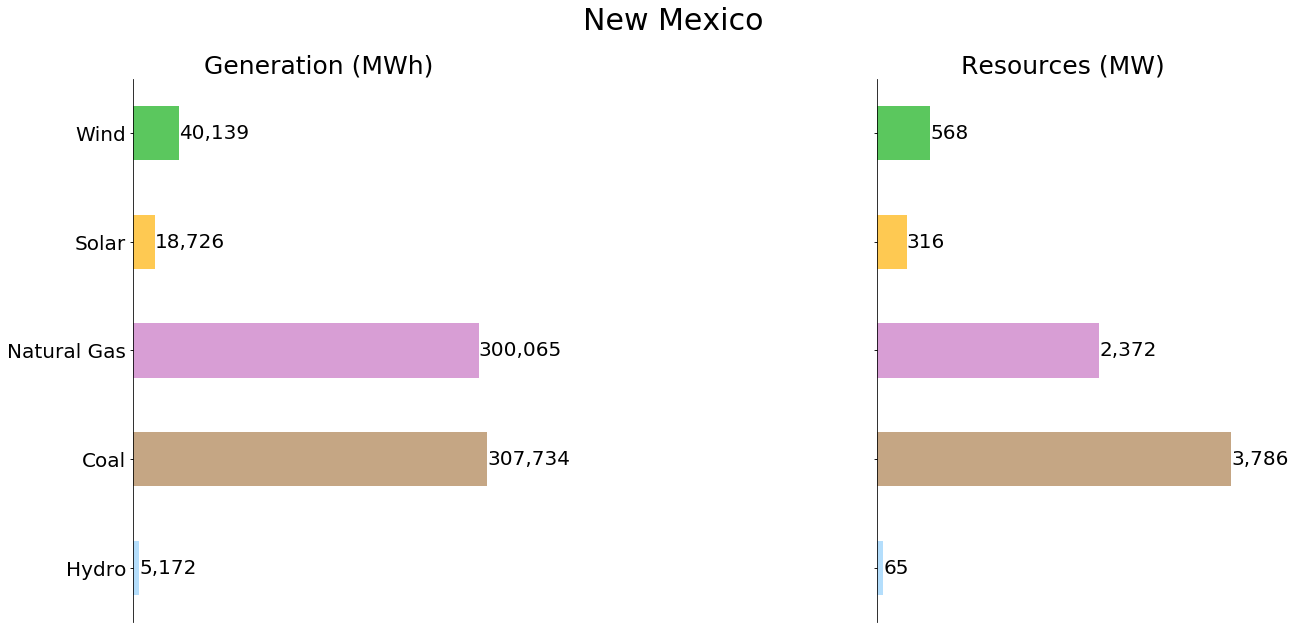

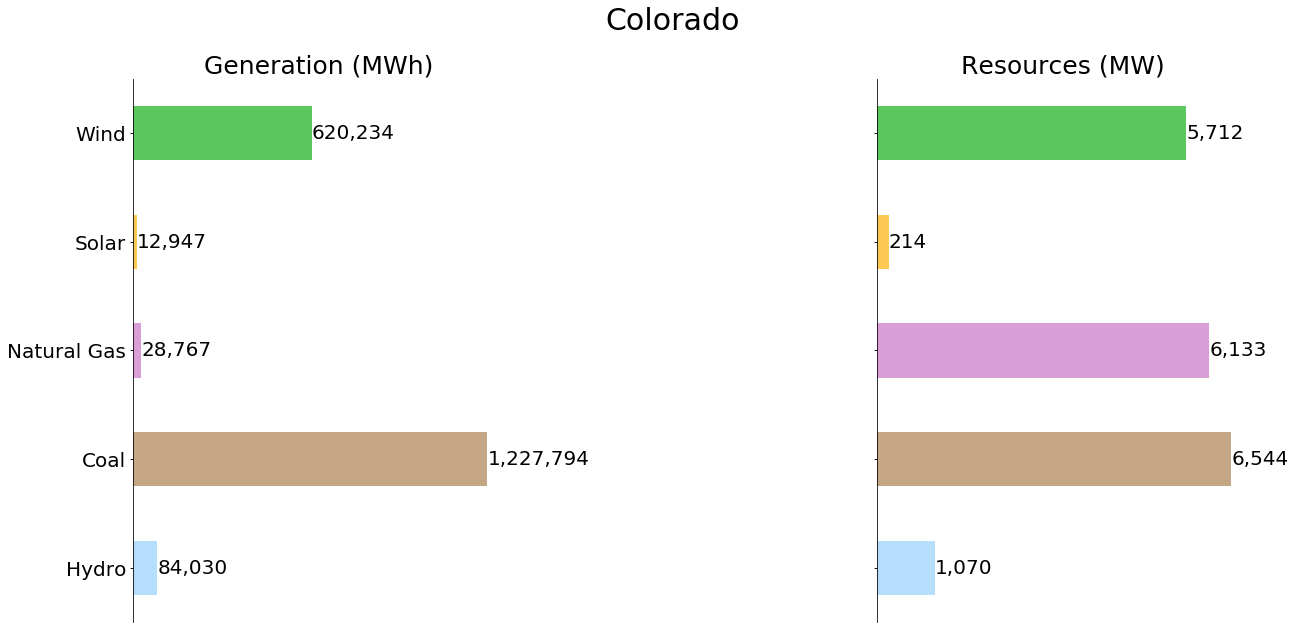

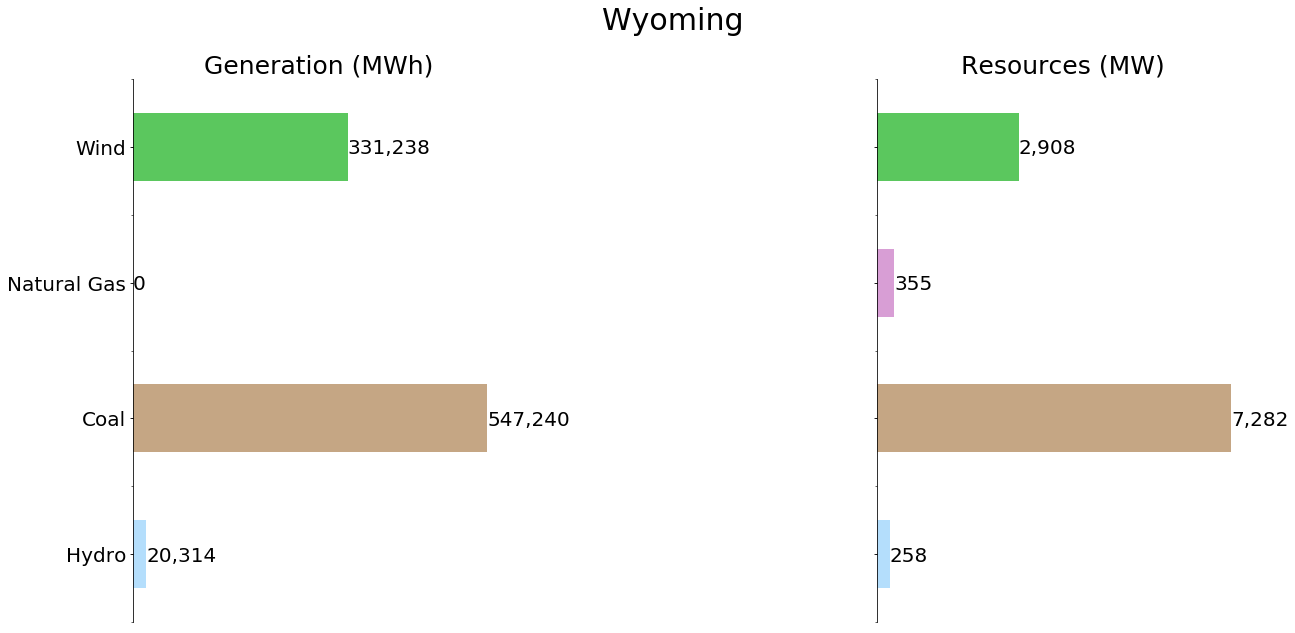

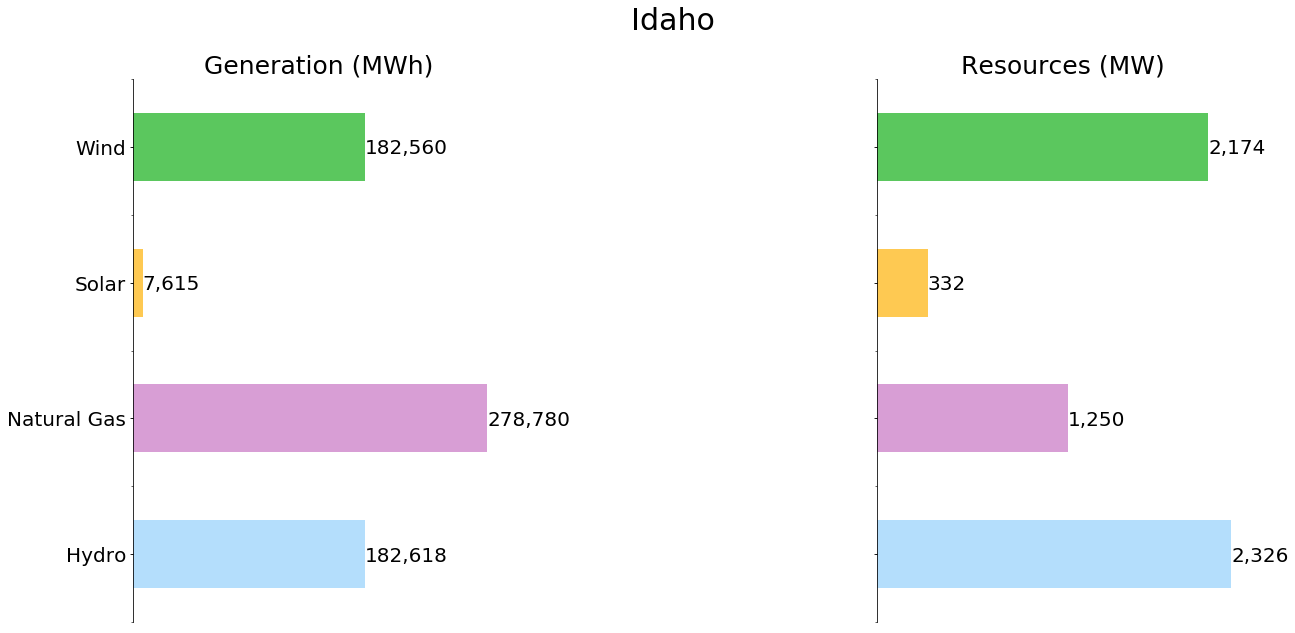

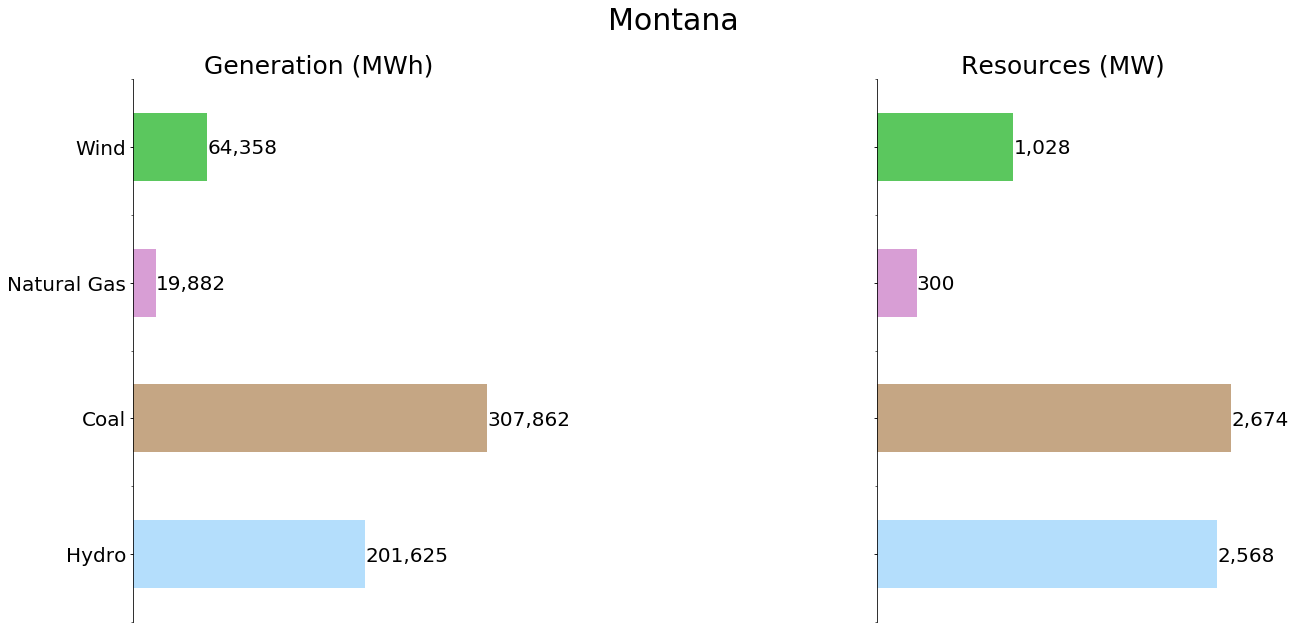

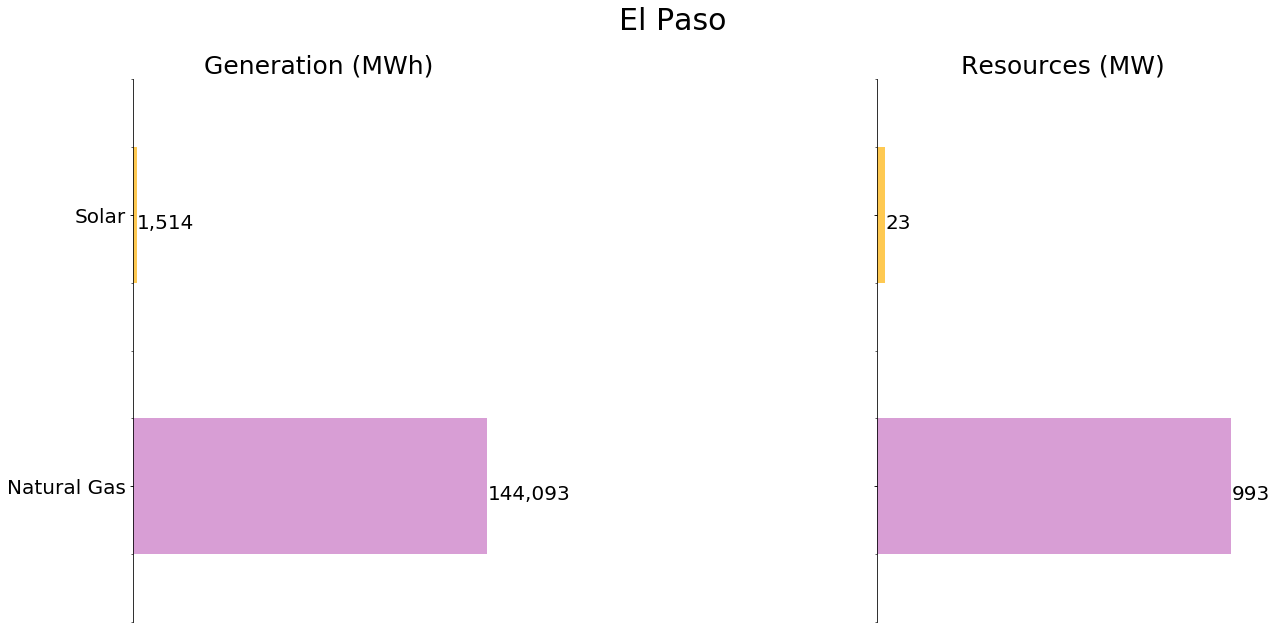

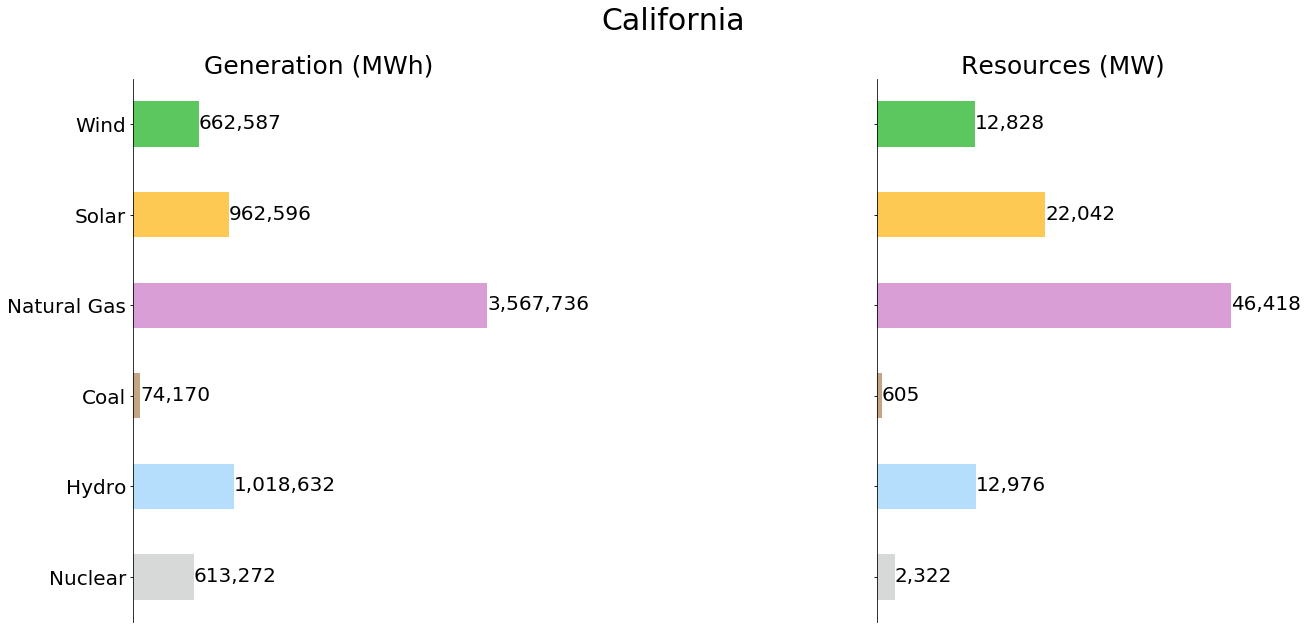

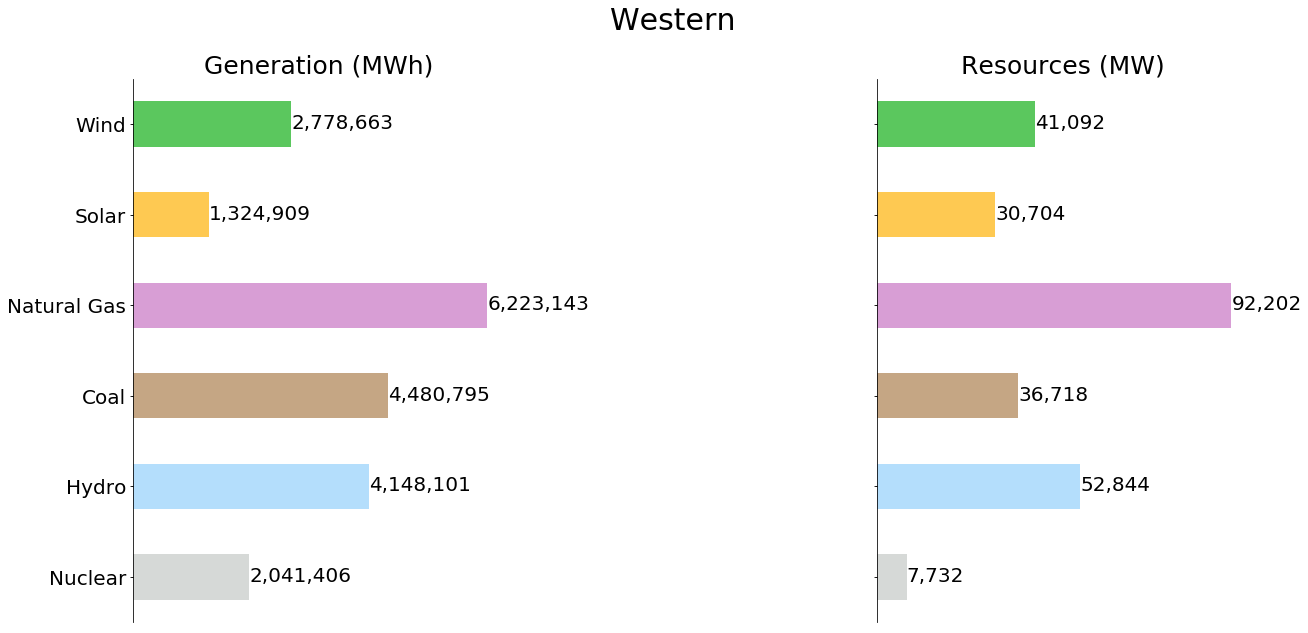

----------------------------------------
Total Generation in Washington: 3363775 MWh
Total Capacity in Washington: 35930 MW
----------------------------------------
Total Generation in Oregon: 1678950 MWh
Total Capacity in Oregon: 20635 MW
----------------------------------------
Total Generation in Northern California: 963340 MWh
Total Capacity in Northern California: 14798 MW
----------------------------------------
Total Generation in Bay Area: 883871 MWh
Total Capacity in Bay Area: 11909 MW
----------------------------------------
Total Generation in Central California: 1011326 MWh
Total Capacity in Central California: 13450 MW
----------------------------------------
Total Generation in Southwest California: 2585668 MWh
Total Capacity in Southwest California: 36022 MW
----------------------------------------
Total Generation in Southeast California: 1454789 MWh
Total Capacity in Southeast California: 21015 MW
----------------------------------------
Total Generation in Nevada: 436

In [11]:
time = ('2016-10-21-00', '2016-10-31-23', 'utc', 'H')
data = prepare_data(scenario)
do_chart_analysis(data, time, list(win_data.load_zones.values()) + ['California','Western'])